In [1]:
import numpy as np
import astropy.constants as c
import scipy
from scipy import stats, optimize
import math
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl

from pylab import *
from scipy import *
from scipy.optimize import curve_fit

import xlsxwriter

import lmfit
from lmfit import Parameters, fit_report, minimize
from lmfit.models import ExponentialModel, GaussianModel, PowerLawModel, ExpressionModel, LinearModel
import astropy
from astropy.modeling.powerlaws import BrokenPowerLaw1D

import sklearn

mpl.rc('font', family='serif')


grb = fits.open('gll_2flgc.fits')

table=grb[1].data


In [2]:
'''Rascun Data'''
ras_data = np.genfromtxt('x_grb.txt', delimiter='&',dtype=None, encoding='UTF-8')



In [3]:
'''X-Ray Data'''

x_ray = fits.open('lum_decay_corr_v12.fits')
table_x = x_ray[1].data

In [4]:
def power_law1(x, N, a): 
    '''simple power law 
    L = Nx^-a'''
    return N*np.power(x, a)

In [5]:
def power_law3(x,N,a):
    '''simple power law in log space
    log(L) = log(N) - alogx'''
    return (a)*np.log10(x) + np.log10(N) 

In [6]:
def retrieve_grb_data(table, grb, z):
    '''
    table - fits files containing all data
    grb - name of grb
    
    want to retrieve all the data associated with a given grb'''
    for i in table:
        name = i['GCNNAME']
        for k in i['LC_ENE_FLUX_ERR']:
                mask = np.where(i['LC_ENE_FLUX_ERR']!=0) #finding indexs of values where flux error is 0 and masking
                t_end = i['LC_END'][mask] 
                ene_flux = i['LC_ENE_FLUX'][mask] 
                ene_flux_err = i['LC_ENE_FLUX_ERR'][mask] 
                fluence = i['LC_FLUENCE'][mask] 
                flux = i['LC_FLUX'][mask] 
                flux_err = i['LC_FLUX_ERR'][mask] 
                indec = i['LC_INDEX'][mask]   # this is photon index, not spectral index;     
                #photon index = beta+1 e.g photon index 2 = beta +1, where beta = 1
                index_err = i['LC_INDEX_ERR'][mask] 
                median = i['LC_MEDIAN'][mask] 
                t_start = i['LC_START'][mask] 
                ts = i['LC_TS'][mask]
        #for n in i['GCNNAME']:
            #print(n)
        #n = np.where(i['GCNNAME'] == grb)
        #print(name)
        if name == grb:
            print(f'Match for GRB {name} found.')
            dl = i['LUMINOSITY_DISTANCE']
            return [ name,z, dl, t_end, ene_flux, ene_flux_err, fluence, flux, flux_err, indec, index_err, median, t_start, ts]
            
            
            

            
    
    
    
    

In [12]:
short = []
long = []
for i in table:
    if i['REDSHIFT'] > -5: 
        if i['GBMT90']<=2:

            short.append([i['GCNNAME'], i['REDSHIFT']])
        
        else:
            long.append([i['GCNNAME'], i['REDSHIFT'], len(i['LC_ENE_FLUX_ERR'])])


# print(f'Short = {len(short)}')
# print(f'Long = {len(long)}')
# for j in long:
#     print(j)

['080818B', 0.0, 13]
['080825C', 0.0, 24]
['080916C', 4.35, 65]
['81006.0', 0.0, 19]
['81009.0', 0.0, 23]
['081122A', 0.0, 21]
['081203A', 2.1, 17]
['81224.0', 0.0, 12]
['90102.0', 1.547, 18]
['90217.0', 0.0, 23]
['090227A', 0.0, 14]
['90323.0', 3.57, 34]
['90328.0', 0.736, 29]
['090427A', 0.0, 17]
['90626.0', 0.0, 18]
['090720B', 0.0, 25]
['090902B', 1.822, 94]
['090926A', 2.106, 92]
['91003.0', 0.897, 26]
['91031.0', 0.0, 15]
['91120.0', 0.0, 19]
['91127.0', 0.49, 19]
['100116A', 0.0, 20]
['100213C', 0.0, 19]
['100225A', 0.0, 12]
['100325A', 0.0, 12]
['100414A', 1.368, 27]
['100423B', 0.0, 20]
['100511A', 0.0, 23]
['100620A', 0.0, 13]
['100724B', 0.0, 23]
['100728A', 1.567, 30]
['100826A', 0.0, 28]
['101014A', 0.0, 18]
['101107A', 0.0, 21]
['101123A', 0.0, 10]
['101227B', 0.0, 16]
['110120A', 0.0, 23]
['110123A', 0.0, 14]
['110213A', 1.46, 16]
['110328B', 0.0, 12]
['110428A', 0.0, 18]
['110518A', 0.0, 10]
['110625A', 0.0, 17]
['110721A', 0.0, 25]
['110731A', 2.83, 26]
['110903A', 0.0

080916C
normalised luminosity from ts onwards
luminosity = 2.8377526e+52
-2.727485404475504e+52
+2.5118509494289095e+53

normalised luminosity 5 - 40s fit
luminosity = 2.670665493572617e+52
-1.955989504861519e+52
+7.557200844932592e+52

normalised luminosity Ts±30%
luminosity = 1.556096313011382e+52
-1.0403450922399574e+52
+2.623332138726958e+52

normalised luminosity peak-Ts
luminosity = 1.6398783361196404e+52
-7.292547430249454e+51
+1.1829922261469222e+52



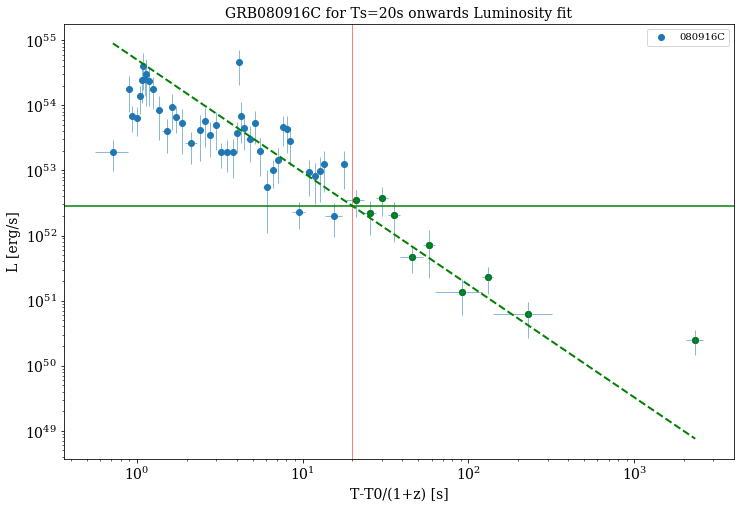

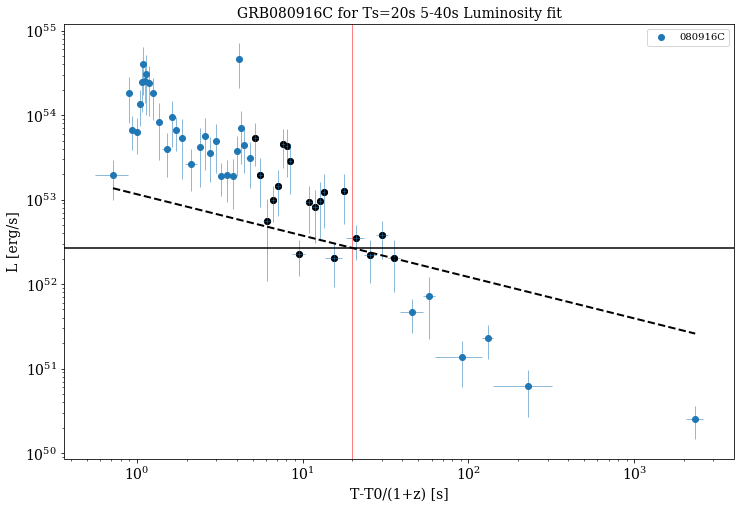

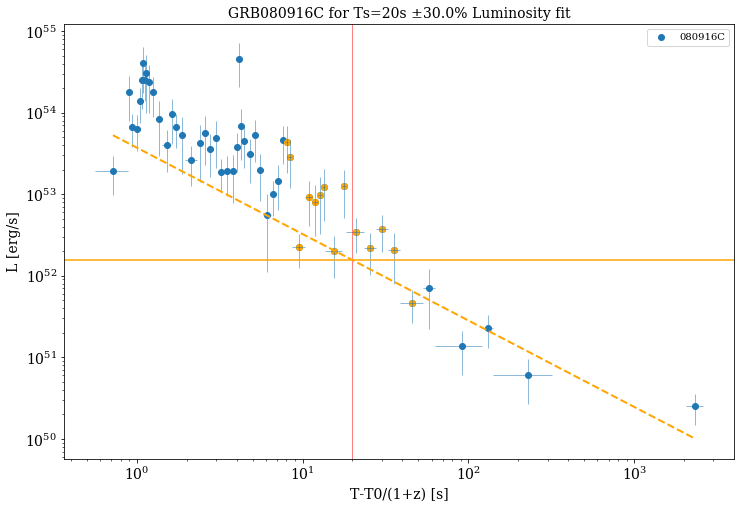

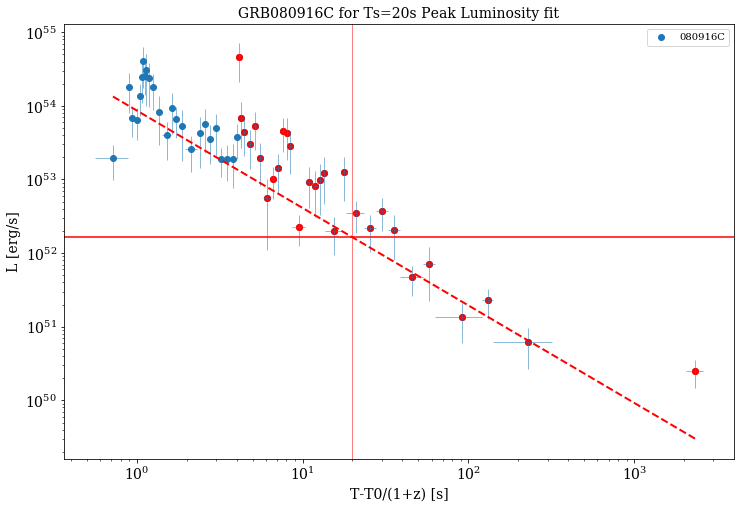

90323.0
normalised luminosity from ts onwards
luminosity = 5.700575e+51
-4.6754824369861e+51
+2.3604251967114992e+52

normalised luminosity 5 - 40s fit
was inf
now 54.79614047633473
luminosity = 5.382609991635593e+51
-5.380616918223548e+51
+5.181334638715848e+51

normalised luminosity Ts±30%
luminosity = 3.542940723134984e+51
-3.3597208008155394e+51
+1.5062137229468462e+52

normalised luminosity peak-Ts
was inf
now 26.889250046572453
luminosity = 2.674412718977953e+51
-2.409703422142419e+51
+2.3946423767319388e+51



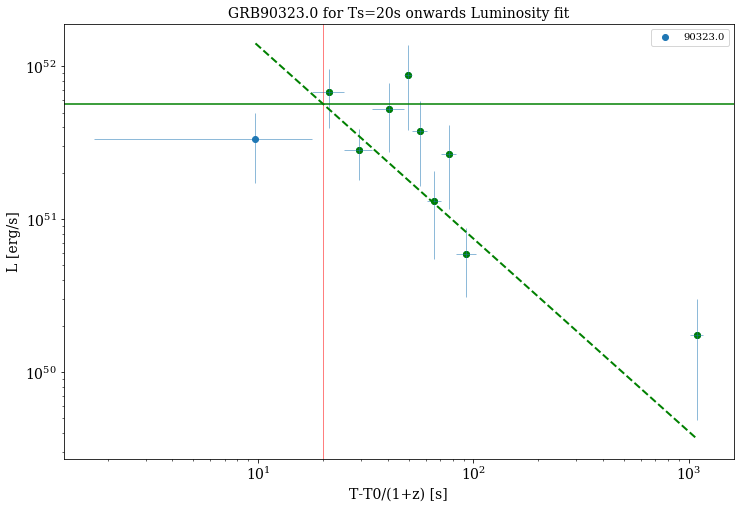

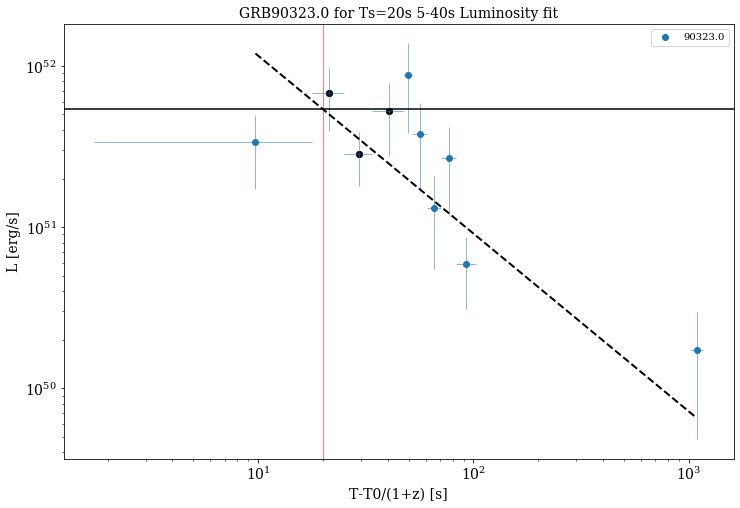

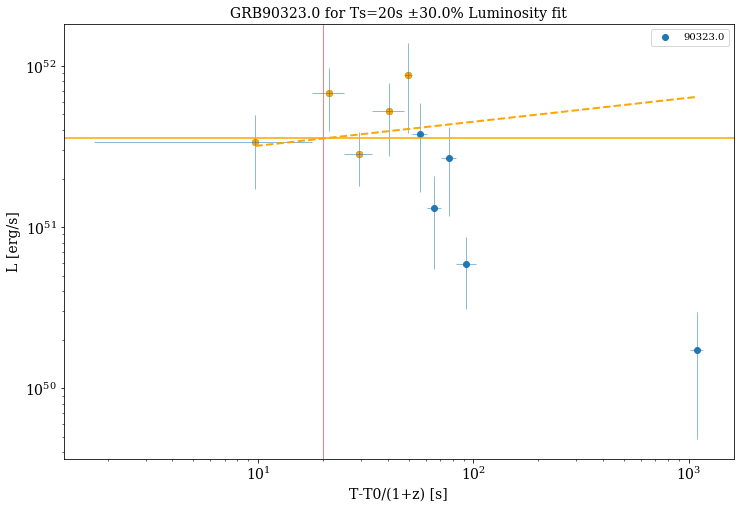

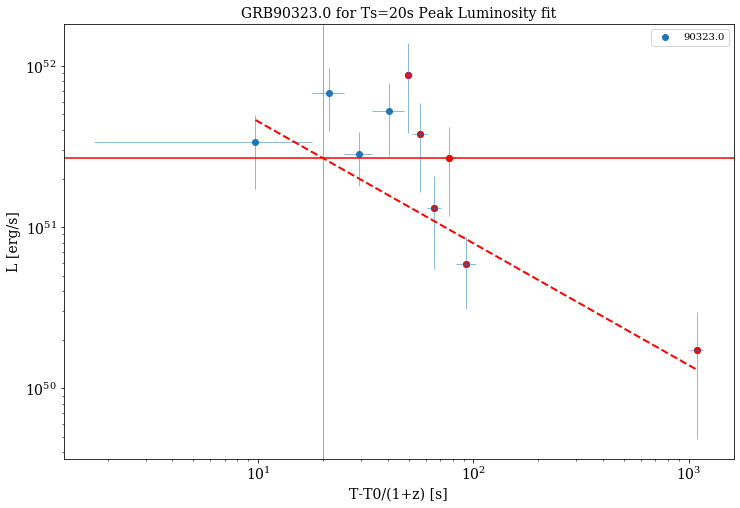

90328.0
normalised luminosity from ts onwards
luminosity = 1.7121900000000003e+50
-8.138333690782958e+49
+1.2420204694736965e+50

normalised luminosity 5 - 40s fit
was inf
now 56.8619948397612
luminosity = 5.382609991635593e+51
-5.380616918223548e+51
+5.173746411470919e+51

normalised luminosity Ts±30%
luminosity = 1.3690118451868893e+50
-1.3690118451867649e+50
+1.3690118451867026e+50

normalised luminosity peak-Ts
luminosity = 1.7121899781856129e+50
-8.138333690782958e+49
+1.2420204694736965e+50



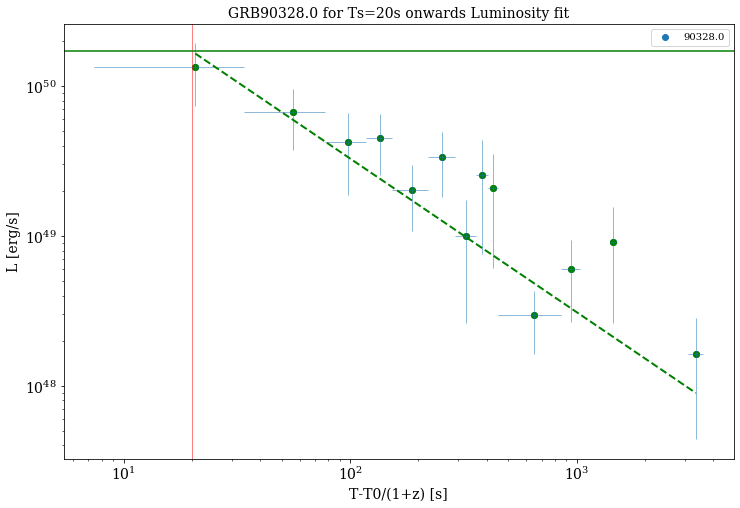

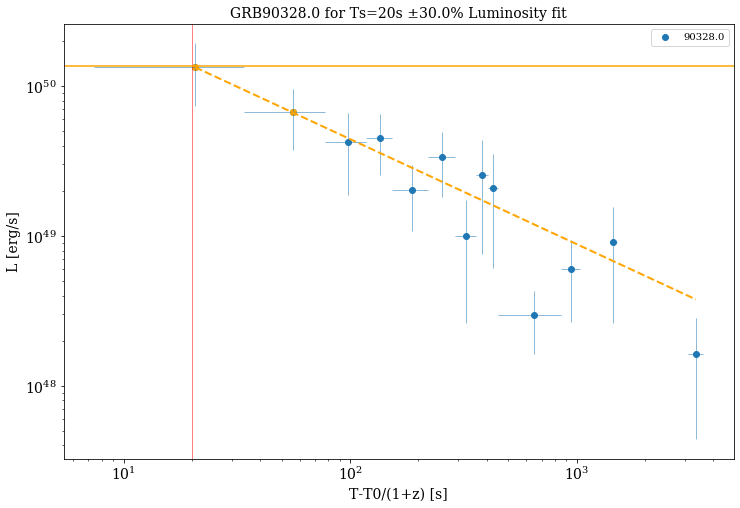

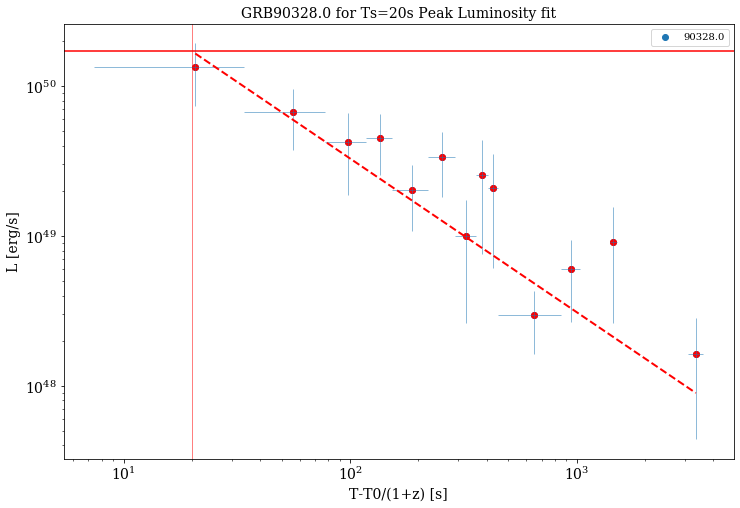

090902B
normalised luminosity from ts onwards
luminosity = 3.378042e+51
-1.890710096042839e+51
+4.2046383274162526e+51

normalised luminosity 5 - 40s fit
luminosity = 3.481528183650565e+51
-1.6480893940812093e+51
+3.069956384422669e+51

normalised luminosity Ts±30%
luminosity = 3.4045904848502775e+51
-1.8410078974876364e+51
+3.799774322674878e+51

normalised luminosity peak-Ts
luminosity = 3.6228533172675855e+51
-7.755142188546874e+50
+9.434269450526042e+50



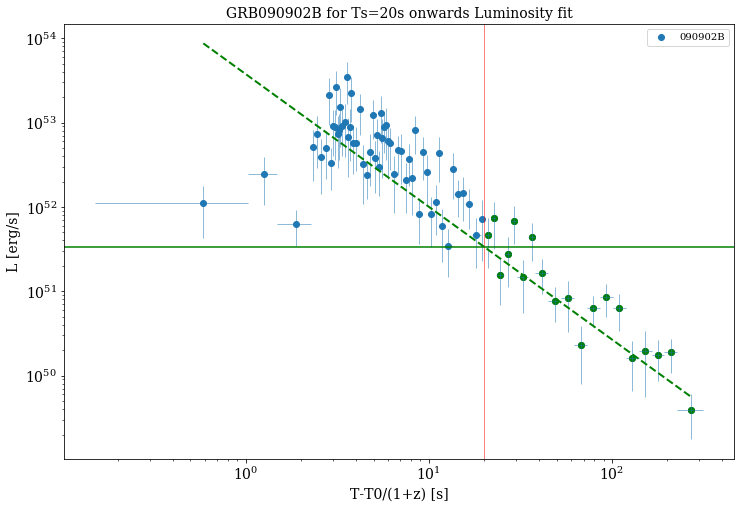

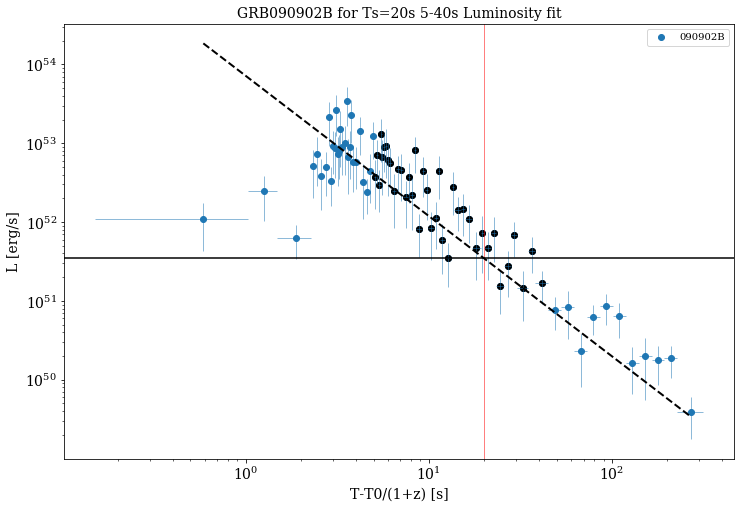

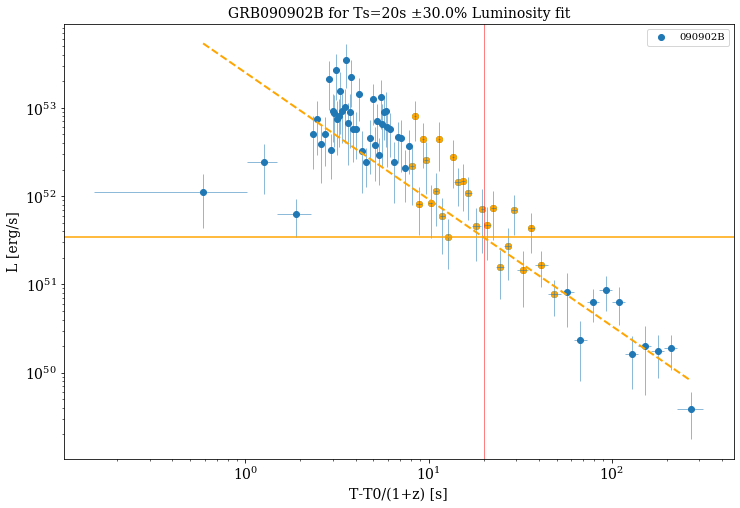

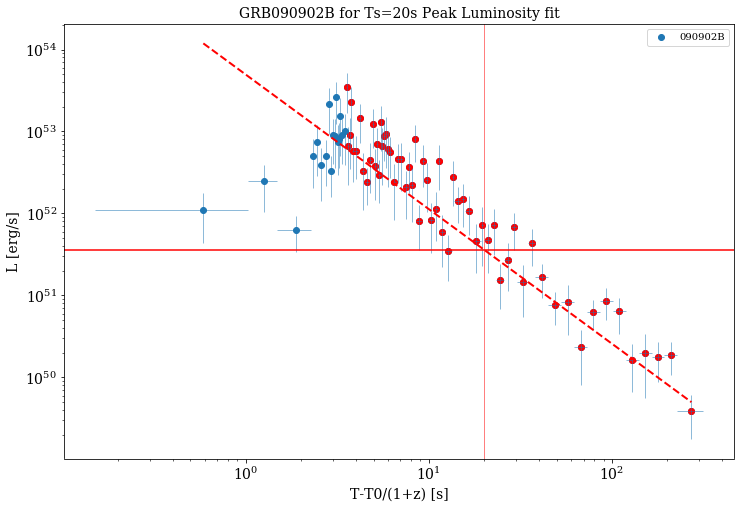

090926A
normalised luminosity from ts onwards
luminosity = 5.047897e+51
-2.0690089086951084e+51
+4.1924838528682225e+51

normalised luminosity 5 - 40s fit
luminosity = 5.8304681836936745e+51
-2.8241899087146247e+51
+5.538451869506876e+51

normalised luminosity Ts±30%
luminosity = 5.032447514264241e+51
-2.352158930944182e+51
+4.312869072755844e+51

normalised luminosity peak-Ts
luminosity = 5.761836670488279e+51
-1.8008257341469726e+51
+3.134629829004203e+51



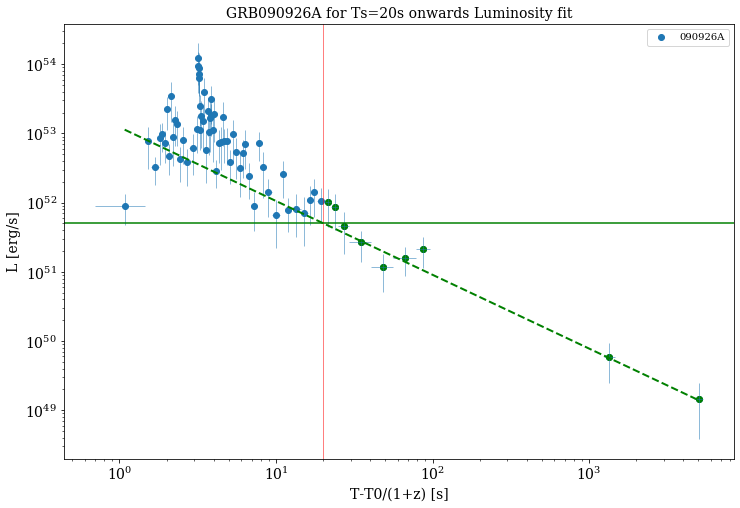

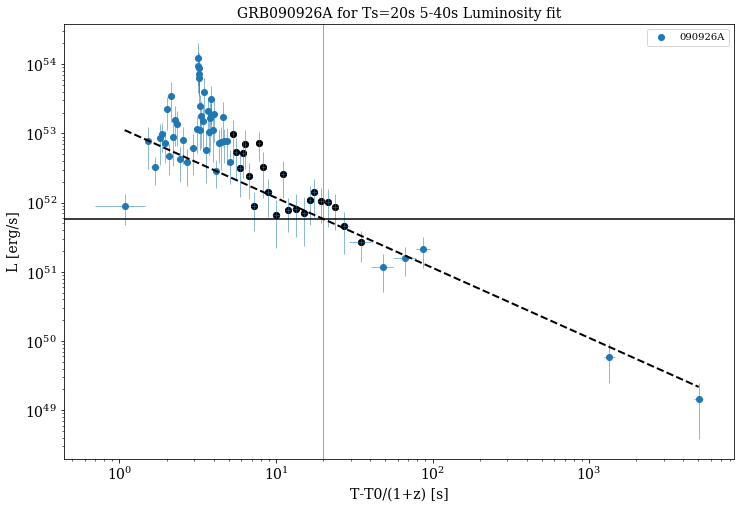

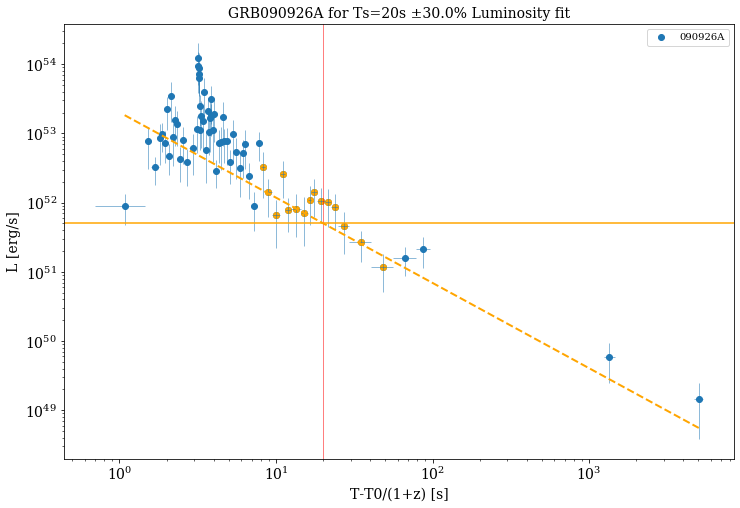

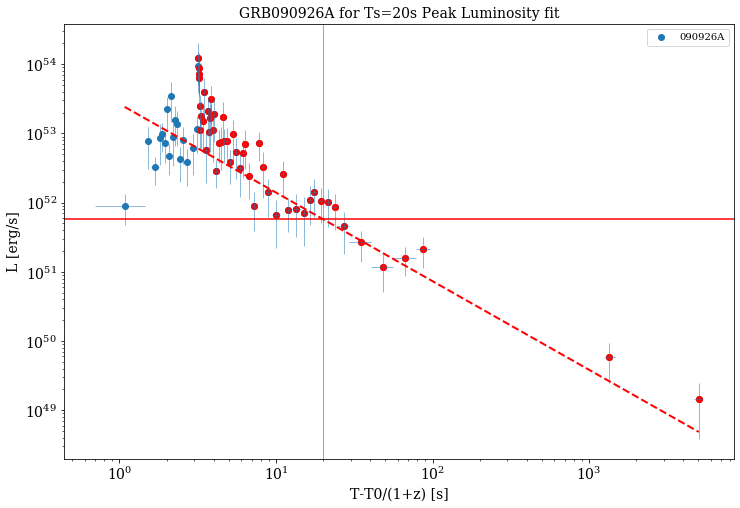

91003.0
normalised luminosity from ts onwards
luminosity = 3.5103000000000005e+49
-2.715281960496283e+49
+8.076624878707378e+49

normalised luminosity 5 - 40s fit
luminosity = 5.8304681836936745e+51
-2.8241899087146247e+51
+5.538451869506876e+51

normalised luminosity Ts±30%
luminosity = 4.55938730060909e+49
-4.559387300608831e+49
+4.559387300608831e+49

normalised luminosity peak-Ts
luminosity = 5.175080034901165e+49
-3.795526442642949e+49
+9.669579718148055e+49



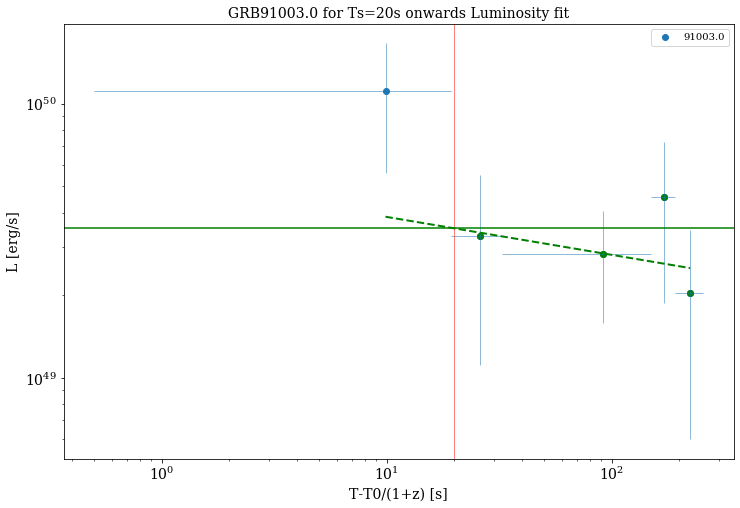

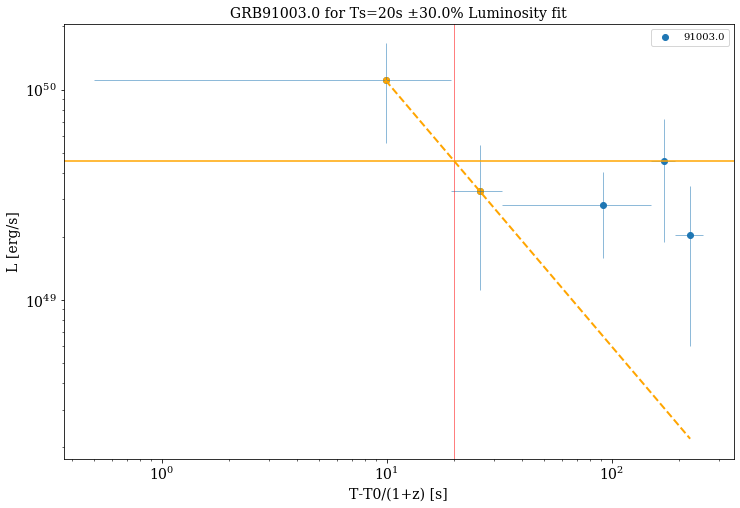

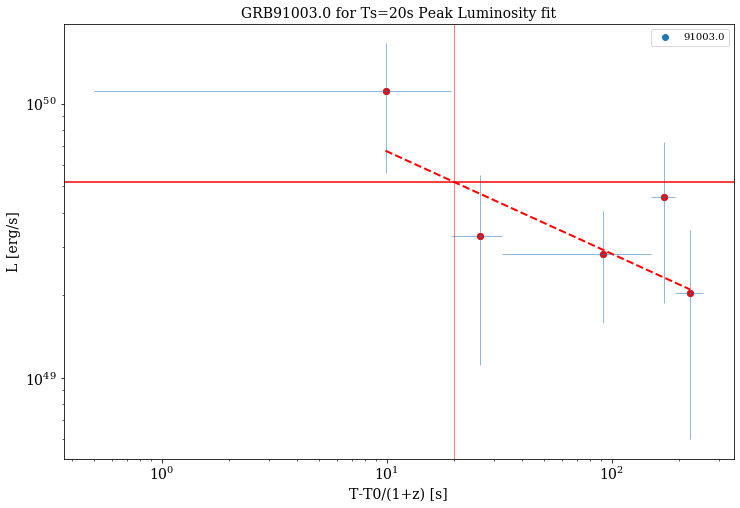

100414A
normalised luminosity from ts onwards
luminosity = 6.738880000000001e+50
-5.709285529455576e+50
+6.590909770776087e+51

normalised luminosity 5 - 40s fit
was nan
now 42.16538048554928
was nan
now 44.5455686451023
luminosity = 4.645660477806286e+51
-4.6454568432803894e+51
+4.6454453483411327e+51

normalised luminosity Ts±30%
luminosity = 2.0120374161824005e+51
-1.8894220940634116e+51
+3.2304971548890027e+52

normalised luminosity peak-Ts
luminosity = 1.5558477979006287e+51
-1.3890620088167087e+51
+5.914374258923051e+51



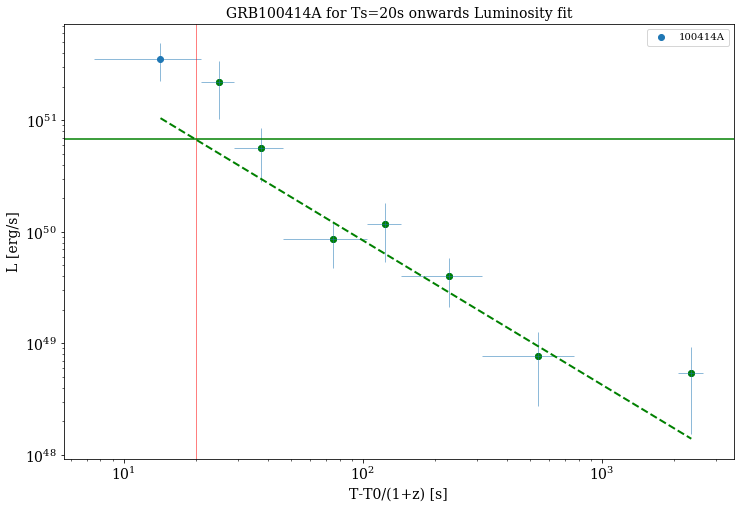

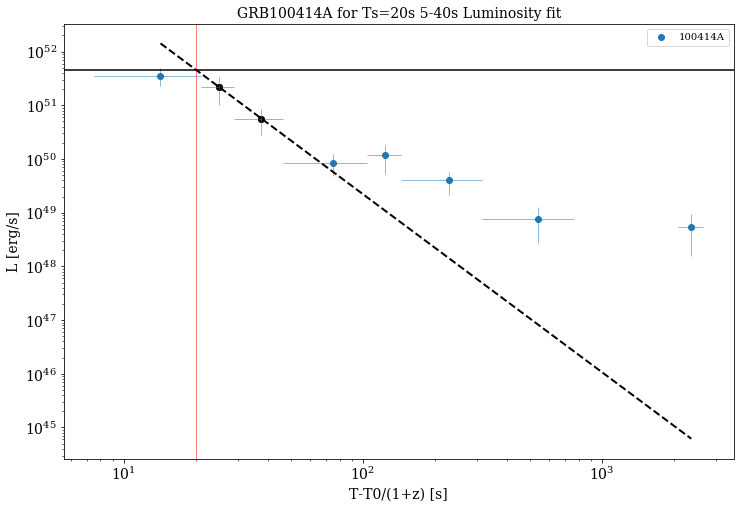

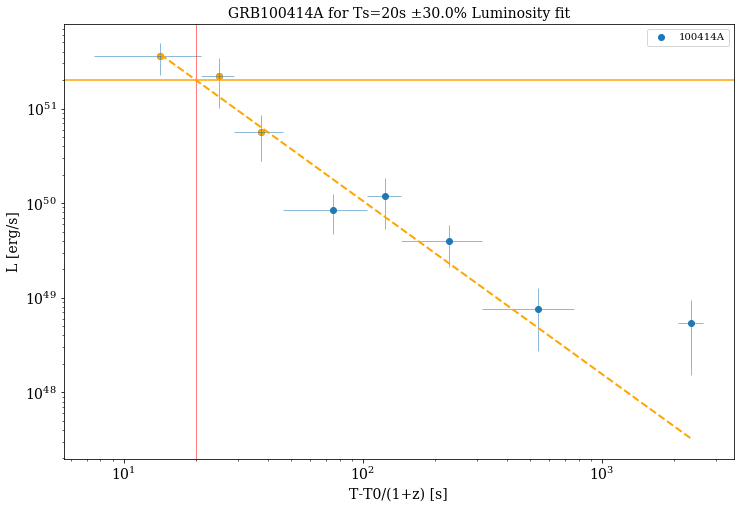

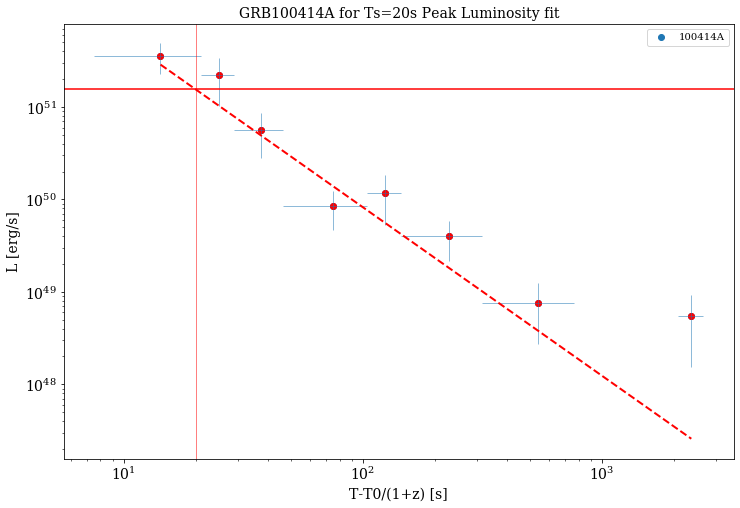

120624B
normalised luminosity from ts onwards
luminosity = 9.0168e+50
-5.511886617709281e+50
+1.0401574066280857e+51

normalised luminosity 5 - 40s fit
was nan
now 53.5382223891212
was nan
now 42.290632326717514
luminosity = 4.645660477806286e+51
-4.645401918997898e+51
+4.645456238386066e+51

normalised luminosity Ts±30%
luminosity = 3.5012191312213226e+50
-3.501219131195848e+50
+3.501219131195848e+50

normalised luminosity peak-Ts
luminosity = 1.855457638702254e+52
-1.423232006250434e+52
+5.812441346662676e+52



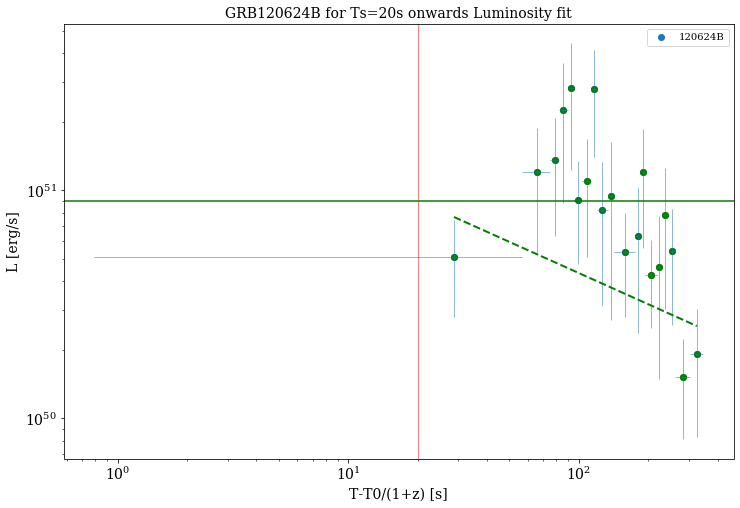

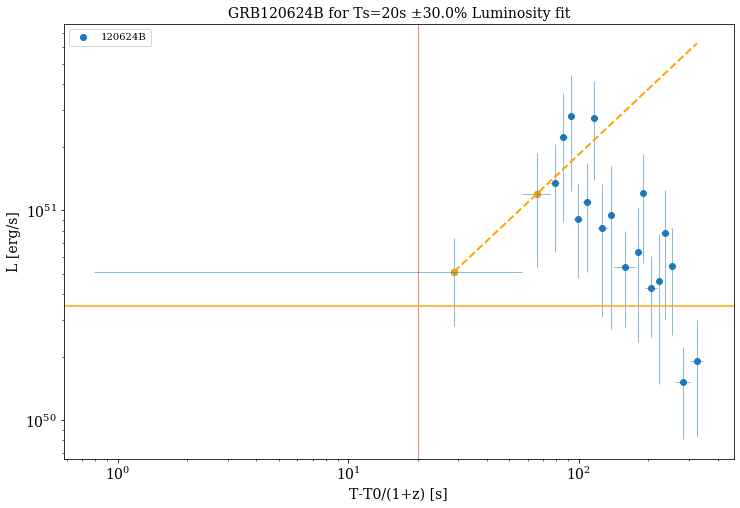

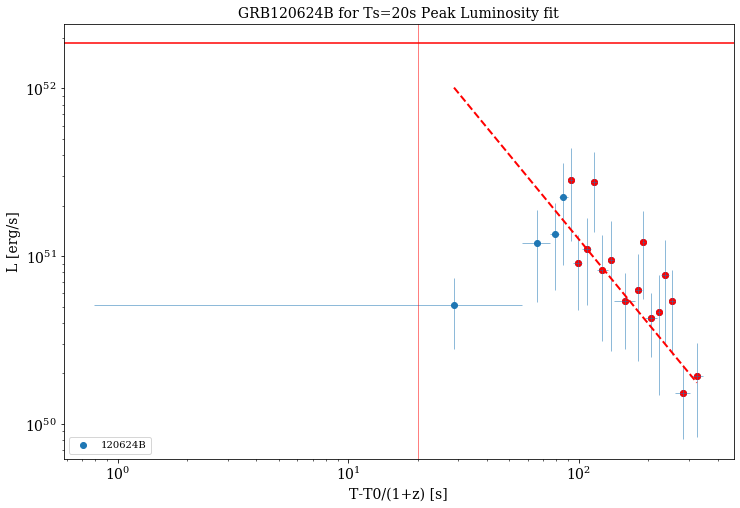

130427A
normalised luminosity from ts onwards
luminosity = 2.59415e+50
-4.853215293125365e+49
+5.912983539140924e+49

normalised luminosity 5 - 40s fit
luminosity = 1.9809412667648865e+50
-9.648815331193142e+49
+1.6997833633902097e+50

normalised luminosity Ts±30%
luminosity = 2.0221013376023594e+50
-9.311222299891727e+49
+1.5479972978580367e+50

normalised luminosity peak-Ts
luminosity = 2.5014699954490143e+50
-4.533286053451002e+49
+5.438447049341582e+49



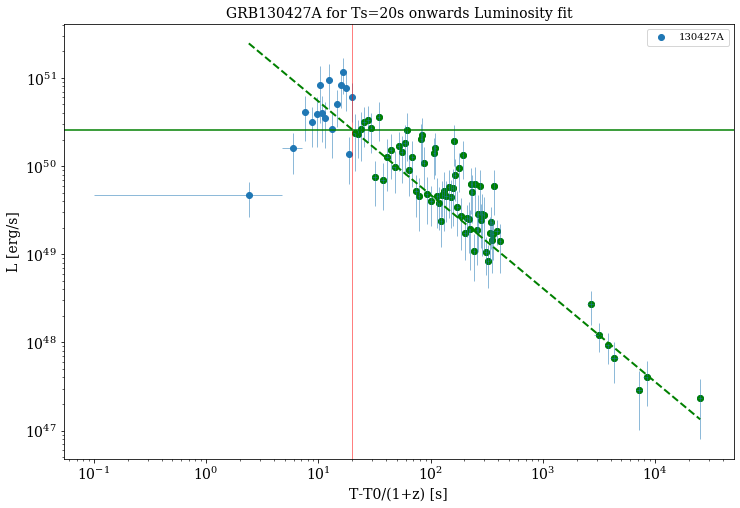

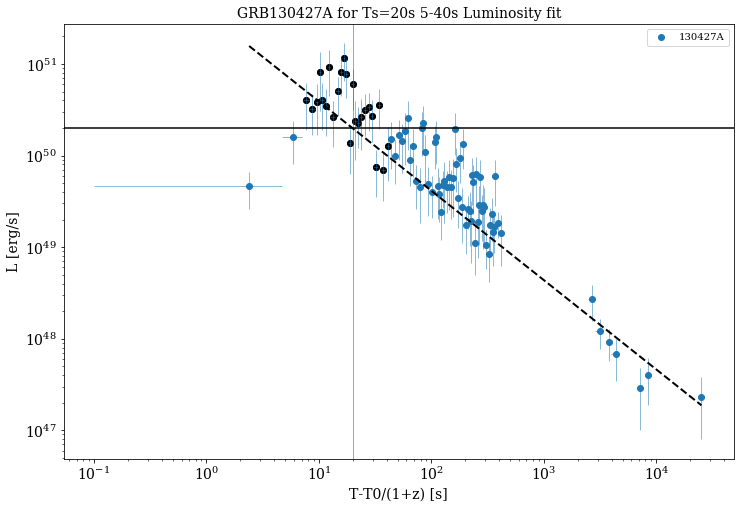

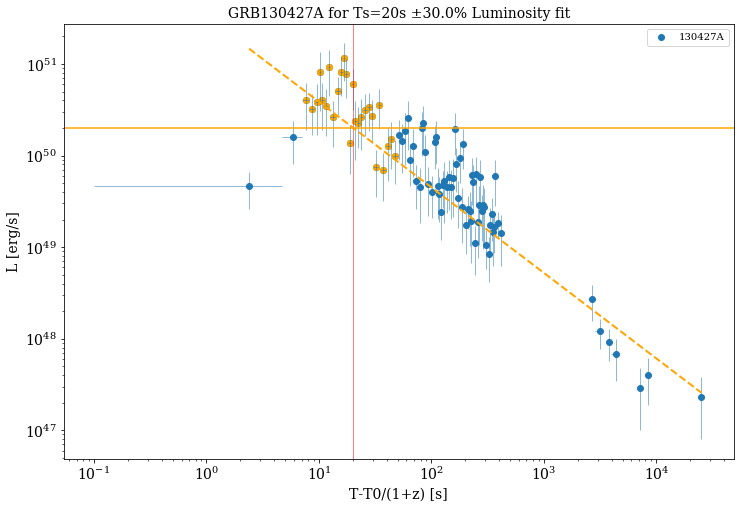

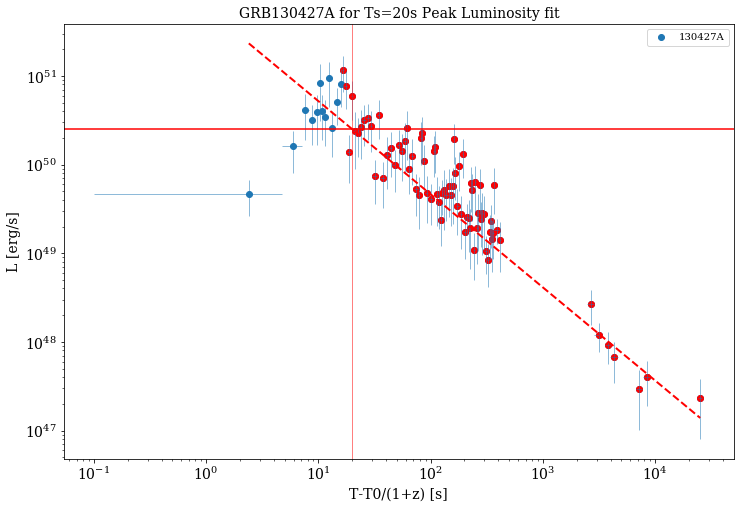

130518A
normalised luminosity from ts onwards
luminosity = 2.4292670000000003e+51
-1.0658585183535868e+51
+1.8631846319347034e+51

normalised luminosity 5 - 40s fit
luminosity = 1.3986552729615163e+51
-1.3986552729608803e+51
+1.3986552729608803e+51

normalised luminosity Ts±30%
luminosity = 1.755333937044831e+51
-9.965802111324824e+50
+2.084108413074352e+51

normalised luminosity peak-Ts
was nan
now 173.0269372884183
was nan
now 179.27061700029873
luminosity = 1.5042027729424936e+52
-1.4439738601997507e+52
+1.441800498950608e+52



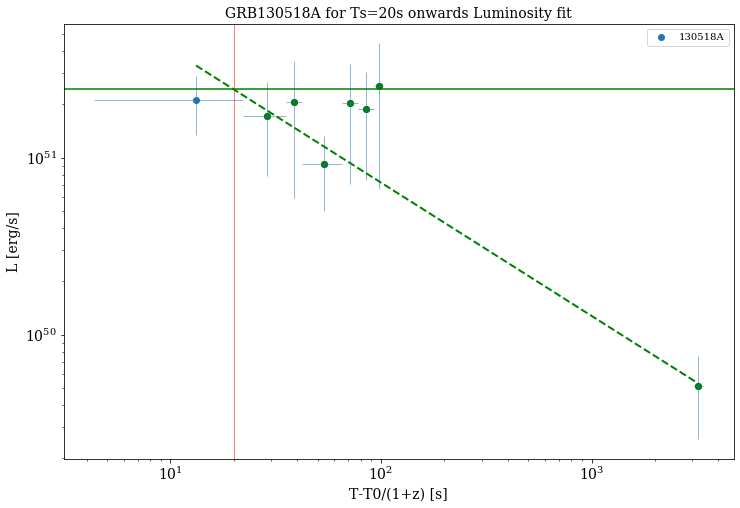

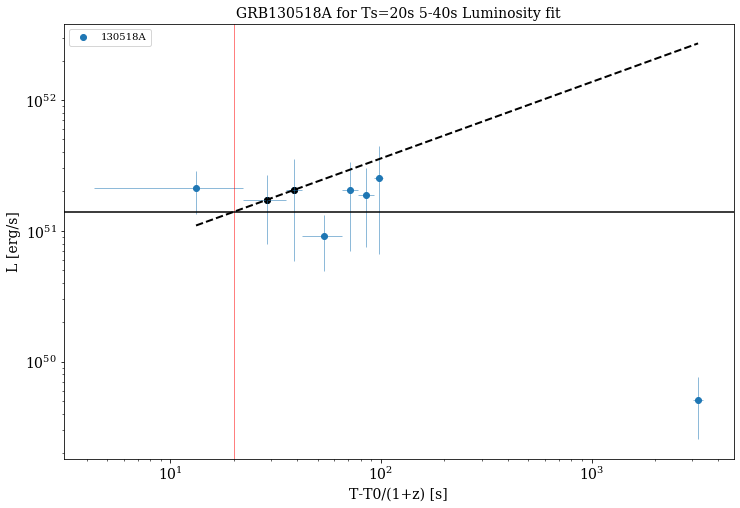

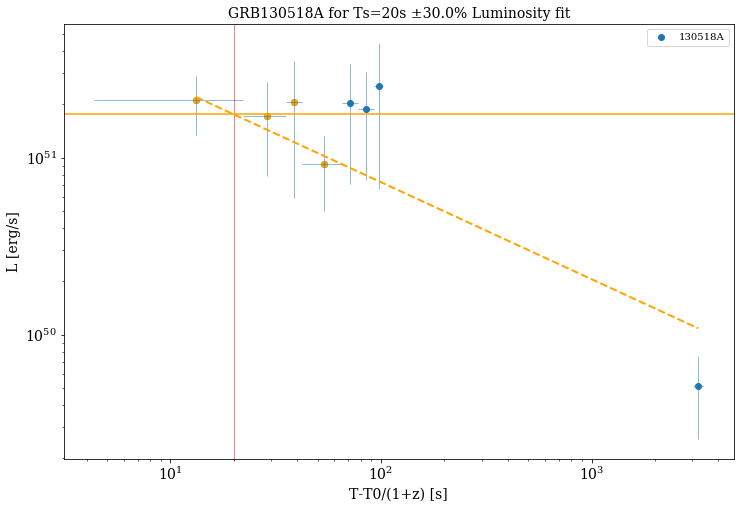

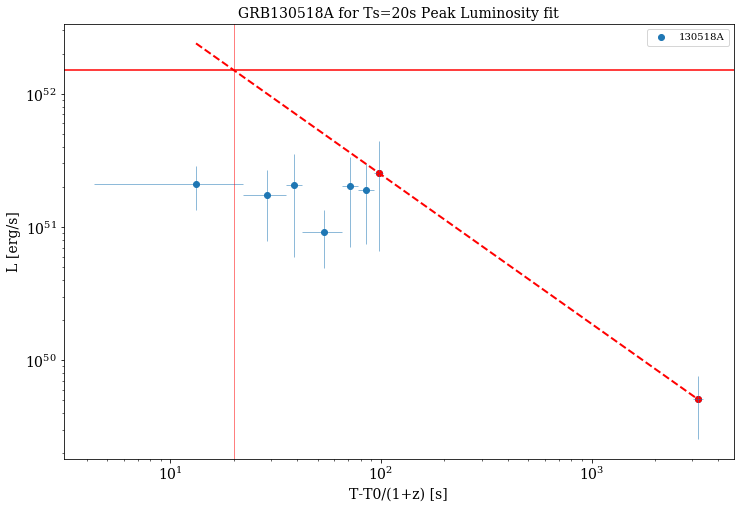

131108A
normalised luminosity from ts onwards
luminosity = 1.2885270000000002e+51
-2.130644751405671e+50
+2.4987098719424675e+50

normalised luminosity 5 - 40s fit
luminosity = 1.2523135392662242e+51
-9.320386477064453e+49
+1.0146998563559464e+50

normalised luminosity Ts±30%
luminosity = 1.252940437882354e+51
-1.264780107149656e+50
+1.4206151858311933e+50

normalised luminosity peak-Ts
luminosity = 1.0128979014698712e+51
-1.933550169509371e+50
+1.9272675483431246e+50



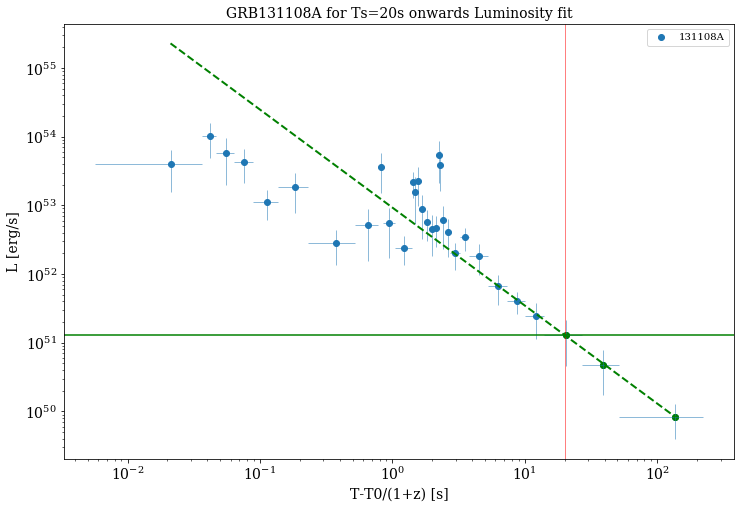

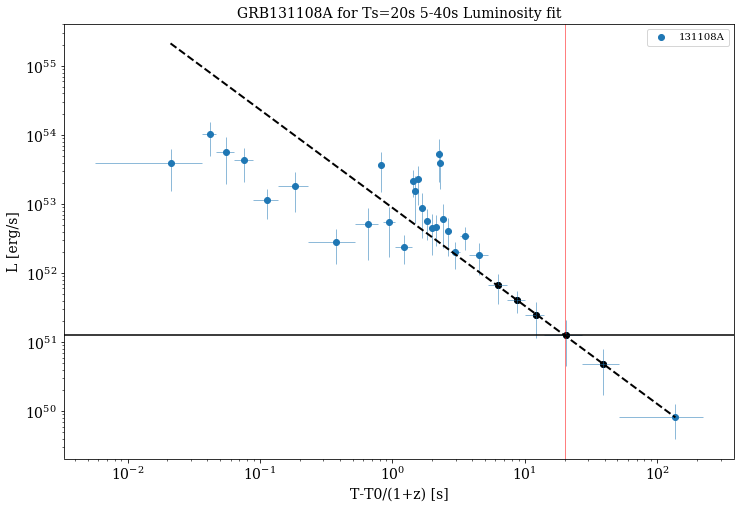

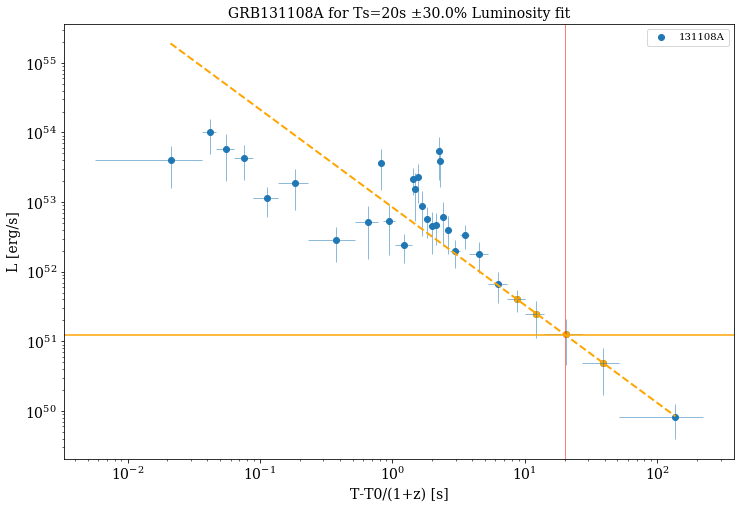

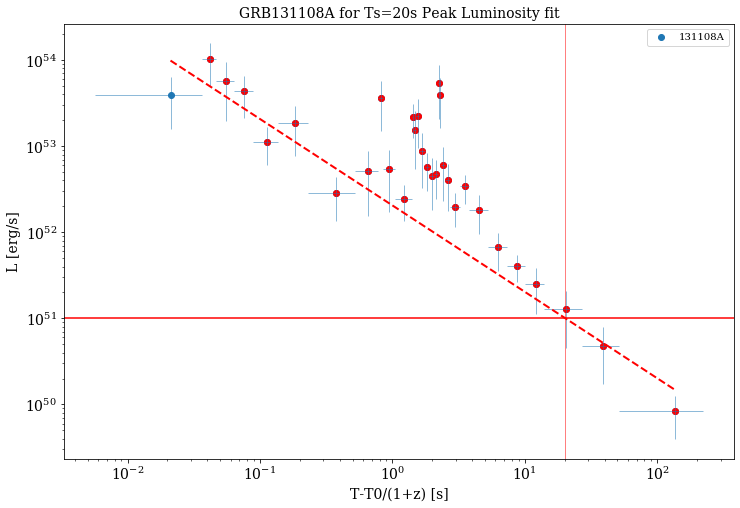

131231A
normalised luminosity from ts onwards
luminosity = 7.7799e+49
-5.053865366203745e+49
+1.4163318157975025e+50

normalised luminosity 5 - 40s fit
luminosity = 1.2523135392662242e+51
-9.320386477064453e+49
+1.0146998563559464e+50

normalised luminosity Ts±30%
luminosity = 5.813529867935364e+49
-5.813529867914215e+49
+5.813529867914215e+49

normalised luminosity peak-Ts
was inf
now 1.0696598153070915
luminosity = 9.031891367731366e+49
-7.54421413655356e+49
+8.684576649460244e+49



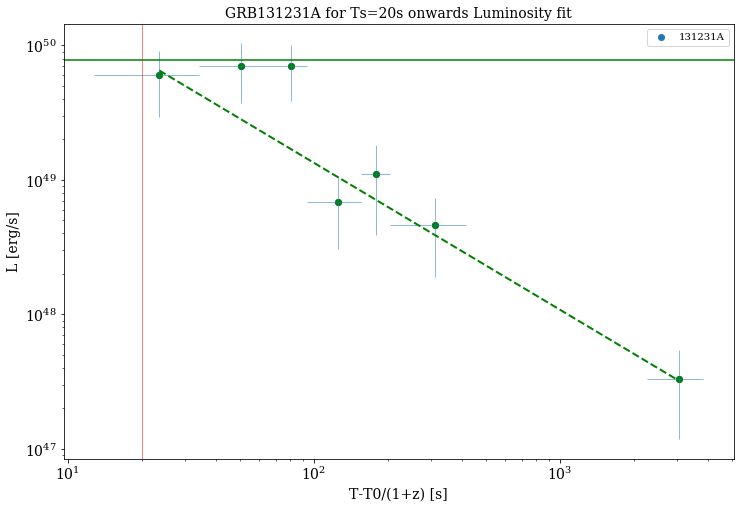

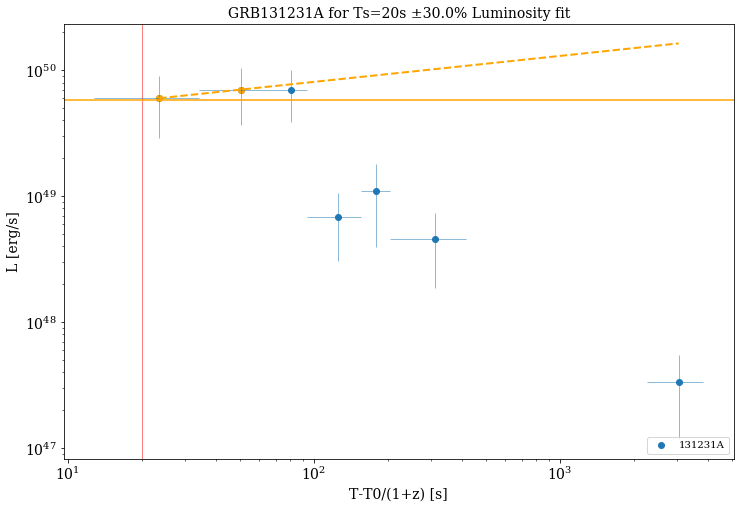

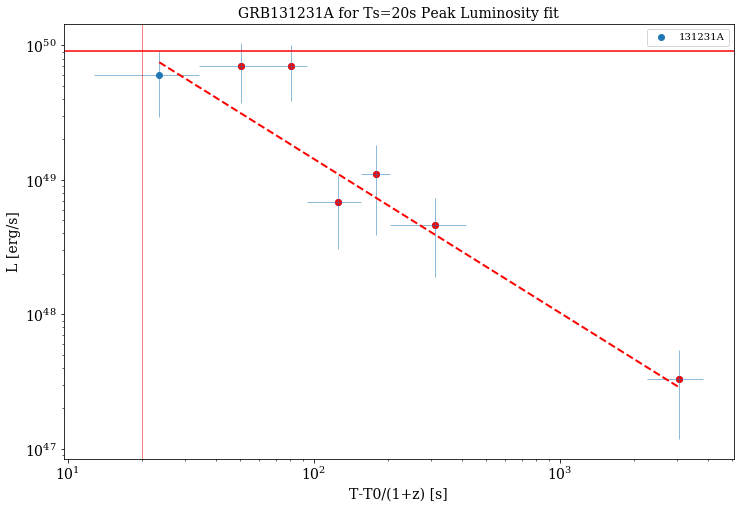

141028A
normalised luminosity from ts onwards
luminosity = 1.6881519999999998e+51
-1.6881515562614274e+51
+1.6881515562614274e+51

normalised luminosity 5 - 40s fit
luminosity = 1.1550284647260146e+51
-9.181472361382813e+49
+9.869946644431965e+49

normalised luminosity Ts±30%
luminosity = 1.1550284647260146e+51
-9.181472361382813e+49
+9.869946644431965e+49

normalised luminosity peak-Ts
luminosity = 1.1313903043071052e+51
-3.743006406505842e+50
+5.340623983223336e+50



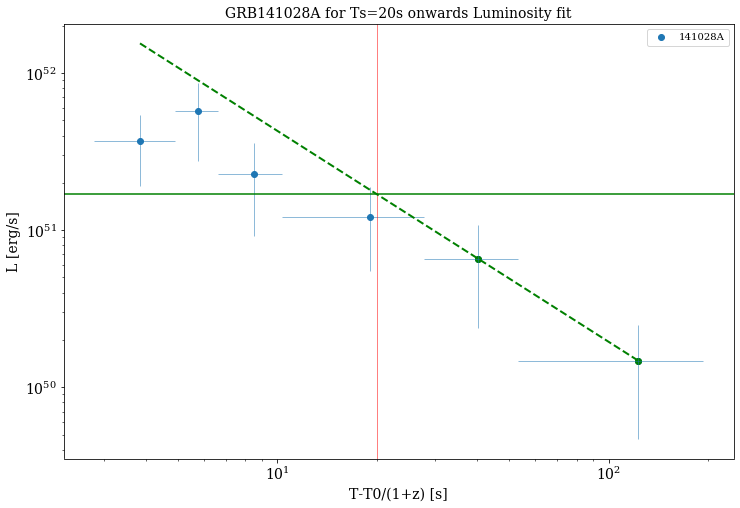

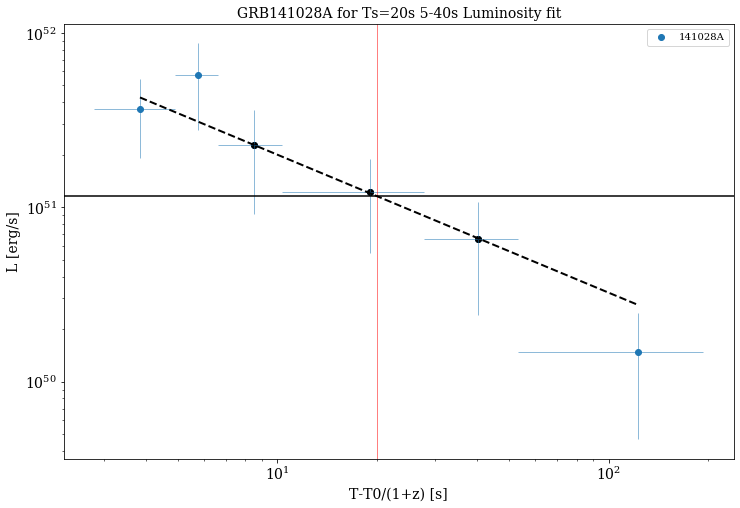

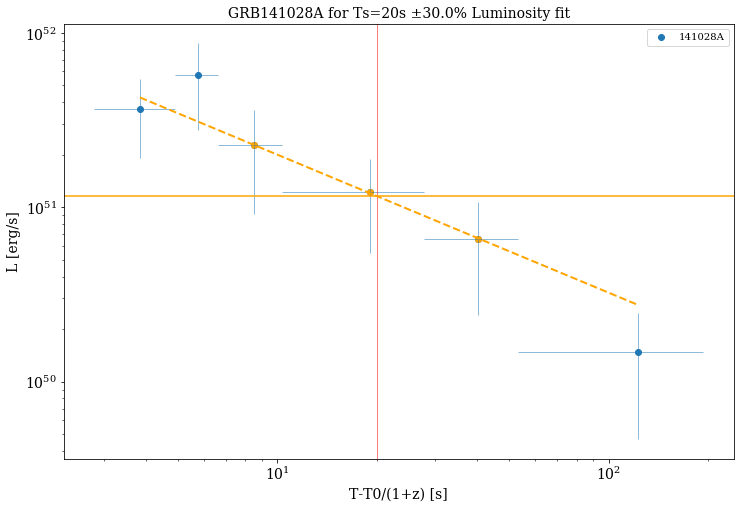

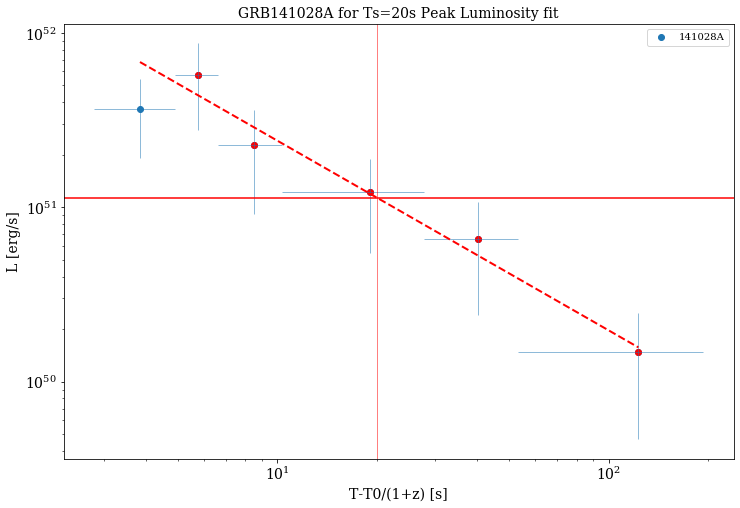

150314A
normalised luminosity from ts onwards
luminosity = 2.0732800000000002e+50
-2.073275666448877e+50
+2.073275666448877e+50

normalised luminosity 5 - 40s fit
luminosity = 1.1550284647260146e+51
-9.181472361382813e+49
+9.869946644431965e+49

normalised luminosity Ts±30%
luminosity = 3.377565008862819e+50
-3.3775650088627706e+50
+3.3775650088627706e+50

normalised luminosity peak-Ts
luminosity = 3.214116034294623e+50
-2.1161771386860105e+50
+5.139177622515275e+50



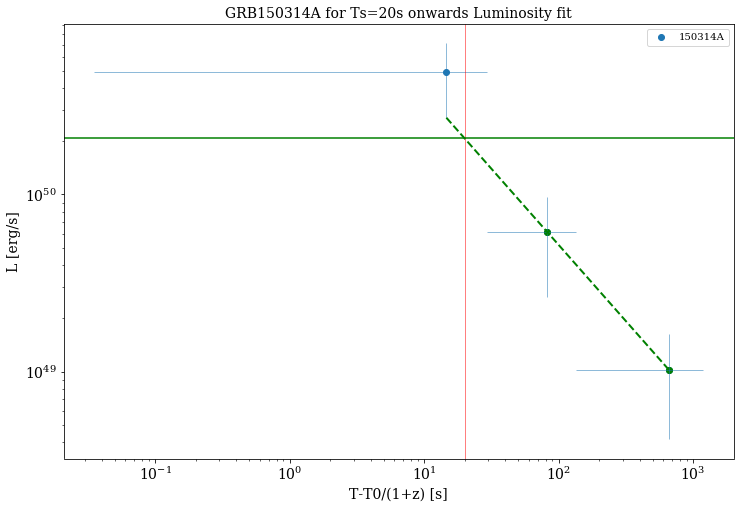

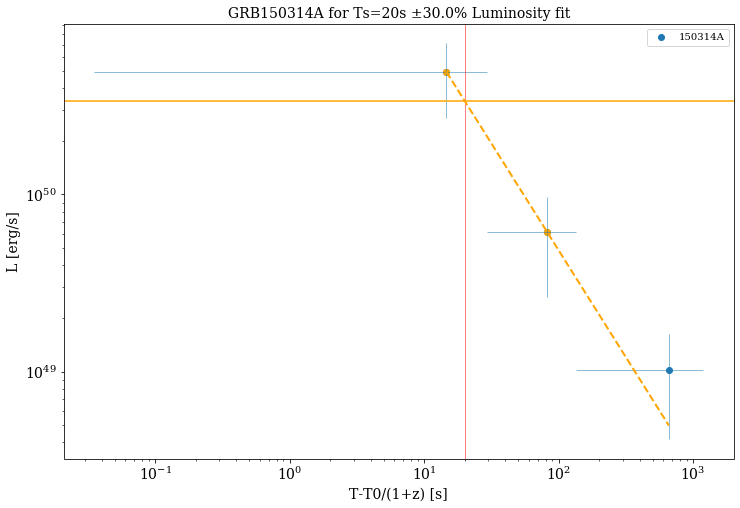

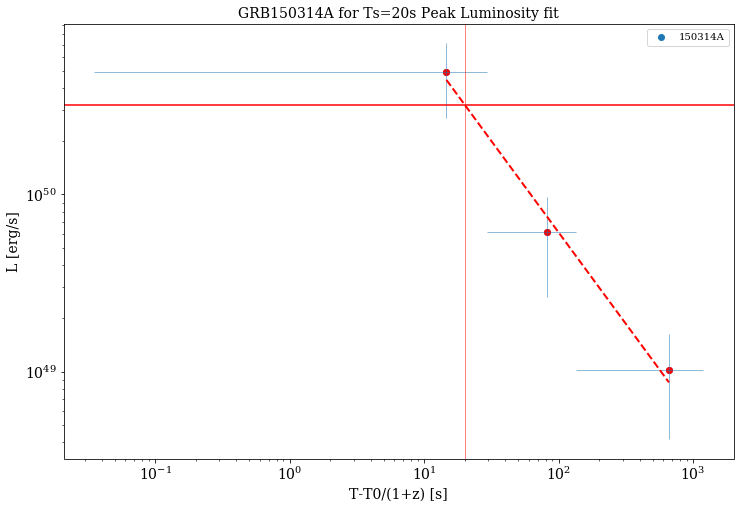

160509A
normalised luminosity from ts onwards
luminosity = 5.3201700000000005e+50
-4.8789110855368095e+50
+2.2368033619011957e+51

normalised luminosity 5 - 40s fit
luminosity = 6.556780757245185e+50
-4.2089396074717104e+50
+1.424755555543644e+51

normalised luminosity Ts±30%
luminosity = 7.921019208470038e+50
-6.037229900090172e+50
+6.60034153616046e+51

normalised luminosity peak-Ts
luminosity = 9.801923937102062e+50
-5.172518695105031e+50
+1.4584649489441353e+51



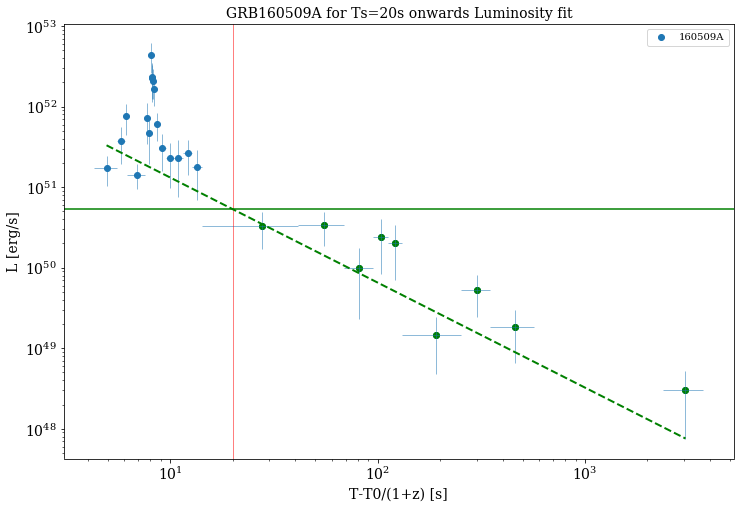

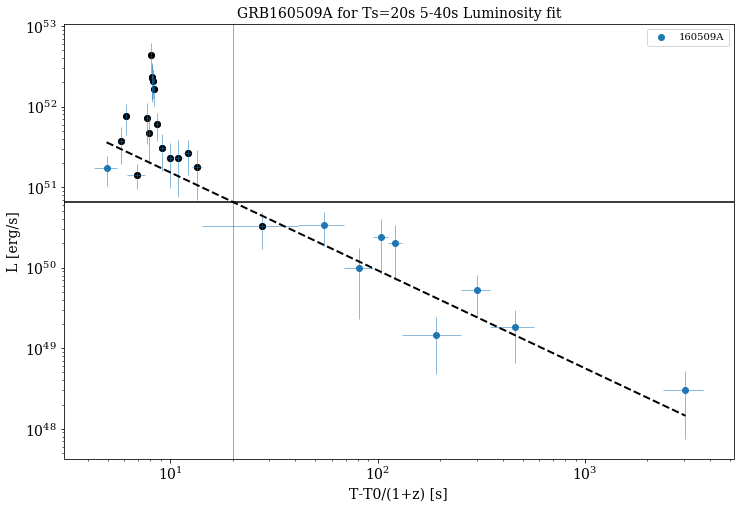

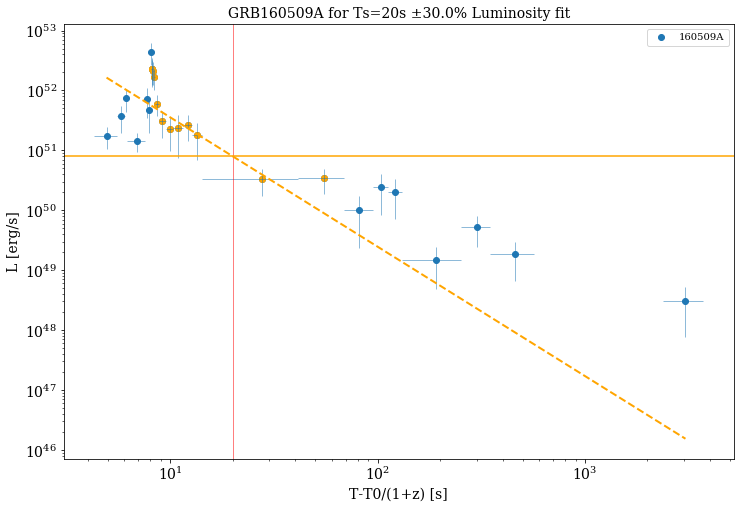

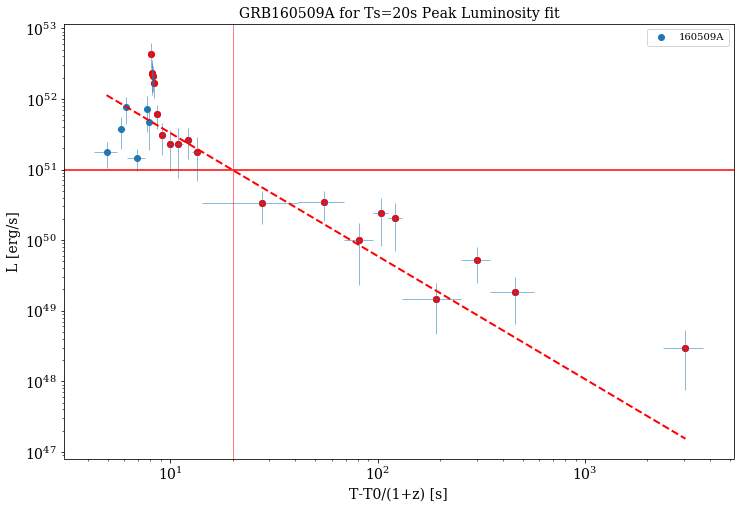

170214A
normalised luminosity from ts onwards
luminosity = 8.043165000000001e+51
-3.986364760672703e+51
+7.25744127139057e+51

normalised luminosity 5 - 40s fit
luminosity = 8.527658349082892e+51
-8.273339729631603e+51
+1.8549626274630894e+53

normalised luminosity Ts±30%
luminosity = 2.7428550188751275e+51
-2.0393251289069093e+51
+4.625189802735411e+51

normalised luminosity peak-Ts
luminosity = 9.975568287331667e+51
-5.010071245911065e+51
+9.792846893319213e+51



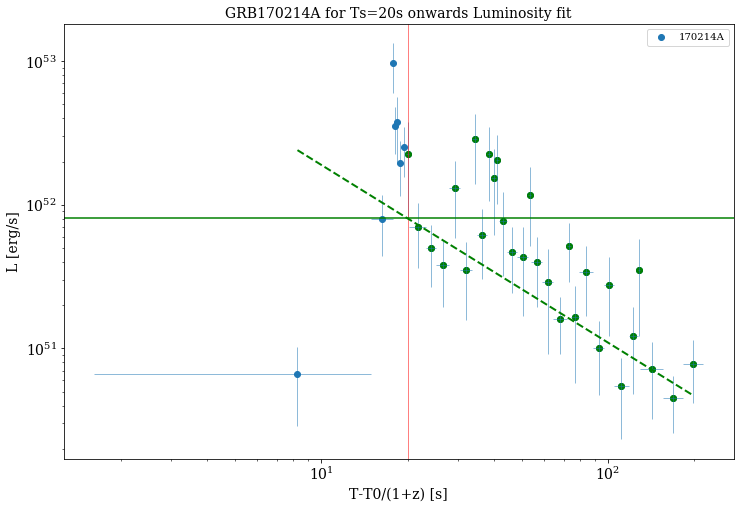

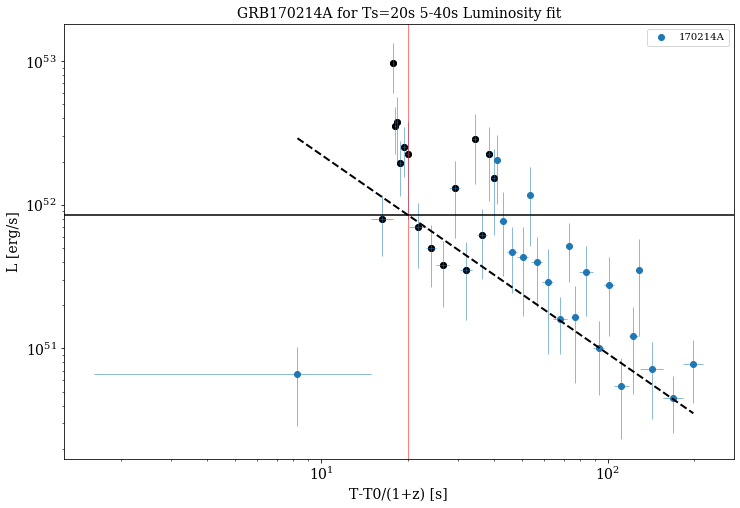

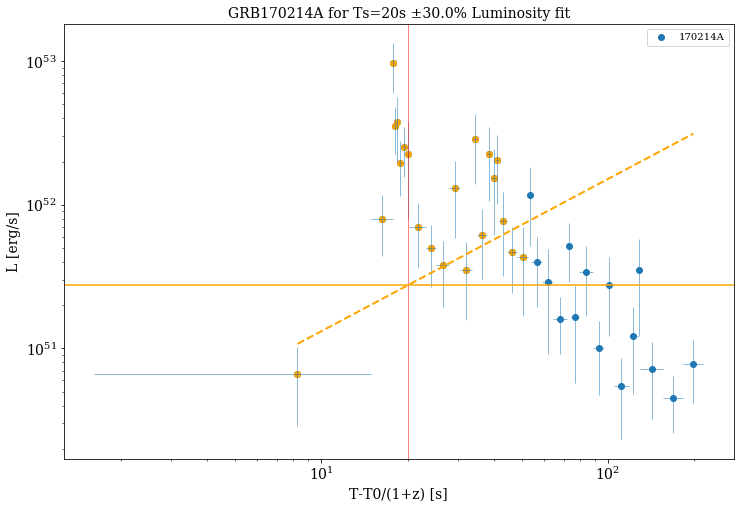

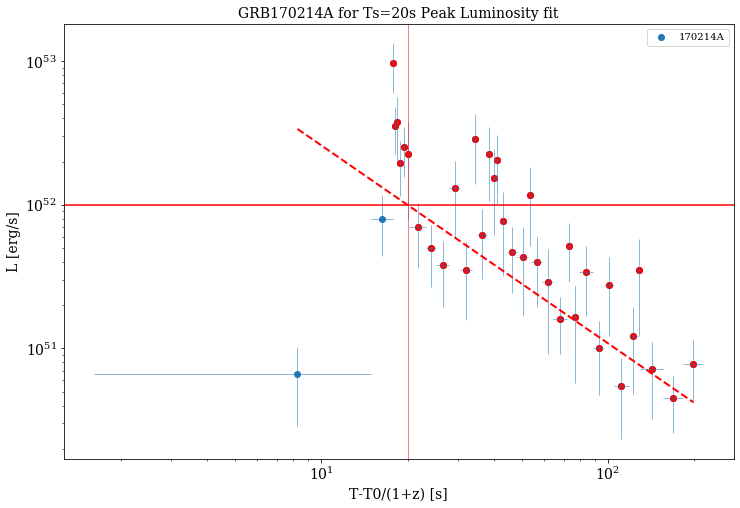

170405A
normalised luminosity from ts onwards
luminosity = 1.2392158400000003e+53
-5.410458521386982e+52
+8.914034367274665e+52

normalised luminosity 5 - 40s fit
luminosity = 8.527658349082892e+51
-8.273339729631603e+51
+1.8549626274630894e+53

normalised luminosity Ts±30%
luminosity = 1.5623223608931913e+53
-1.5623223608931913e+53
+1.5623223608931913e+53

normalised luminosity peak-Ts
luminosity = 1.4969843499682038e+53
-6.798974733147409e+52
+1.3201561549438735e+53



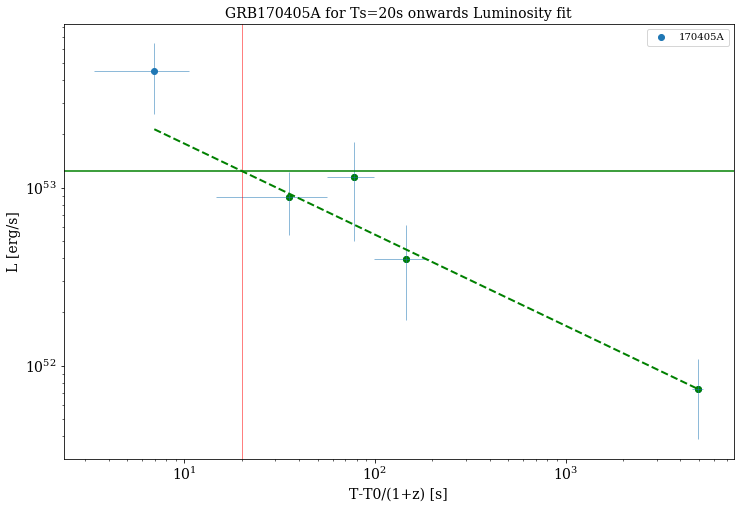

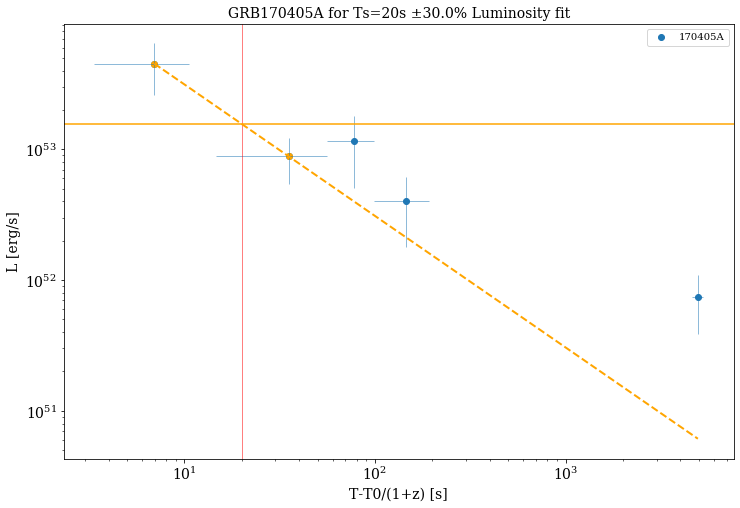

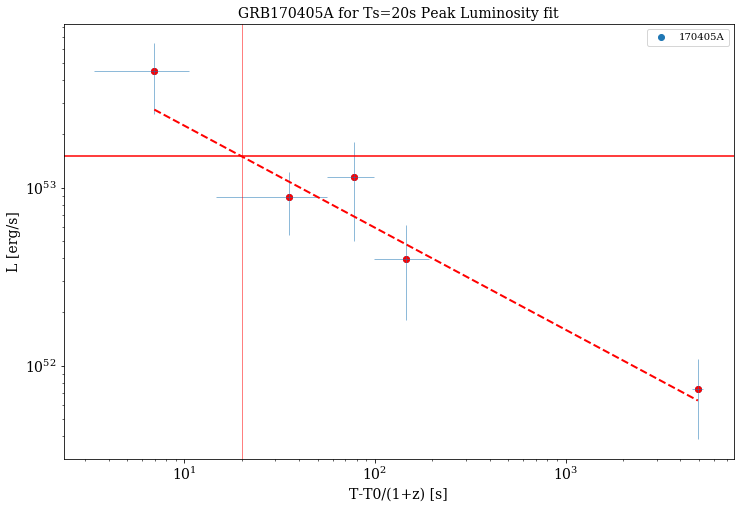

180720B
normalised luminosity from ts onwards
luminosity = 2.93362e+50
-1.4926763860740205e+50
+2.670829308966612e+50

normalised luminosity 5 - 40s fit
luminosity = 1.163325172602158e+50
-1.1213771974968714e+50
+1.3816278353589841e+51

normalised luminosity Ts±30%
luminosity = 1.2980304959954326e+50
-8.795828769128473e+49
+2.143707003813093e+50

normalised luminosity peak-Ts
luminosity = 1.4814693496756135e+51
-6.551076977898904e+50
+1.1890769401955138e+51



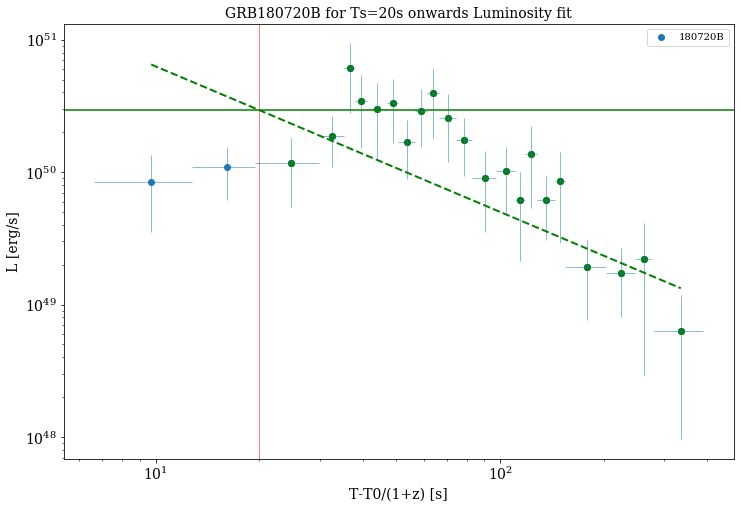

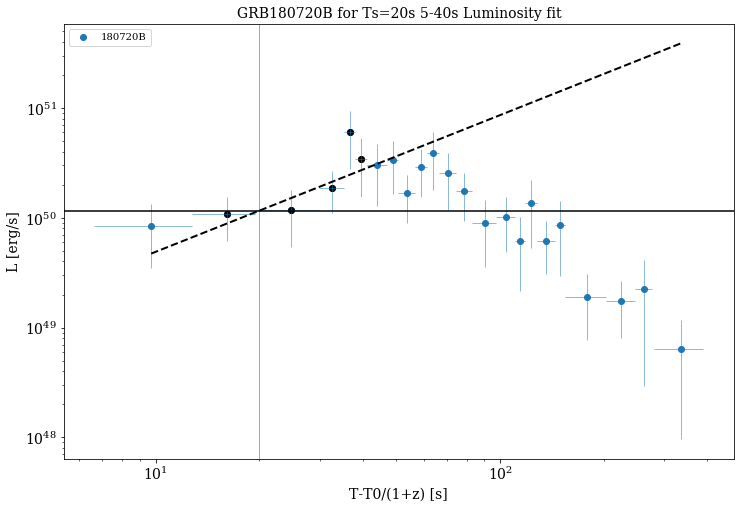

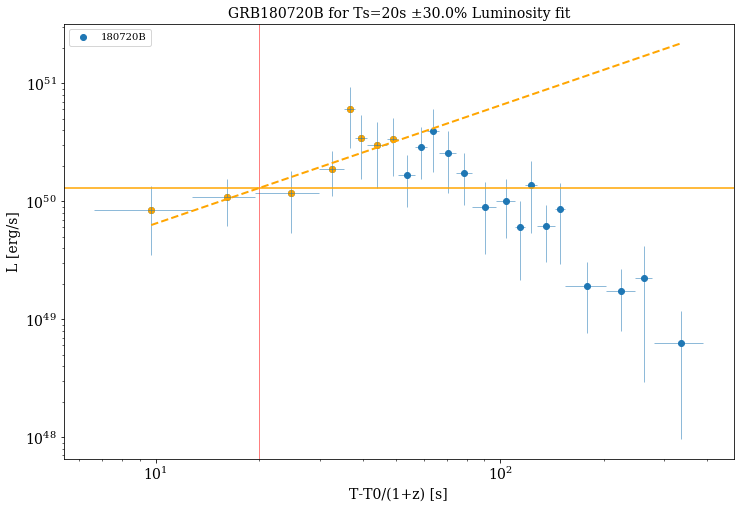

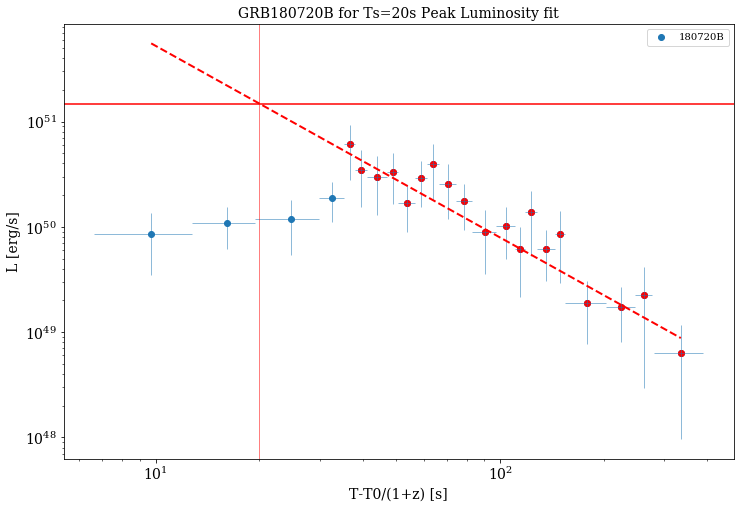

In [74]:
#def luminosity(table):

v=0
n=0
all_redshift, redshift = [], []
m=0

Ts = 20
upper_bound = 40
lower_bound = 5
        
j = 0
diff_mean = []
diff_std = []

#arrays for collecting terms
alpha = []
alpha_err = []

norm_alpha_tp, norm_lum_tp, norm_amp_tp = [],[], []
norm_alpha_tp_err_plus, norm_alpha_tp_err_minus = [], []

norm_alpha_ts, norm_lum_ts, norm_amp_ts = [],[], []
norm_alpha_ts_err_plus, norm_alpha_ts_err_minus = [], []

norm_alpha_U, norm_lum_ts_U, norm_amp_U = [], [], []
norm_alpha_U_err_plus, norm_alpha_U_err_minus = [], []

norm_alpha_per, norm_lum_ts_per, norm_amp_per = [], [],[]
norm_alpha_per_err_plus, norm_alpha_per_err_minus = [], []

norm_alpha_peak, norm_lum_ts_peak, norm_amp_peak = [], [], []
norm_alpha_peak_err_plus, norm_alpha_peak_err_minus = [], []

all_T, all_lum, all_T_err, all_lum_err = [], [], [], []
all_a_ts, all_a_U, all_a_per, all_a_peak, all_a_tp = [], [], [], [], []

brightness_ts, brightness_U, brightness_per, brightness_peak, brightness_tp = [], [], [], [], []


all_parameters = []

lum_params = []

hist_lum_1, hist_lum_10, hist_lum_100 = [], [], []     #for plotting histogram, inputting luminosities at 1s,10s, 20s up to 50s

all_names, peak_params = [], []

lum_ts_peak_err_plus, lum_ts_peak_err_minus = [], []
lum_ts_per_err_plus, lum_ts_per_err_minus = [], []
lum_ts_U_err_plus, lum_ts_U_err_minus = [], []
fit_lum_ts_err_plus, fit_lum_ts_err_minus = [], []
fit_lum_tp_err_plus, fit_lum_tp_err_minus = [], []


lum_ts = []
lum_ts_err = []
grb_name = []


#percentages showing the relative size of the errors compared to the values
ts_Lg_error_per_plus, ts_Lg_error_per_minus, U_Lg_error_per_plus, U_Lg_error_per_minus = [], [], [], []
per_Lg_error_per_plus, per_Lg_error_per_minus, peak_Lg_error_per_plus, peak_Lg_error_per_minus = [], [], [], []

all_luminosity, all_time = [], []

for i in table:
    if i['LUMINOSITY_DISTANCE'] >0 and i['GBMT90']>=2:
        
        z = i['REDSHIFT']
        name = i['GCNNAME']
        dl = i['LUMINOSITY_DISTANCE']
        diff = []
        all_names.append(name)
        all_redshift.append(z)

        n=n+1
        #print(n)


        for k in i['LC_ENE_FLUX_ERR']:
            mask = np.where(i['LC_ENE_FLUX_ERR']!=0) #finding indexs of values where flux error is 0 and masking
            t_end = i['LC_END'][mask] 
            ene_flux = i['LC_ENE_FLUX'][mask] 
            ene_flux_err = i['LC_ENE_FLUX_ERR'][mask] 
            fluence = i['LC_FLUENCE'][mask] 
            flux = i['LC_FLUX'][mask] 
            flux_err = i['LC_FLUX_ERR'][mask] 
            indec = i['LC_INDEX'][mask]   # this is photon index, not spectral index;     
            #photon index = beta+1 e.g photon index 2 = beta +1, where beta = 1
            index_err = i['LC_INDEX_ERR'][mask] 
            median = i['LC_MEDIAN'][mask] 
            t_start = i['LC_START'][mask] 
            ts = i['LC_TS'][mask] 
        
        

        
        g = 1.6e-6               #extra factor missing in the LC_ENE_FLUX values in the .fits
        B = -1*indec               #calculating spectral index from measured photon indicies
        B_err = index_err
        
        #calculating weighted mean of spectral index and error
        B_sum = []
        B_err_sum = []

        if len(B)==1:
            mean_B = B
            #mean_B_err = abs(B_err)
        else:
            mean_B = np.average(B, weights=abs(1/B_err))
            #mean_B_err = np.mean(abs(B_err))
           
                
            
        #calculating k correction
        k_correction = (1+z)**((mean_B-1)-1)

        #calculating corrected luminosities and their errors in normal and log space
        lum = g*ene_flux*4*(np.pi)*(dl**2)*(k_correction)
        lum_err = g*ene_flux_err*4*(np.pi)*(dl**2)*(k_correction)
        
        #calculating the asymmetric errors in log space
        lum_err_plus = np.log10(lum + lum_err) - np.log10(lum)        
        lum_err_minus= np.log10(lum) - np.log10(lum - lum_err)
        

        T_err = ((t_end-t_start)/2)
        T = (t_start+T_err)/(1+z)
        T_err =  T_err/(1+z)
        
        T_err_plus = np.log10(T + T_err) - np.log10(T)
        T_err_minus = np.log10(T) - np.log10(T - T_err)

    
        #calculating the index of T either side of Ts
        diff = abs(T-Ts)
        idx1 = np.argmin(diff)

        if idx1+1 == len(T):
            if T[idx1]<Ts:
                idx2 = idx1 
                idx1 = idx1 - 1
            if T[idx1]>Ts:
                idx2 = idx1 - 1

        else:
            if T[idx1]<Ts:
                idx2 = idx1+1
            if T[idx1]>Ts:
                idx2 = idx1 -1



        if len(ene_flux)<=2:
            pass
        else:
            weight_lum = 1/lum_err
            
#             if idx1 or idx2 == 0:
#                 pass
#             else:
#                 if idx1<idx2:
#                     idx1 = idx2 - 2
#                 else:
#                     idx2 = idx1 - 2

            if T[idx1]<Ts:                 #makign sure the weights are the correct way round
                if idx2 != 0:
                    idx2 = idx2
                T_new = T[idx2:]
                lum_new = lum[idx2:]
                lum_err_p_new = lum_err_plus[idx2:]
                lum_err_m_new = lum_err_minus[idx2:]
                weight_ts = weight_lum[idx2:]
                weight_lum_new = 1/lum_err_p_new
            else:
                if idx1 != 0:
                    idx1 = idx1
                T_new = T[idx1:]
                lum_new = lum[idx1:]
                lum_err_p_new = lum_err_plus[idx1:]
                lum_err_m_new = lum_err_minus[idx1:]
                weight_ts = weight_lum[idx1:]
                weight_lum_new = 1/lum_err_p_new
                
            


            #fitting from ±U
            diff_minus1 = abs(T-lower_bound)                   #lower T threshold
            diff_plus1 = abs(upper_bound-T)                #upper T threshold
            idx_minus1 = np.argmin(diff_minus1)+1          #finding lower threshold index
            idx_plus1 = np.argmin(diff_plus1) +1      #finding upper threshold index
            T_min_plus1 = T[idx_minus1:idx_plus1]         #making new T array
            lum_min_plus1 = lum[idx_minus1:idx_plus1]     #making new L array
            weight_mp1 = weight_lum[idx_minus1:idx_plus1]    #making new weights array
            

            #fitting from ±% Ts
            p = 0.3                 #percentage value
            d_minus2 = 10**((1-p)*np.log10(Ts)) 
            d_plus2 =  10**((1+p)*np.log10(Ts))
            diff_minus2 = abs(T-d_minus2)
            diff_plus2 = abs(T-d_plus2)
            idx_minus2 = np.argmin(diff_minus2)
            idx_plus2 = np.argmin(diff_plus2)+1
            T_min_plus2 = T[idx_minus2:idx_plus2]
            lum_min_plus2 = lum[idx_minus2:idx_plus2]
            weight_mp2 = weight_lum[idx_minus2:idx_plus2]
            
#             print(d_minus2)
#             print(d_plus2)
            
            #fitting from peak luminosity onwards
            peak_idx = np.argmax(lum)
            peak_lum = lum[peak_idx:]
            peak_T = T[peak_idx:]
            peak_weight = weight_lum[peak_idx:]

            
            #not going ahead with fits where the indexes are too small to fit
            if len(T_min_plus2)<=1:
                pass
            else:

                if len(lum_new)<=1:    #running ts onwards fits & params if there are >1 points after ts
                    pass
                else:
                    
                    print(name)

                    #calculating luminosity at Ts
                    if idx1 > idx2:
                        lum1 = lum[idx1]       #finding luminosity data points either side of Ts
                        lum2 = lum[idx2]
                        T1 = T[idx1]
                        T2 = T[idx2]
                        w1 = 1/lum_err[idx1]
                        w2 = 1/lum_err[idx2]
                    else:
                        lum1 = lum[idx2]
                        lum2 = lum[idx1]
                        T1 = T[idx2]
                        T2 = T[idx1]
                        w1 = 1/lum_err[idx2]
                        w2 = 1/lum_err[idx1]


                    #calculating best fit parameters and covariances for the data lmfit
                    #making powerlaw model for linear fits
                    model1 = PowerLawModel(prefix='pow_')

                    # make parameters with starting values:
                    par3 = model1.make_params(pow_amplitude=1e6, pow_exponent=-1.0)


                    np.nan_to_num(weight_lum_new,copy=False)
                
                

                
                    resultn2 = model1.fit(lum_new/1e50, par3, x=T_new, weights=weight_ts) #linear ts with weight 
                    norma2, normN2 = resultn2.best_values['pow_exponent'],resultn2.best_values['pow_amplitude'] #norm two-point params
                    normci2 = lmfit.conf_interval(resultn2, resultn2, sigmas=[0.68])


                    if len(lum_min_plus1)<=1:       #running ± U Ts fits & params if there are >1 points in the collection
                        pass
                    else:
                        resultn3 = model1.fit(lum_min_plus1/1e50, par3, x=T_min_plus1, weights=weight_mp1) #±U Ts luminosity 
                        norma3, normN3 = resultn3.best_values['pow_exponent'],resultn3.best_values['pow_amplitude'] #±U Ts luminosity params
                        normci3 = lmfit.conf_interval(resultn3, resultn3, sigmas=[0.68])


                    #running ± 30 percent fits & parameters
                    resultn4 = model1.fit(lum_min_plus2/1e50, par3, x=T_min_plus2, weights=weight_mp2) #±30 percent lum 
                    norma4, normN4 = resultn4.best_values['pow_exponent'],resultn4.best_values['pow_amplitude'] #±30 percent lum params
                    normci4 = lmfit.conf_interval(resultn4, resultn4, sigmas=[0.68])


                    #running two-point fits & params
                    resultn5 = model1.fit([lum1/1e50,lum2/1e50], par3, x=[T1,T2], weights=[w1,w1]) #norm two-point
                    norma5, normN5 = resultn5.best_values['pow_exponent'],resultn5.best_values['pow_amplitude'] #norm two-point params
                    normci5 = lmfit.conf_interval(resultn5, resultn5, sigmas=[0.68])


                    #running peak fits & params
                    resultn6 = model1.fit(peak_lum/1e50, par3, x=peak_T, weights=peak_weight)
                    norma6, normN6 = resultn6.best_values['pow_exponent'],resultn6.best_values['pow_amplitude']
                    normci6 = lmfit.conf_interval(resultn6, resultn6, sigmas=[0.68])


                    #extracting sigma errors
                    normcon2, normcon5, normcon3, normcon4, normcon6 = [],[],[],[], []

                    for key, value in normci2.items():
                        normcon2.append(value)

                    for key, value in normci5.items():
                        normcon5.append(value)

                    for key, value in normci3.items():
                        normcon3.append(value)

                    for key, value in normci4.items():
                        normcon4.append(value)

                    for key, value in normci6.items():
                        normcon6.append(value)


                    #errors are an array with [sigma minus, sigma plus]
                    #normalised ts onwards lum errors
                    norma2_sig = [normcon2[1][0][1], normcon2[1][2][1]]
                    normN2_sig = [normcon2[0][0][1], normcon2[0][2][1]]

                    #normalised 2-point lum errors
                    norma5_sig = [normcon5[1][0][1], normcon5[1][2][1]]
                    normN5_sig = [normcon5[0][0][1], normcon5[0][2][1]]

                    #normalised ±U Ts lum
                    norma3_sig = [normcon3[1][0][1], normcon3[1][2][1]]
                    normN3_sig = [normcon3[0][0][1], normcon3[0][2][1]]

                    #normalised ±30% Ts lum
                    norma4_sig = [normcon4[1][0][1], normcon4[1][2][1]]
                    normN4_sig = [normcon4[0][0][1], normcon4[0][2][1]]

                    #normalised peak-Ts lum
                    norma6_sig = [normcon6[1][0][1], normcon6[1][2][1]]
                    normN6_sig = [normcon6[0][0][1], normcon6[0][2][1]]

                    #all_parameters.append([name, mean_B, mean_B_err, a1,abs(a1_sig[0]-a1),abs(a1_sig[1]-a1),N1,abs(N1_sig[0]-N1), abs(N1_sig[1]-N1),
                     #                     a2,abs(np.log10(a2_sig[0])-a2), abs(a2_sig[1]-a2),N2, abs(N2_sig[0]-N2), abs(N2_sig[1]-N2)])

                    #all_parameterslog.append([name, mean_B, mean_B_err, a3,abs(np.log10(a3_sig[0])-a3), abs(np.log10(a3_sig[1])-a3),N3, abs(N3_sig[0]-N3), abs(N3_sig[1]-N3),
                    #                      a4,abs(np.log10(a4_sig[0])-a4), abs(np.log10(a4_sig[1])-a4),N4, abs(N4_sig[0]-N4), abs(N4_sig[1]-N4)])


                    pln5 = power_law1(Ts, normN5,norma5)*1e50

                    
                    
                    print('normalised luminosity from ts onwards')
                    pln2 = power_law1(Ts, normN2,norma2)*1e50
                    
                    for z in range(len(normN2_sig)):
                        if math.isnan(normN2_sig[z]) == True or math.isinf(normN2_sig[z]) == True:
                            #print(f'was {normN2_sig[z]}')
                            normN2_sig[z] = uniform(0.85, 1.25) * pln2/1e50
                            #print(f'now {normN2_sig[z]}')
                            
                    print(f'luminosity = {np.round(power_law1(Ts, normN2,norma2),5)*1e50}')
                    print(f'-{abs(power_law1(Ts,normN2_sig[0],norma2)*1e50 - pln2)}')
                    print(f'+{abs(pln2 - power_law1(Ts,normN2_sig[1],norma2)*1e50)}')
                    print()

                    
                    
                    print(f'normalised luminosity {lower_bound} - {upper_bound}s fit')
                    pln3 = power_law1(Ts, normN3,norma3)*1e50
                    
                    for z in range(len(normN3_sig)):
                        if math.isnan(normN3_sig[z]) == True or math.isinf(normN3_sig[z]) == True:
                            print(f'was {normN3_sig[z]}')
                            normN3_sig[z] = uniform(0.85, 1.25) * pln3/1e50
                            print(f'now {normN3_sig[z]}')
                            
                    print(f'luminosity = {power_law1(Ts, normN3, norma3)*1e50}')
                    print(f'-{abs(power_law1(Ts,normN3_sig[0],norma3)*1e50 - pln3)}')
                    print(f'+{abs(pln3 - power_law1(Ts,normN3_sig[1],norma3)*1e50)}')
                    print()

                    
                    
                    print('normalised luminosity Ts±30%')
                    pln4 = power_law1(Ts, normN4,norma4)*1e50
                    
                    for z in range(len(normN4_sig)):
                        if math.isnan(normN4_sig[z]) == True or math.isinf(normN4_sig[z]) == True:
                            #print(f'was {normN4_sig[z]}')
                            normN4_sig[z] = uniform(0.85, 1.25) * pln4/1e50
                            #print(f'now {normN4_sig[z]}')
                            
                    print(f'luminosity = {power_law1(Ts, normN4, norma4)*1e50}')
                    print(f'-{abs(power_law1(Ts,normN4_sig[0], norma4)*1e50 - pln4)}')
                    print(f'+{abs(pln4 - power_law1(Ts,normN4_sig[1], norma4)*1e50)}')
                    print()

                    print('normalised luminosity peak-Ts')
                    pln6 = power_law1(Ts, normN6,norma6)*1e50
                    
                    for z in range(len(normN6_sig)):
                        if math.isnan(normN6_sig[z]) == True or math.isinf(normN6_sig[z]) == True:
                            print(f'was {normN6_sig[z]}')
                            normN6_sig[z] = uniform(0.85, 1.25) * pln6/1e50
                            print(f'now {normN6_sig[z]}')
                    
                    print(f'luminosity = {power_law1(Ts, normN6, norma6)*1e50}')
                    print(f'-{abs(power_law1(Ts,normN6_sig[0], norma6)*1e50 - pln6)}')
                    print(f'+{abs(pln6 - power_law1(Ts,normN6_sig[1], norma6)*1e50)}')
                    print()



                    lum_fitn2 = power_law1(T,normN2, norma2) *1e50
                    lum_fitn5 = power_law1(T,normN5, norma5) *1e50
                    lum_fitn3 = power_law1(T,normN3, norma3) *1e50
                    lum_fitn4 = power_law1(T,normN4, norma4) *1e50
                    lum_fitn6 = power_law1(T,normN6, norma6) *1e50


                    
                    #collecting all relevant parameters and their errors
                    
                    norm_lum_ts.append(pln2)
                    fit_lum_ts_err_plus.append(pln2 - abs(power_law1(Ts,normN2_sig[1], norma2)*1e50))
                    fit_lum_ts_err_minus.append(power_law1(Ts,normN2_sig[0], norma2)*1e50 - pln2)
                    norm_alpha_ts.append(norma2)
                    norm_alpha_ts_err_plus.append(norma2 - norma2_sig[1])
                    norm_alpha_ts_err_minus.append(norma2_sig[0]-norma2)
                    norm_amp_ts.append(normN2)
                    
                    ts_Lg_error_per_plus.append(abs((pln2 - abs(power_law1(Ts,normN2_sig[1], norma2)*1e50))/pln2 * 100))
                    ts_Lg_error_per_minus.append(abs((power_law1(Ts,normN2_sig[0], norma2)*1e50 - pln2)/pln2 *100))
                    
                    
                    norm_lum_ts_per.append(pln4)
                    lum_ts_per_err_plus.append(pln4 - abs(power_law1(Ts,normN4_sig[1], norma4)*1e50))
                    lum_ts_per_err_minus.append((power_law1(Ts,normN4_sig[0], norma4)*1e50 - pln4))
                    norm_amp_per.append(normN4)
                    norm_alpha_per.append(norma2)
                    norm_alpha_per_err_plus.append(norma2 - norma2_sig[1])
                    norm_alpha_per_err_minus.append(norma2_sig[0] - norma2)
                    
                    per_Lg_error_per_plus.append(abs((pln4 - abs(power_law1(Ts,normN4_sig[1], norma4)*1e50))/pln4 *100))
                    per_Lg_error_per_minus.append(abs((power_law1(Ts,normN4_sig[0], norma4)*1e50 - pln4)/pln4 *100))


                    norm_lum_tp.append(pln5)
                    fit_lum_tp_err_plus.append(pln5 - abs(power_law1(Ts,normN5_sig[1], norma5)*1e50))
                    fit_lum_tp_err_minus.append(power_law1(Ts,normN5_sig[0], norma5)*1e50 - pln5)
                    norm_alpha_tp.append(norma2)
                    norm_alpha_tp_err_plus.append(norma2 - norma2_sig[1])
                    norm_alpha_tp_err_minus.append(norma2_sig[0]-norma2)
                    norm_amp_tp.append(normN5)
                    
                    

                    peak_params.append([name,norma2, [norma2 - norma2_sig[1], norma2_sig[0]-norma6] , pln6, [pln6 - abs(power_law1(Ts,normN6_sig[1], norma6)*1e50), 
                                                   abs(power_law1(Ts,normN6_sig[0], norma6)*1e50 - pln6)],lum, T])
                    norm_lum_ts_peak.append(pln6)
                    lum_ts_peak_err_plus.append(pln6 - abs(power_law1(Ts,normN6_sig[1], norma6)*1e50))
                    lum_ts_peak_err_minus.append((power_law1(Ts,normN6_sig[0], norma6)*1e50 - pln6))
                    norm_alpha_peak.append(norma2)
                    norm_alpha_peak_err_plus.append(norma2 - norma2_sig[1])
                    norm_alpha_peak_err_minus.append(norma2_sig[0]-norma2)
                    norm_amp_peak.append(normN6)
                    #norm_alpha_peak_err.append(norma6_sig[1])
                    
                    peak_Lg_error_per_plus.append(abs((pln6 - abs(power_law1(Ts,normN6_sig[1], norma6)*1e50))/pln6 *100))
                    peak_Lg_error_per_minus.append(abs((power_law1(Ts,normN6_sig[0], norma6)*1e50 - pln6)/pln6 *100))

                    grb_name.append(name)
                    redshift.append(z)


                    v=v+1
                    
                   
                    
               
                    
                    



                    '''Ts onward Luminosity'''
                    plt.figure(figsize = (12,8 ))
                    plt.scatter(T, lum, label=name )
                    plt.yscale('log')
                    plt.xscale('log')
                    plt.xlabel(xlabel='T-T0/(1+z) [s]',fontsize = 14) 
                    plt.ylabel(ylabel='L [erg/s]',fontsize = 14)
                    plt.title(f'GRB{name} for Ts={Ts}s onwards Luminosity fit',fontsize = 14) 
                    plt.tick_params(axis='both', which='major', labelsize=14)
                    plt.errorbar(T, lum, yerr=lum_err, xerr=T_err, linestyle='',elinewidth=0.5)
                    plt.axvline(Ts, color = 'red', linewidth=0.5)#, label=f'{Ts}')   
                    plt.scatter(T_new, lum_new, color='green')
                    plt.axhline(power_law1(Ts, normN2, norma2)*1e50, color='green', linewidth=1.5)
                    plt.plot(T, lum_fitn2, linestyle='--', linewidth=2, color='green')
                    plt.legend()

                    


                    #Ts ± U Luminosity and only plotting if the fit went ahead
                    if len(lum_min_plus1)<=1:
                        pass
                    else:
                        '''±U Ts Luminosity'''
                        plt.figure(figsize = (12,8 ))
                        plt.scatter(T, lum, label=name )
                        plt.yscale('log')
                        plt.xscale('log')
                        plt.xlabel(xlabel='T-T0/(1+z) [s]',fontsize = 14) 
                        plt.ylabel(ylabel='L [erg/s]',fontsize = 14)
                        plt.title(f'GRB{name} for Ts={Ts}s {lower_bound}-{upper_bound}s Luminosity fit',fontsize = 14) 
                        plt.tick_params(axis='both', which='major', labelsize=14)
                        plt.errorbar(T, lum, yerr=lum_err, xerr=T_err, linestyle='',elinewidth=0.5)
                        plt.axvline(Ts, color = 'red', linewidth=0.5)#, label=f'{Ts}')   
                        plt.scatter(T_min_plus1, lum_min_plus1, color='black')
                        plt.axhline(power_law1(Ts, normN3, norma3)*1e50, color='black', linewidth=1.5)
                        plt.plot(T, lum_fitn3, linestyle='--', linewidth=2,color='black')
                        plt.legend()
#                         plt.axvline(5)
#                         plt.axvline(40)

                        norm_lum_ts_U.append(pln3)
                        lum_ts_U_err_plus.append(pln3 - abs(power_law1(Ts,normN3_sig[1], norma3)*1e50))
                        lum_ts_U_err_minus.append(power_law1(Ts,normN3_sig[0], norma3)*1e50 - pln3)
                        norm_alpha_U.append(norma2)
                        norm_alpha_U_err_plus.append(norma2 - norma2_sig[1])
                        norm_alpha_U_err_minus.append(norma2_sig[0]-norma2)
                        norm_amp_U.append(normN3)
                        
                        U_Lg_error_per_plus.append(abs(pln3 - abs(power_law1(Ts,normN3_sig[1], norma3)*1e50)/pln3 *100)/1e50)
                        U_Lg_error_per_minus.append(abs((power_law1(Ts,normN3_sig[0], norma3)*1e50 - pln3)/pln3 *100))

                    '''±30% Ts Luminosity'''
                    plt.figure(figsize = (12,8 ))
                    plt.scatter(T, lum, label=name )
                    plt.yscale('log')
                    plt.xscale('log')
                    plt.xlabel(xlabel='T-T0/(1+z) [s]',fontsize = 14) 
                    plt.ylabel(ylabel='L [erg/s]',fontsize = 14) 
                    plt.title(f'GRB{name} for Ts={Ts}s ±{100*p}% Luminosity fit',fontsize = 14) 
                    plt.tick_params(axis='both', which='major', labelsize=14)
                    plt.errorbar(T, lum, yerr=lum_err, xerr=T_err, linestyle='',elinewidth=0.5)
                    plt.axvline(Ts, color = 'red', linewidth=0.5)#, label=f'{Ts}')   
                    plt.legend()
                    plt.scatter(T_min_plus2, lum_min_plus2, color='orange')
                    plt.axhline(power_law1(Ts, normN4, norma4)*1e50,color='orange', linewidth=1.5)
                    plt.plot(T, lum_fitn4, linestyle='--', linewidth=2,color='orange')
                    plt.show()

                    '''Peak Luminosity'''
                    plt.figure(figsize = (12,8 ))
                    plt.scatter(T, lum, label=name )
                    plt.yscale('log')
                    plt.xscale('log')
                    plt.xlabel(xlabel='T-T0/(1+z) [s]',fontsize = 14) 
                    plt.ylabel(ylabel='L [erg/s]',fontsize = 14) 
                    plt.title(f'GRB{name} for Ts={Ts}s Peak Luminosity fit',fontsize = 14) 
                    plt.tick_params(axis='both', which='major', labelsize=14)
                    plt.errorbar(T, lum, yerr=lum_err, xerr=T_err, linestyle='',elinewidth=0.5)
                    plt.axvline(Ts, color = 'red', linewidth=0.5)#, label=f'{Ts}')   
                    plt.legend()
                    plt.scatter(peak_T, peak_lum, color='red')
                    plt.axhline(power_law1(Ts, normN6, norma6)*1e50,color='red', linewidth=1.5)
                    plt.plot(T, lum_fitn6, linestyle='--', linewidth=2,color='red')
                    plt.show()

                    all_luminosity.append(lum)
                    all_time.append(T)


                    for i in T:
                        all_T.append(i)

                    for i in T_err:
                        all_T_err.append(i)

                    for i in lum:
                        all_lum.append(i)
                        all_a_per.append(norma4)
                        all_a_peak.append(norma6)
                        
                        brightness_per.append(power_law1(Ts, normN4, norma4))
                        brightness_peak.append(power_law1(Ts, normN6, norma6))

                    for i in lum_err:
                        all_lum_err.append(i)
                        
                    



                    #np.savetxt(f'LAT_GRB{name}_data',np.column_stack((lum, lum_err, T,T_err)),delimiter=' ')

                    #np.savetxt(f'LAT_GRB{name}_log_data',np.column_stack((log_T,T_err_plus,T_err_minus,
                                                                        #  log_lum, lum_err_plus, lum_err_minus)),delimiter=' ')




                

0.5764464347889547 0.5587842541676131 0.18229778014480225
0.012276466282200398 0.06999652075795235 0.14387355672028176


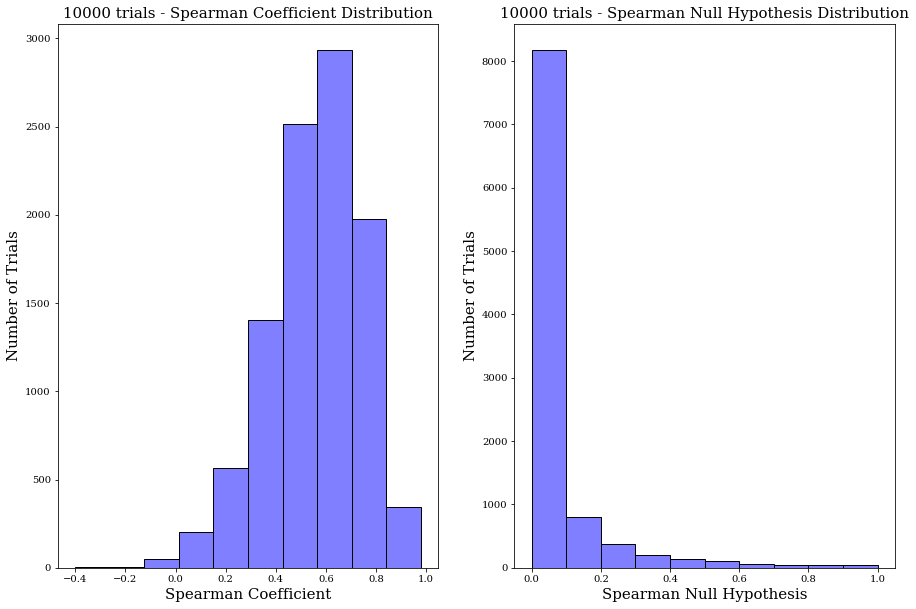

In [60]:
'''BOOTSTRAP MONTE CARLO'''
long_grbs = []
boot_trials=10000

for g in ras_data:
    if g[2] >= 2:
        long_grbs.append(g)
        
        
# ts_rank, ts_null, U_rank, U_null, per_rank, per_null, peak_rank, peak_null = [], [], [], [], [], [], [], []
rank, null_hyp, Lx_error_per = [], [], []

for i in range(boot_trials):
    Lx_data, ax_data, Lx_error, ax_error = [], [], [], []

    selected = random.randint(0,len(long_grbs),len(grb_name))
    
    for j in selected:
        Lx_data.append(long_grbs[j][5])
        Lx_error.append(long_grbs[j][6])
        ax_data.append(long_grbs[j][3])
        ax_error.append(long_grbs[j][4])
        #Lx_error_per.append(long_grbs[j][6]/long_grbs[j][5] * 100)
        
    spearman = stats.spearmanr(np.log10(Lx_data), ax_data)
    rank.append(spearman[0])
    null_hyp.append(spearman[1])
    
    
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

rank_median, null_median = np.median(rank), np.median(null_hyp)
rank_mean, null_mean = np.mean(rank), np.mean(null_hyp)
rank_std, null_std = np.std(rank), np.std(null_hyp)


ax1.set_title(f'{boot_trials} trials - Spearman Coefficient Distribution', fontsize=15)
ax1.set_ylabel('Number of Trials', fontsize=15)
ax1.set_xlabel('Spearman Coefficient', fontsize=15)
ax1.hist(rank, fc=(0, 0, 1, 0.5), label='All', edgecolor='black')

ax2.set_title(f'{boot_trials} trials - Spearman Null Hypothesis Distribution', fontsize=15)
ax2.set_ylabel('Number of Trials', fontsize=15)
ax2.set_xlabel('Spearman Null Hypothesis', fontsize=15)
ax2.hist(null_hyp,  color='blue', fc=(0, 0, 1, 0.5), label='All', edgecolor='black')

print(rank_median, rank_mean, rank_std)
print(null_median, null_mean, null_std)

# plt.figure(figsize = (12,8 ))

# plt.hist(Lx_error_per)

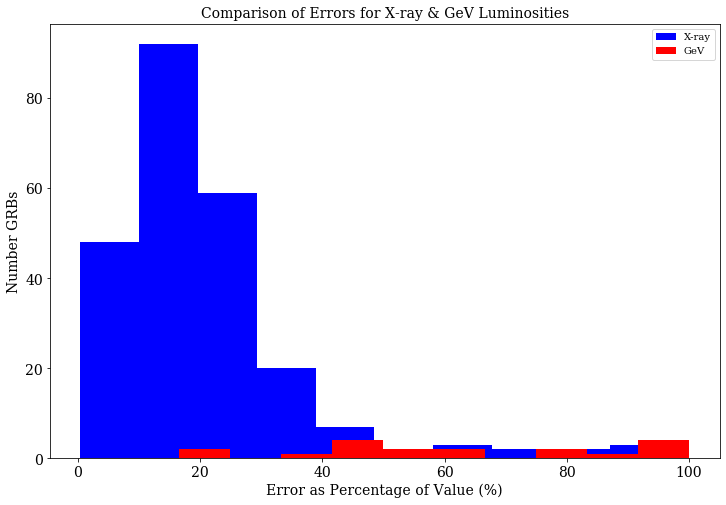

In [61]:
Lx_error_per = []
for i in long_grbs:
    Lx_error_per.append(i[6]/i[5] * 100)
    
#print(Lx_error_per)

plt.figure(figsize = (12,8 ))

plt.hist(Lx_error_per, fc=(0, 0, 1, 1), label='X-ray')#, edgecolor='black')
plt.hist(ts_Lg_error_per_minus, fc=(1, 0, 0, 1), label='GeV')
# plt.hist(U_Lg_error_per_minus, fc=(1, 0, 0, 1), label='GeV')
# plt.hist(per_Lg_error_per_minus, fc=(1, 0, 0, 1), label='GeV')
#plt.hist(peak_Lg_error_per_minus, fc=(1, 0, 0, 1), label='GeV')#, edgecolor='black')
plt.title(f'Comparison of Errors for X-ray & GeV Luminosities',fontsize = 14) 
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Error as Percentage of Value (%)', fontsize = 14)
plt.ylabel('Number GRBs', fontsize = 14)
plt.legend()
plt.show()

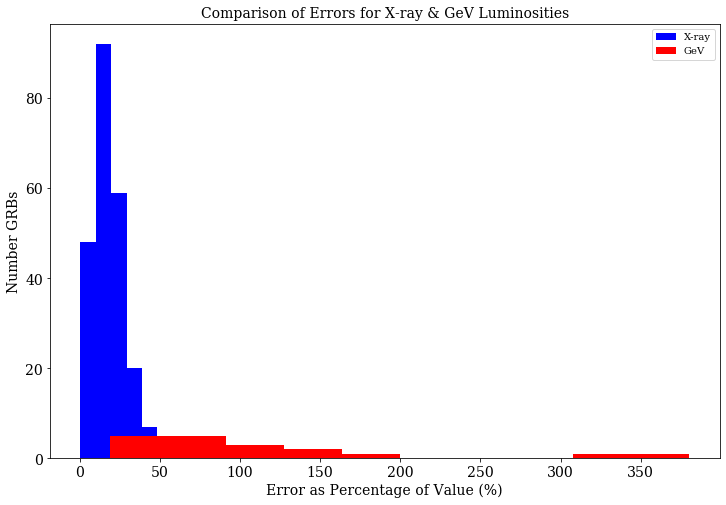

[267.0665493572617, 53.82609991635593, 34.81528183650565, 58.30468183693674, 46.456604778062854, 1.9809412667648862, 13.986552729615163, 12.523135392662242, 11.550284647260145, 6.556780757245185, 85.27658349082891, 1.1633251726021578]


In [78]:
Lx_error_per = []
for i in long_grbs:
    Lx_error_per.append(i[6]/i[5] * 100)

plt.figure(figsize = (12,8 ))

plt.hist(Lx_error_per, fc=(0, 0, 1, 1), label='X-ray')#, edgecolor='black')
# plt.hist(ts_Lg_error_per_plus, fc=(1, 0, 0, 1), label='GeV')
# plt.hist(U_Lg_error_per_plus, fc=(1, 0, 0, 1), label='GeV')
# plt.hist(per_Lg_error_per_plus, fc=(1, 0, 0, 1), label='GeV')
plt.hist(peak_Lg_error_per_plus, fc=(1, 0, 0, 1), label='GeV')#, edgecolor='black')
plt.title(f'Comparison of Errors for X-ray & GeV Luminosities',fontsize = 14) 
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Error as Percentage of Value (%)', fontsize = 14)
plt.ylabel('Number GRBs', fontsize = 14)
plt.legend()
plt.show()

print(U_Lg_error_per_plus)

In [9]:
'''Monte-Carlo Sim - Resampling'''

trials = 10000

#individual spearman rank coefficient & null hypothesis after every run
ts_src_data, ts_srp_data, fast_ts_src_data, fast_ts_srp_data = [], [] , [], []
U_src_data, U_srp_data, fast_U_src_data, fast_U_srp_data = [], [], [], []
per_src_data, per_srp_data, fast_per_src_data, fast_per_srp_data = [], [], [], []
peak_src_data, peak_srp_data, fast_peak_src_data, fast_peak_srp_data = [], [], [], []
 
for i in range(trials):
    ts_A, ts_L, fast_ts_A, fast_ts_L = [], [], [], []
    U_A, U_L, fast_U_A, fast_U_L = [], [], [], []
    per_A, per_L, fast_per_A, fast_per_L = [], [], [], []
    peak_A, peak_L, fast_peak_A, fast_peak_L = [], [], [], []
    
    
    for j in range(len(norm_alpha_ts)):
        if math.isnan(fit_lum_ts_err_plus[j]) == True or math.isinf(fit_lum_ts_err_plus[j]):
            #checking if there are any 'nan' or 'inf' as errors, if there are setting those errors
            #to random value between 20%-90% of the lum value
            fit_um_ts_err_plus[j] = uniform(0.2, 0.75) * norm_lum_ts[j]
            
        ts_a_mean = norm_alpha_ts[j]
        ts_a_std = norm_alpha_ts_err_plus[j]

        ts_a = np.random.normal(loc=ts_a_mean, scale=abs(ts_a_std))

        ts_l_mean = norm_lum_ts[j]
        ts_l_std = abs(fit_lum_ts_err_plus[j])

        ts_l = np.random.normal(loc=ts_l_mean, scale=abs(ts_l_std))

        #print(l_std)
        ts_A.append(ts_a)
        ts_L.append(np.log10(abs(ts_l)))
        
        if ts_a < -1.2:
            fast_ts_A.append(ts_a)
            fast_ts_L.append(np.log10(abs(ts_l)))
        
    for k in range(len(norm_alpha_per)):
        if math.isnan(lum_ts_per_err_plus[k]) == True or math.isinf(lum_ts_per_err_plus[k]):
            #checking if there are any 'nan' or 'inf' as errors, if there are setting those errors
            #to random value between 20%-90% of the lum value
            lum_ts_per_err_plus[k] = uniform(0.2, 0.75) * norm_lum_ts_per[k]
            
        per_a_mean = norm_alpha_per[k]
        per_a_std = norm_alpha_per_err_plus[k]

        per_a = np.random.normal(loc=per_a_mean, scale=abs(per_a_std))

        per_l_mean = norm_lum_ts_per[k]
        per_l_std = abs(lum_ts_per_err_plus[k])

        per_l = np.random.normal(loc=per_l_mean, scale=abs(per_l_std))

        #print(l_std)
        per_A.append(per_a)
        per_L.append(np.log10(abs(per_l)))
        
        if per_a < -1.2:
            fast_per_A.append(per_a)
            fast_per_L.append(np.log10(abs(per_l)))
        
        
        
    for h in range(len(norm_alpha_U)):
        if math.isnan(lum_ts_U_err_plus[h]) == True or math.isinf(lum_ts_U_err_plus[h]):
            #checking if there are any 'nan' or 'inf' as errors, if there are setting those errors
            #to random value between 20%-90% of the lum value
            lum_ts_U_err_plus[h] = uniform(0.2, 0.75) * norm_lum_ts_U[h]

        
        U_a_mean = norm_alpha_U[h]
        U_a_std = norm_alpha_U_err_plus[h]

        U_a = np.random.normal(loc=U_a_mean, scale=abs(U_a_std))

        U_l_mean = norm_lum_ts_U[h]
        U_l_std = abs(lum_ts_U_err_plus[h])

        U_l = np.random.normal(loc=U_l_mean, scale=abs(U_l_std))

        #print(U_l_std)
        U_A.append(U_a)
        U_L.append(np.log10(abs(U_l)))
        
        if U_a < -1.2:
            fast_U_A.append(U_a)
            fast_U_L.append(np.log10(abs(U_l)))
        
        
    for g in range(len(norm_alpha_peak)):
        if math.isnan(lum_ts_peak_err_plus[h]) == True or math.isinf(lum_ts_peak_err_plus[h]):
            #checking if there are any 'nan' or 'inf' as errors, if there are setting those errors
            #to random value between 20%-90% of the lum value
            lum_ts_peak_err_plus[h] = uniform(0.2, 0.75) * norm_lum_ts_peak[h]

        peak_a_mean = norm_alpha_peak[g]
        peak_a_std = norm_alpha_peak_err_plus[g]

        peak_a = np.random.normal(loc=peak_a_mean, scale=abs(peak_a_std))

        peak_l_mean = norm_lum_ts_peak[g]
        peak_l_std = abs(lum_ts_peak_err_plus[g])

        peak_l = np.random.normal(loc=peak_l_mean, scale=abs(peak_l_std))

        #print(peak_l_std)
        peak_A.append(peak_a)
        peak_L.append(np.log10(abs(peak_l)))
        
        if peak_a < -1.2:
            fast_peak_A.append(peak_a)
            fast_peak_L.append(np.log10(abs(peak_l)))
            
            
    #print(L)
    ts_src_data.append(stats.spearmanr(ts_A, ts_L)[0])
    ts_srp_data.append(stats.spearmanr(ts_A, ts_L)[1])
    
    fast_ts_src_data.append(stats.spearmanr(fast_ts_A, fast_ts_L)[0])
    fast_ts_srp_data.append(stats.spearmanr(fast_ts_A, fast_ts_L)[1])
    
    
    
    per_src_data.append(stats.spearmanr(per_A, per_L)[0])
    per_srp_data.append(stats.spearmanr(per_A, per_L)[1])
    
    fast_per_src_data.append(stats.spearmanr(fast_per_A, fast_per_L)[0])
    fast_per_srp_data.append(stats.spearmanr(fast_per_A, fast_per_L)[1])
    
    
    
    U_src_data.append(stats.spearmanr(U_A, U_L)[0])
    U_srp_data.append(stats.spearmanr(U_A, U_L)[1])
    
    fast_U_src_data.append(stats.spearmanr(fast_U_A, fast_U_L)[0])
    fast_U_srp_data.append(stats.spearmanr(fast_U_A, fast_U_L)[1])
    
    
    
    peak_src_data.append(stats.spearmanr(peak_A, peak_L)[0])
    peak_srp_data.append(stats.spearmanr(peak_A, peak_L)[1])
    
    fast_peak_src_data.append(stats.spearmanr(fast_peak_A, fast_peak_L)[0])
    fast_peak_srp_data.append(stats.spearmanr(fast_peak_A, fast_peak_L)[1])
        
    
for i in range(len(fast_peak_srp_data)):
    if math.isnan(np.asarray(fast_peak_srp_data[i]))==True:
        fast_peak_srp_data[i] = 0 #fast_peak_srp_data[i-1] 
        fast_peak_src_data[i] = 0 #fast_peak_src_data[i-1]
        
for i in range(len(fast_per_srp_data)):
    if math.isnan(np.asarray(fast_per_srp_data[i]))==True:
        fast_per_srp_data[i] = 0 #fast_per_srp_data[i-1] 
        fast_per_src_data[i] = 0 #fast_per_src_data[i-1]
        
for i in range(len(fast_ts_srp_data)):
    if math.isnan(np.asarray(fast_ts_srp_data[i]))==True:
        fast_ts_srp_data[i] = 0 #fast_ts_srp_data[i-1] 
        fast_ts_src_data[i] = 0 #fast_ts_src_data[i-1]
        
for i in range(len(fast_U_srp_data)):
    if math.isnan(np.asarray(fast_U_srp_data[i]))==True:
        fast_U_srp_data[i] = 0 #fast_U_srp_data[i-1] 
        fast_U_src_data[i] = 0 #fast_U_src_data[i-1]



 
        
        

        


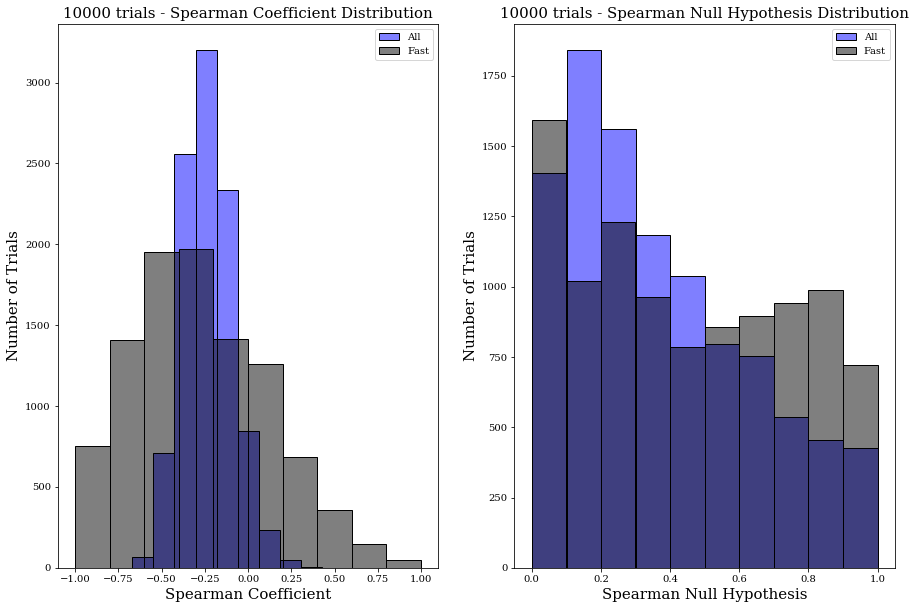

ALL Ts onward Fit found coefficient < -0.6 in 0.15% of trials for all GRBs

ALL Ts onward Fit found coefficient between -0.1 and 0.1 in 15.260000000000002% of trials for all GRBs

FAST Ts onward Fit found coefficient < -0.6 in 21.61% of trials for fast GRBs

FAST Ts onward Fit found coefficient between -0.1 and 0.1 in 15.53% of trials for fast GRBs



Text(0.5, 1.0, 'Cumulative Distribution of Spearmans Coefficients over 10000 Trials')

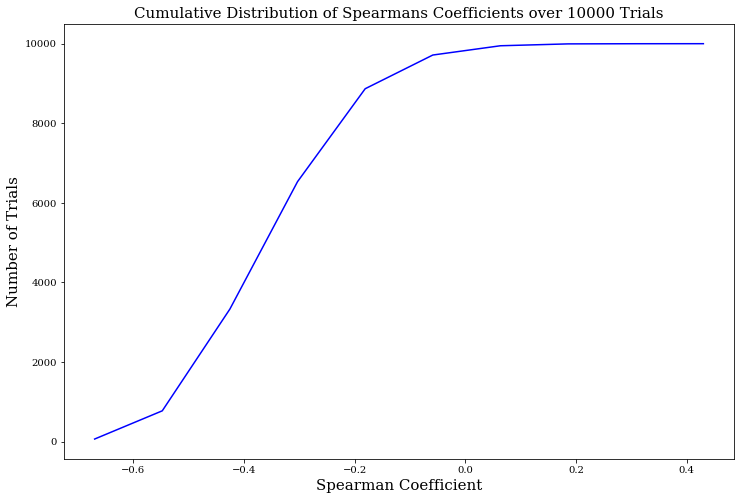

In [14]:
'''Ts Onwards Fit'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ts_src_median, ts_srp_median = np.median(ts_src_data), np.median(ts_srp_data)
ts_src_mean, ts_srp_mean = np.mean(ts_src_data), np.mean(ts_srp_data)
ts_src_std, ts_srp_std = np.std(ts_src_data), np.std(ts_srp_data)

fast_ts_src_median, fast_ts_srp_median = np.median(fast_ts_src_data), np.median(fast_ts_srp_data)
fast_ts_src_mean, fast_ts_srp_mean = np.mean(fast_ts_src_data), np.mean(fast_ts_srp_data)
fast_ts_src_std, fast_ts_srp_std = np.std(fast_ts_src_data), np.std(fast_ts_srp_data)



ax1.set_title(f'{trials} trials - Spearman Coefficient Distribution', fontsize=15)
ax1.set_ylabel('Number of Trials', fontsize=15)
ax1.set_xlabel('Spearman Coefficient', fontsize=15)
ax1.hist(ts_src_data, fc=(0, 0, 1, 0.5), label='All', edgecolor='black')
ax1.hist(fast_ts_src_data, fc=(0, 0, 0, 0.5), label='Fast', edgecolor='black')

# ax1.axvline(ts_src_median, color='red', label=f'Median = {np.around(ts_src_median,2)} ± {np.around(ts_src_std,2)}')
# ax1.axvline(ts_src_mean, color='black', label=f'Mean = {np.around(ts_src_mean,2)} ± {np.around(ts_src_std,2)}')

ax2.set_title(f'{trials} trials - Spearman Null Hypothesis Distribution', fontsize=15)
ax2.set_ylabel('Number of Trials', fontsize=15)
ax2.set_xlabel('Spearman Null Hypothesis', fontsize=15)
ax2.hist(ts_srp_data,  color='blue', fc=(0, 0, 1, 0.5), label='All', edgecolor='black')
ax2.hist(fast_ts_srp_data, color='red', fc=(0, 0, 0, 0.5), label='Fast', edgecolor='black')
# ax2.axvline(ts_srp_median, color='red', label=f'Median = {np.around(ts_srp_median,2)} ± {np.around(ts_srp_std, 2)}')
# ax2.axvline(ts_srp_mean, color='black', label=f'Mean = {np.around(ts_srp_mean,2)} ± {np.around(ts_srp_std, 2)}')

ax1.legend()
ax2.legend()
plt.show()

ts_strong_src, ts_weak_src = [], []
fast_ts_strong_src, fast_ts_weak_src = [], []
ts_strong_srp, ts_weak_srp = [], []
fast_ts_strong_src, fast_ts_weak_srp = [], []

for i in range(len(ts_src_data)):
    if ts_src_data[i] < -0.6:
        ts_strong_src.append(ts_src_data[i])
        ts_strong_srp.append(ts_srp_data[i])
    if ts_src_data[i] > -0.1 and ts_src_data[i] < 0.1:
        ts_weak_src.append(ts_src_data[i])
        ts_weak_srp.append(ts_srp_data[i])
        
ts_strong_src_frac = len(ts_strong_src)/trials *100
ts_weak_src_frac = len(ts_weak_src)/trials *100

print(f'ALL Ts onward Fit found coefficient < -0.6 in {ts_strong_src_frac}% of trials for all GRBs')
print()
print(f'ALL Ts onward Fit found coefficient between -0.1 and 0.1 in {ts_weak_src_frac}% of trials for all GRBs')
print()

for i in fast_ts_src_data:
    if i < -0.6:
        fast_ts_strong_src.append(i)
    if i > -0.1 and i < 0.1:
        fast_ts_weak_src.append(i)
        
fast_ts_strong_src_frac = len(fast_ts_strong_src)/trials *100
fast_ts_weak_src_frac = len(fast_ts_weak_src)/trials *100

print(f'FAST Ts onward Fit found coefficient < -0.6 in {fast_ts_strong_src_frac}% of trials for fast GRBs')
print()
print(f'FAST Ts onward Fit found coefficient between -0.1 and 0.1 in {fast_ts_weak_src_frac}% of trials for fast GRBs')
print()


for k in range(len(ts_src_data)):
    if ts_src_data[k] == np.min(ts_src_data):
        ts_src_min = ts_src_data[k]
        ts_srp_min = ts_srp_data[k]
#         print(ts_src_min)
#         print(ts_srp_min)
#print(np.min(ts_src_data))


ts_src_values, ts_src_base = np.histogram(ts_src_data)

ts_src_cumulative = np.cumsum(ts_src_values)

# plt.figure(figsize = (12,8 ))
# plt.plot(ts_src_base[:-1], ts_src_cumulative, c='blue')
# plt.xlabel('Spearman Coefficient', fontsize=15)
# plt.ylabel('Number of Trials', fontsize=15)
# plt.title(f'Cumulative Distribution of Spearmans Coefficients over {trials} Trials', fontsize=15)

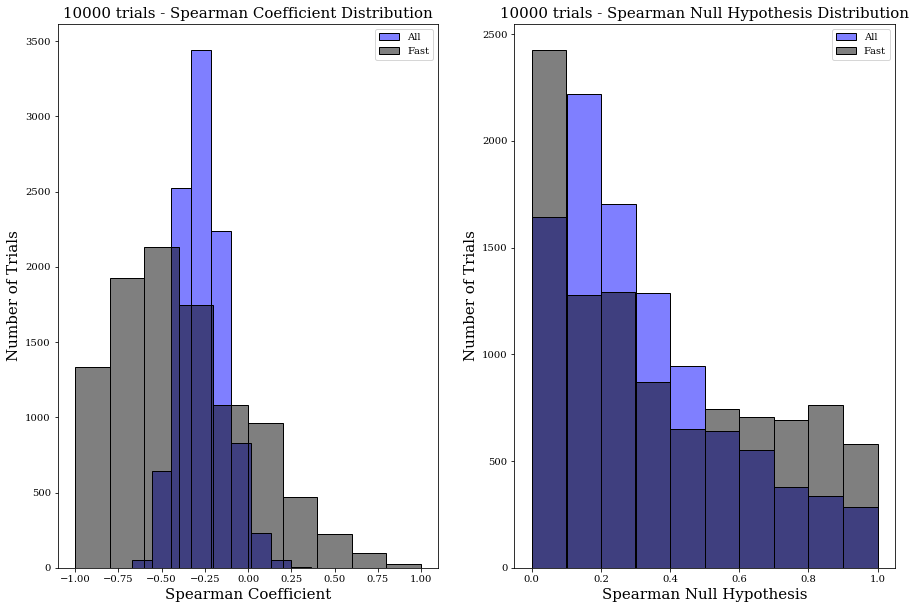

ALL ±30% Fit found coefficient < -0.6 in 0.19% of trials for all GRBs

ALL ±30% Fit found coefficient between -0.1 and 0.1 in 10.65% of trials for all GRBs

FAST ±30% Fit found coefficient < -0.6 in 32.57% of trials for fast GRBs

FAST ±30% Fit found coefficient between -0.1 and 0.1 in 11.940000000000001% of trials for fast GRBs



Text(0.5, 1.0, 'Cumulative Distribution of Spearmans Coefficients over 10000 Trials')

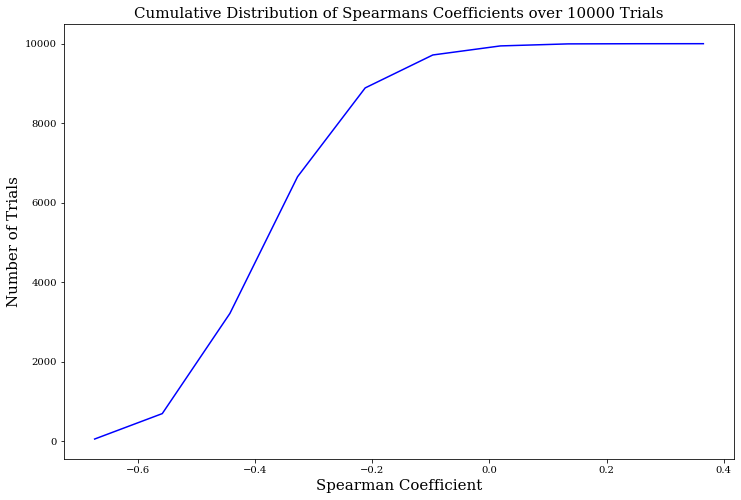

In [16]:
'''±30% Fit'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

per_src_median, per_srp_median = np.median(per_src_data), np.median(per_srp_data)
per_src_mean, per_srp_mean = np.mean(per_src_data), np.mean(per_srp_data)
per_src_std, per_srp_std = np.std(per_src_data), np.std(per_srp_data)

fast_per_src_median, fast_per_srp_median = np.median(fast_per_src_data), np.median(fast_per_srp_data)
fast_per_src_mean, fast_per_srp_mean = np.mean(fast_per_src_data), np.mean(fast_per_srp_data)
fast_per_src_std, fast_per_srp_std = np.std(fast_per_src_data), np.std(fast_per_srp_data)

ax1.set_title(f'{trials} trials - Spearman Coefficient Distribution', fontsize=15)
ax1.set_ylabel('Number of Trials', fontsize=15)
ax1.set_xlabel('Spearman Coefficient', fontsize=15)
ax1.hist(per_src_data, fc=(0, 0, 1, 0.5), label='All', edgecolor='black')
ax1.hist(fast_per_src_data, fc=(0, 0, 0, 0.5), label='Fast', edgecolor='black')
# ax1.axvline(per_src_median, color='red', label=f'Median = {np.around(per_src_median,2)} ± {np.around(per_src_std,2)}')
# ax1.axvline(per_src_mean, color='black', label=f'Mean = {np.around(per_src_mean,2)} ± {np.around(per_src_std,2)}')

ax2.set_title(f'{trials} trials - Spearman Null Hypothesis Distribution', fontsize=15)
ax2.set_ylabel('Number of Trials', fontsize=15)
ax2.set_xlabel('Spearman Null Hypothesis', fontsize=15)
ax2.hist(per_srp_data,  color='blue', fc=(0, 0, 1, 0.5), label='All', edgecolor='black')
ax2.hist(fast_per_srp_data, color='red', fc=(0, 0, 0, 0.5), label='Fast', edgecolor='black')
# ax2.axvline(per_srp_median, color='red', label=f'Median = {np.around(per_srp_median,2)} ± {np.around(per_srp_std, 2)}')
# ax2.axvline(per_srp_mean, color='black', label=f'Mean = {np.around(per_srp_mean,2)} ± {np.around(per_srp_std, 2)}')

ax1.legend()
ax2.legend()
plt.show()

per_strong_src, per_weak_src = [], []
fast_per_strong_src, fast_per_weak_src = [], []
per_strong_srp, per_weak_srp = [], []
fast_per_strong_srp, fast_per_weak_srp = [], []

for i in range(len(per_src_data)):
    if per_src_data[i][2] < -0.6:
        per_strong_src.append(per_src_data[i])
        per_strong_srp.append(per_srp_data[i])
    if per_src_data[i] > -0.1 and per_src_data[i] < 0.1:
        per_weak_src.append(per_src_data[i])
        per_weak_srp.append(per_srp_data[i])
        
per_strong_src_frac = len(per_strong_src)/trials *100
per_weak_src_frac = len(per_weak_src)/trials *100

print(f'ALL ±30% Fit found coefficient < -0.6 in {per_strong_src_frac}% of trials for all GRBs')
print()
print(f'ALL ±30% Fit found coefficient between -0.1 and 0.1 in {per_weak_src_frac}% of trials for all GRBs')
print()

for i in fast_per_src_data:
    if i < -0.6:
        fast_per_strong_src.append(i)
    if i > -0.1 and i < 0.1:
        fast_per_weak_src.append(i)
        
fast_per_strong_src_frac = len(fast_per_strong_src)/trials *100
fast_per_weak_src_frac = len(fast_per_weak_src)/trials *100

print(f'FAST ±30% Fit found coefficient < -0.6 in {fast_per_strong_src_frac}% of trials for fast GRBs')
print()
print(f'FAST ±30% Fit found coefficient between -0.1 and 0.1 in {fast_per_weak_src_frac}% of trials for fast GRBs')
print()

for k in range(len(per_src_data)):
    if per_src_data[k] == np.min(per_src_data):
        per_src_min = per_src_data[k]
        per_srp_min = per_srp_data[k]
#         print(per_src_min)
#         print(per_srp_min)


per_src_values, per_src_base = np.histogram(per_src_data)

per_src_cumulative = np.cumsum(per_src_values)

# plt.figure(figsize = (12,8 ))
# plt.plot(per_src_base[:-1], per_src_cumulative, c='blue')
# plt.xlabel('Spearman Coefficient', fontsize=15)
# plt.ylabel('Number of Trials', fontsize=15)
# plt.title(f'Cumulative Distribution of Spearmans Coefficients over {trials} Trials', fontsize=15)

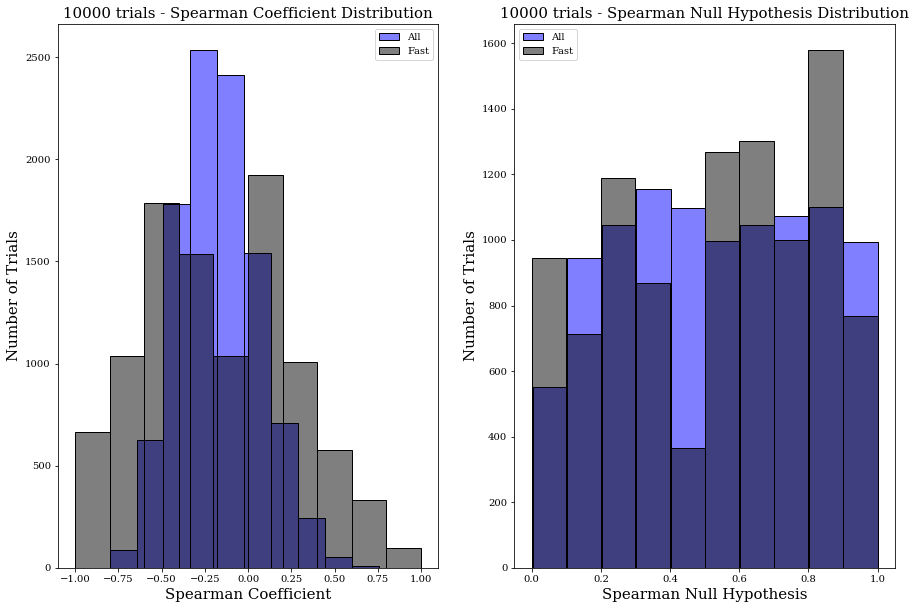

ALL 5-40s Fit found coefficient < -0.6 in 1.66% of trials for all GRBs

ALL 5-40s Fit found coefficient between -0.1 and 0.1 in 23.22% of trials for all GRBs

FAST 5-40s Fit found coefficient < -0.6 in 17.01% of trials for fast GRBs

FAST 5-40s Fit found coefficient between -0.1 and 0.1 in 19.72% of trials for fast GRBs



Text(0.5, 1.0, 'Cumulative Distribution of Spearmans Coefficients over 10000 Trials')

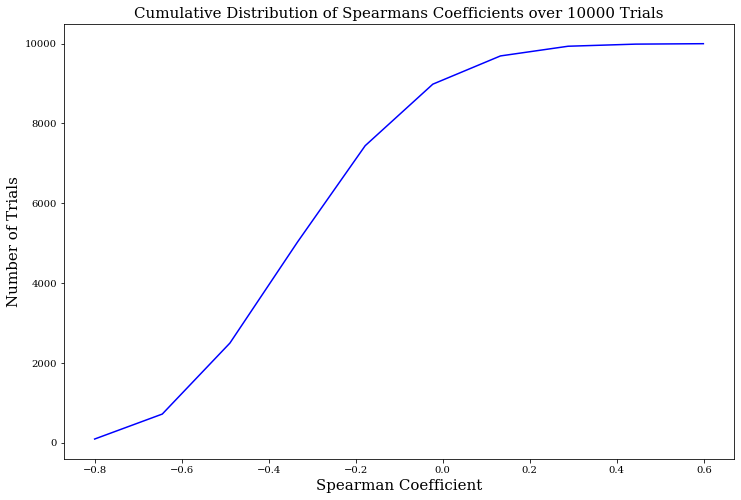

In [17]:
'''5-40s Fit'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

U_src_median, U_srp_median = np.median(U_src_data), np.median(U_srp_data)
U_src_mean, U_srp_mean = np.mean(U_src_data), np.mean(U_srp_data)
U_src_std, U_srp_std = np.std(U_src_data), np.std(U_srp_data)

fast_U_src_median, fast_U_srp_median = np.median(fast_U_src_data), np.median(fast_U_srp_data)
fast_U_src_mean, fast_U_srp_mean = np.mean(fast_U_src_data), np.mean(fast_U_srp_data)
fast_U_src_std, fast_U_srp_std = np.std(fast_U_src_data), np.std(fast_U_srp_data)

ax1.set_title(f'{trials} trials - Spearman Coefficient Distribution', fontsize=15)
ax1.set_ylabel('Number of Trials', fontsize=15)
ax1.set_xlabel('Spearman Coefficient', fontsize=15)
ax1.hist(U_src_data, fc=(0, 0, 1, 0.5), label='All', edgecolor='black')
ax1.hist(fast_U_src_data, fc=(0, 0, 0, 0.5), label='Fast', edgecolor='black')
# ax1.axvline(U_src_median, color='red', label=f'Median = {np.around(U_src_median,2)} ± {np.around(U_src_std,2)}')
# ax1.axvline(U_src_mean, color='black', label=f'Mean = {np.around(U_src_mean,2)} ± {np.around(U_src_std,2)}')

ax2.set_title(f'{trials} trials - Spearman Null Hypothesis Distribution', fontsize=15)
ax2.set_ylabel('Number of Trials', fontsize=15)
ax2.set_xlabel('Spearman Null Hypothesis', fontsize=15)
ax2.hist(U_srp_data,  color='blue', fc=(0, 0, 1, 0.5), label='All', edgecolor='black')
ax2.hist(fast_U_srp_data, color='red', fc=(0, 0, 0, 0.5), label='Fast', edgecolor='black')
# ax2.axvline(U_srp_median, color='red', label=f'Median = {np.around(U_srp_median,2)} ± {np.around(U_srp_std, 2)}')
# ax2.axvline(U_srp_mean, color='black', label=f'Mean = {np.around(U_srp_mean,2)} ± {np.around(U_srp_std, 2)}')

ax1.legend()
ax2.legend()
plt.show()

U_strong_src, U_weak_src = [], []
fast_U_strong_src, fast_U_weak_src = [], []
U_strong_srp, U_weak_srp = [], []
fast_U_strong_srp, fast_U_weak_srp = [], []

for i in range(len(U_src_data)):
    if U_src_data[i] < -0.6:
        U_strong_src.append(U_src_data[i])
        U_strong_srp.append(U_srp_data[i])
    if U_src_data[i] > -0.1 and U_src_data[i] < 0.1:
        U_weak_src.append(U_src_data[i])
        U_weak_srp.append(U_srp_data[i])
        
U_strong_src_frac = len(U_strong_src)/trials *100
U_weak_src_frac = len(U_weak_src)/trials *100

print(f'ALL 5-40s Fit found coefficient < -0.6 in {U_strong_src_frac}% of trials for all GRBs')
print()
print(f'ALL 5-40s Fit found coefficient between -0.1 and 0.1 in {U_weak_src_frac}% of trials for all GRBs')
print()

for i in fast_U_src_data:
    if i < -0.6:
        fast_U_strong_src.append(i)
    if i > -0.1 and i < 0.1:
        fast_U_weak_src.append(i)
        
fast_U_strong_src_frac = len(fast_U_strong_src)/trials *100
fast_U_weak_src_frac = len(fast_U_weak_src)/trials *100

print(f'FAST 5-40s Fit found coefficient < -0.6 in {fast_U_strong_src_frac}% of trials for fast GRBs')
print()
print(f'FAST 5-40s Fit found coefficient between -0.1 and 0.1 in {fast_U_weak_src_frac}% of trials for fast GRBs')
print()


for k in range(len(U_src_data)):
    if U_src_data[k] == np.min(U_src_data):
        U_src_min = U_src_data[k]
        U_srp_min = U_srp_data[k]
#         print(U_src_min)
#         print(U_srp_min)


U_src_values, U_src_base = np.histogram(U_src_data)

U_src_cumulative = np.cumsum(U_src_values)

# plt.figure(figsize = (12,8 ))
# plt.plot(U_src_base[:-1], U_src_cumulative, c='blue')
# plt.xlabel('Spearman Coefficient', fontsize=15)
# plt.ylabel('Number of Trials', fontsize=15)
# plt.title(f'Cumulative Distribution of Spearmans Coefficients over {trials} Trials', fontsize=15)

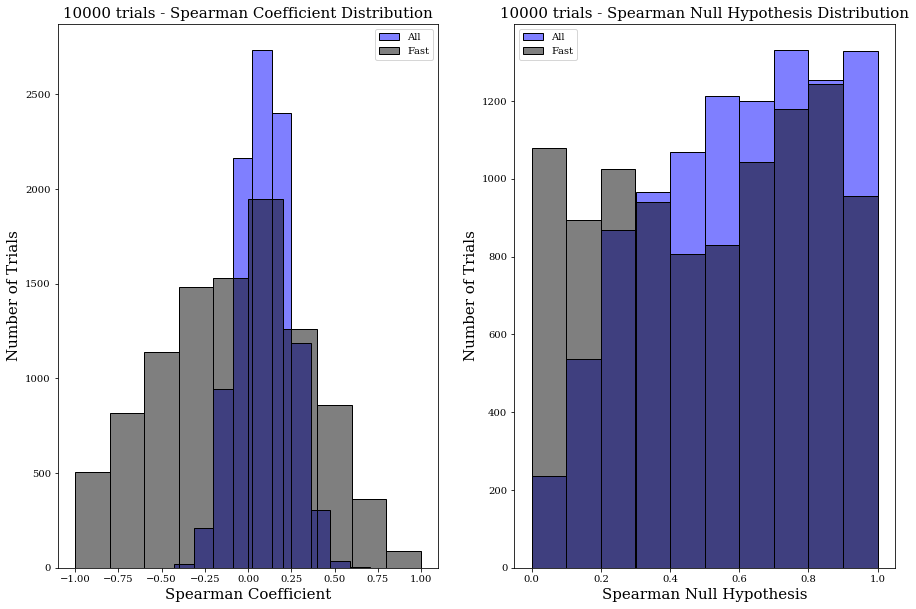

ALL Peak onward Fit found coefficient < -0.6 in 0.0% of trials for all GRBs

ALL Peak onward Fit found coefficient between -0.1 and 0.1 in 40.99% of trials for all GRBs

FAST Peak onward Fit found coefficient < -0.6 in 13.26% of trials for fast GRBs

FAST Peak onward Fit found coefficient between -0.1 and 0.1 in 19.93% of trials for fast GRBs



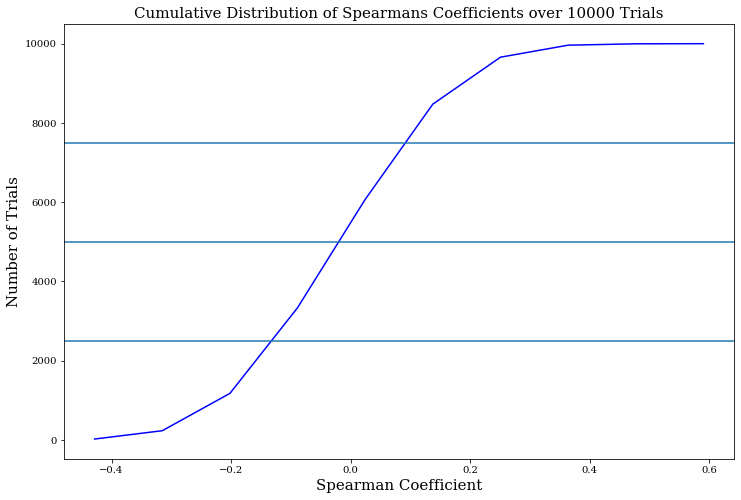

In [19]:
'''Peak Onwards Fit'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

peak_src_median, peak_srp_median = np.median(peak_src_data), np.median(peak_srp_data)
peak_src_mean, peak_srp_mean = np.mean(peak_src_data), np.mean(peak_srp_data)
peak_src_std, peak_srp_std = np.std(peak_src_data), np.std(peak_srp_data)

fast_peak_src_median, fast_peak_srp_median = np.median(fast_peak_src_data), np.median(fast_peak_srp_data)
fast_peak_src_mean, fast_peak_srp_mean = np.mean(fast_peak_src_data), np.mean(fast_peak_srp_data)
fast_peak_src_std, fast_peak_srp_std = np.std(fast_peak_src_data), np.std(fast_peak_srp_data)



ax1.set_title(f'{trials} trials - Spearman Coefficient Distribution', fontsize=15)
ax1.set_ylabel('Number of Trials', fontsize=15)
ax1.set_xlabel('Spearman Coefficient', fontsize=15)
ax1.hist(peak_src_data, fc=(0, 0, 1, 0.5), label='All', edgecolor='black')
ax1.hist(fast_peak_src_data, fc=(0, 0, 0, 0.5), label='Fast', edgecolor='black')
# ax1.axvline(peak_src_median, color='red', label=f'Median = {np.around(peak_src_median,2)} ± {np.around(peak_src_std,2)}')
# ax1.axvline(peak_src_mean, color='black', label=f'Mean = {np.around(peak_src_mean,2)} ± {np.around(peak_src_std,2)}')

ax2.set_title(f'{trials} trials - Spearman Null Hypothesis Distribution', fontsize=15)
ax2.set_ylabel('Number of Trials', fontsize=15)
ax2.set_xlabel('Spearman Null Hypothesis', fontsize=15)
ax2.hist(peak_srp_data,  color='blue', fc=(0, 0, 1, 0.5), label='All', edgecolor='black')
ax2.hist(fast_peak_srp_data, color='red', fc=(0, 0, 0, 0.5), label='Fast', edgecolor='black')
# ax2.axvline(peak_srp_median, color='red', label=f'Median = {np.around(peak_srp_median,2)} ± {np.around(peak_srp_std, 2)}')
# ax2.axvline(peak_srp_mean, color='black', label=f'Mean = {np.around(peak_srp_mean,2)} ± {np.around(peak_srp_std, 2)}')


ax1.legend()
ax2.legend()
plt.show()

peak_strong_src, peak_weak_src = [], []
fast_peak_strong_src, fast_peak_weak_src = [], []
peak_strong_srp, peak_weak_srp = [], []
fast_peak_strong_srp, fast_peak_weak_srp = [], []

for i in range(len(peak_src_data)):
    if peak_src_data[i] < -0.6:
        peak_strong_src.append(peak_src_data[i])
        peak_strong_srp.append(peak_srp_data[i])
    if peak_src_data[i] > -0.1 and peak_src_data[i] < 0.1:
        peak_weak_src.append(peak_src_data[i])
        peak_weak_srp.append(peak_srp_data[i])

peak_strong_src_frac = len(peak_strong_src)/trials *100
peak_weak_src_frac = len(peak_weak_src)/trials *100

print(f'ALL Peak onward Fit found coefficient < -0.6 in {peak_strong_src_frac}% of trials for all GRBs')
print()
print(f'ALL Peak onward Fit found coefficient between -0.1 and 0.1 in {peak_weak_src_frac}% of trials for all GRBs')
print()

for i in fast_peak_src_data:
    if i < -0.6:
        fast_peak_strong_src.append(i)
    if i > -0.1 and i < 0.1:
        fast_peak_weak_src.append(i)
        
fast_peak_strong_src_frac = len(fast_peak_strong_src)/trials *100
fast_peak_weak_src_frac = len(fast_peak_weak_src)/trials *100

print(f'FAST Peak onward Fit found coefficient < -0.6 in {fast_peak_strong_src_frac}% of trials for fast GRBs')
print()
print(f'FAST Peak onward Fit found coefficient between -0.1 and 0.1 in {fast_peak_weak_src_frac}% of trials for fast GRBs')
print()

for k in range(len(peak_src_data)):
    if peak_src_data[k] == np.min(peak_src_data):
        peak_src_min = peak_src_data[k]
        peak_srp_min = peak_srp_data[k]
#         print(peak_src_min)
#         print(peak_srp_min)


peak_src_values, peak_src_base = np.histogram(peak_src_data)

peak_src_cumulative = np.cumsum(peak_src_values)

# plt.figure(figsize = (12,8 ))
# plt.plot(peak_src_base[:-1], peak_src_cumulative, c='blue')
# plt.xlabel('Spearman Coefficient', fontsize=15)
# plt.ylabel('Number of Trials', fontsize=15)
# plt.title(f'Cumulative Distribution of Spearmans Coefficients over {trials} Trials', fontsize=15)
# plt.axhline(0.25*trials)
# plt.axhline(0.5*trials)
# plt.axhline(0.75*trials)

In [34]:
# all_sim_frac = []
# all_sim_frac.append(['5-40s Fit a(±U)', U_strong_src_frac, U_weak_src_frac, fast_U_strong_src_frac, fast_U_weak_src_frac])

# all_sim_frac.append(['±30% Fit', per_strong_src_frac, per_weak_src_frac, fast_per_strong_src_frac, fast_per_weak_src_frac])

# all_sim_frac.append(['Peak onward Fit', peak_strong_src_frac, peak_weak_src_frac, fast_peak_strong_src_frac, fast_peak_weak_src_frac])

# all_sim_frac.append(['Ts onward Fit', ts_strong_src_frac, ts_weak_src_frac, fast_ts_strong_src_frac, fast_ts_weak_src_frac])

In [36]:
# np.savetxt('Monte-Carlo_LvA_fractions_1e4.txt', all_sim_frac, delimiter=',', fmt='%s')
# print(all_sim_frac[1])

['±30% Fit', 0.13999999999999999, 11.129999999999999, 31.680000000000003, 12.16]


In [19]:
# all_sim = []
# all_sim.append(['5-40s Fit (±U)', U_src_median, U_src_mean, U_src_std,U_srp_median, U_srp_mean, U_srp_std ])
# all_sim.append(['±30% Fit', per_src_median, per_src_mean, per_src_std,per_srp_median, per_srp_mean, per_srp_std ])
# all_sim.append(['Peak Onward Fit', peak_src_median, peak_src_mean, peak_src_std,peak_srp_median, peak_srp_mean, peak_srp_std ])
# all_sim.append(['Ts Onward', ts_src_median, ts_src_mean, ts_src_std,ts_srp_median, ts_srp_mean, ts_srp_std ])

In [20]:
# fast_sim = []
# fast_sim.append(['5-40s Fit (±U)', fast_U_src_median, fast_U_src_mean, fast_U_src_std,fast_U_srp_median, fast_U_srp_mean, fast_U_srp_std ])
# fast_sim.append(['±30% Fit', fast_per_src_median, fast_per_src_mean, fast_per_src_std,fast_per_srp_median, fast_per_srp_mean, fast_per_srp_std ])
# fast_sim.append(['Peak Onward Fit', fast_peak_src_median, fast_peak_src_mean, fast_peak_src_std,fast_peak_srp_median, fast_peak_srp_mean, fast_peak_srp_std ])
# fast_sim.append(['Ts Onward', fast_ts_src_median, fast_ts_src_mean, fast_ts_src_std,fast_ts_srp_median, fast_ts_srp_mean, fast_ts_srp_std ])

In [22]:
# np.savetxt('Monte-Carlo_LvA_All_1e5.txt', all_sim, delimiter=',', fmt='%s')
# np.savetxt('Monte-Carlo_LvA_fast_1e5.txt', fast_sim, delimiter=',', fmt='%s')

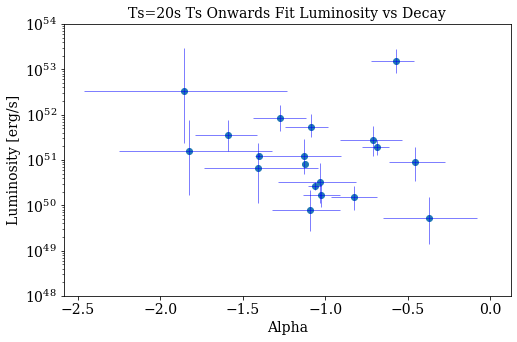

 Ts onward Fit SpearmanrResult(correlation=-0.30350877192982456, pvalue=0.20651570867339997)
19


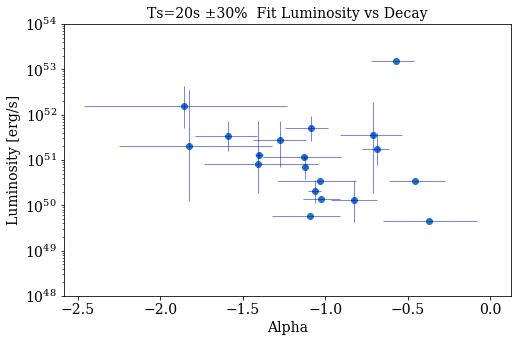

 ±30% Fit SpearmanrResult(correlation=-0.3385964912280702, pvalue=0.15618974502366012)
 ±30% Fit 0.15618974502366012
19


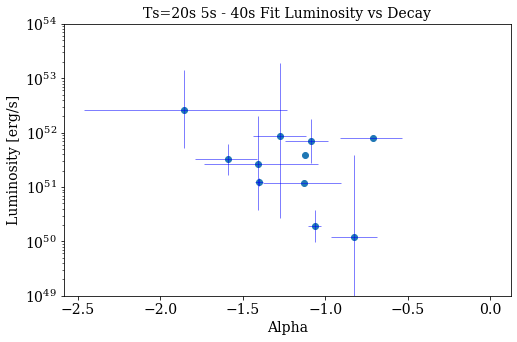

 5s - 40s Fit SpearmanrResult(correlation=-0.3090909090909091, pvalue=0.3550284397015071)
11


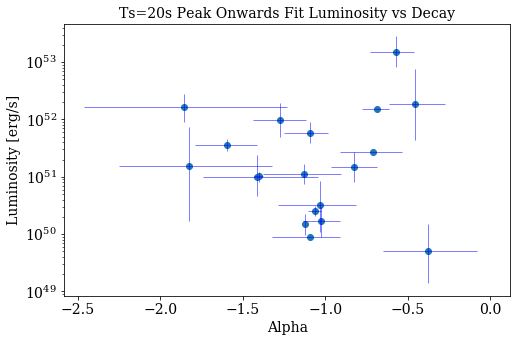

 Peak Fit SpearmanrResult(correlation=0.0035087719298245615, pvalue=0.9886257366379809)
19


In [60]:
'''Fast GRBs'''
alpha_ts_fast, alpha_ts_err_plus, alpha_ts_err_minus = [], [], []
lum_ts_fast, lum_ts_err_plus, lum_ts_err_minus = [], [], []

alpha_tp_fast, alpha_tp_err_plus, alpha_tp_err_minus = [], [], []
lum_tp_fast, lum_tp_err_plus, lum_tp_err_minus = [], [], []

alpha_U_fast, alpha_U_err_plus, alpha_U_err_minus = [], [], []
lum_U_fast, lum_U_err_plus, lum_U_err_minus = [], [], []

alpha_per_fast, alpha_per_err_plus, alpha_per_err_minus = [], [], []
lum_per_fast, lum_per_err_plus, lum_per_err_minus = [], [], []

alpha_peak_fast, alpha_peak_err_plus, alpha_peak_err_minus = [], [], []
lum_peak_fast, lum_peak_err_plus, lum_peak_err_minus = [], [], []

threshold = 0

#print(norm_alpha_ts)

for i in range(len(norm_alpha_ts)):
    if norm_alpha_ts[i] < threshold:
        alpha_ts_fast.append(norm_alpha_ts[i])
        alpha_ts_err_plus.append(norm_alpha_ts_err_plus[i])
        alpha_ts_err_minus.append(norm_alpha_ts_err_minus[i])
        lum_ts_fast.append(norm_lum_ts[i])
        lum_ts_err_plus.append(fit_lum_ts_err_plus[i])
        lum_ts_err_minus.append(fit_lum_ts_err_minus[i])

        

plt.figure(figsize = (8,5 ))
plt.scatter(alpha_ts_fast, lum_ts_fast, label=f'Threshold={threshold}')

plt.ylim(1e48, 1e54)
#plt.axvline(-1.2)
plt.errorbar(alpha_ts_fast, lum_ts_fast, yerr=[lum_ts_err_plus, lum_ts_err_minus]
             , xerr=[alpha_ts_err_plus,alpha_ts_err_minus], linestyle='',elinewidth=0.5, color='blue')

plt.xlabel('Alpha',fontsize = 14) 
plt.ylabel('Luminosity [erg/s]',fontsize = 14) 
plt.yscale('log')
plt.title(f'Ts={Ts}s Ts Onwards Fit Luminosity vs Decay',fontsize = 14) 
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.legend()
plt.show()

print(f' Ts onward Fit {stats.spearmanr(alpha_ts_fast, np.log10(lum_ts_fast))}')
print(len(alpha_ts_fast))




# for i in range(len(norm_alpha_tp)):
#     if norm_alpha_tp[i] < threshold:
#         alpha_tp_fast.append(norm_alpha_tp[i])
#         alpha_tp_err_plus.append(norm_alpha_tp_err_plus[i])
#         alpha_tp_err_minus.append(norm_alpha_tp_err_minus[i])
#         lum_tp_fast.append(norm_lum_tp[i])
        
#         lum_tp_err_plus.append(fit_lum_tp_err_plus[i])
#         lum_tp_err_minus.append(fit_lum_tp_err_minus[i])
        
#         if lum_tp_err_minus[i] < 1e30 :
#             #print('nan found')
#             lum_tp_err_minus[i] = fit_lum_tp_err_plus[i]
#             print(lum_tp_err_minus[i])
        


        

# plt.figure(figsize = (8,5 ))
# plt.scatter(alpha_tp_fast, lum_tp_fast, label=f'Threshold={threshold}')

# plt.ylim(1e48, 1e54)
    
# plt.errorbar(alpha_tp_fast, lum_tp_fast, yerr=[lum_tp_err_plus, lum_tp_err_minus]
#              , xerr=[alpha_tp_err_plus,alpha_tp_err_minus], linestyle='',elinewidth=0.5, color='blue')

# plt.xlabel('Alpha',fontsize = 14) 
# plt.ylabel('Luminosity [erg/s]',fontsize = 14) 
# plt.yscale('log')
# plt.title(f'Ts={Ts}s Twp-Point Fit Luminosity vs Decay',fontsize = 14) 
# plt.tick_params(axis='both', which='major', labelsize=14)
# #plt.legend()
# plt.show()

# print(f' Two-Point Fit {stats.spearmanr(alpha_tp_fast, np.log10(lum_tp_fast))}')
# print(len(alpha_tp_fast))




for i in range(len(norm_alpha_per)):
    if norm_alpha_per[i] < threshold:
        alpha_per_fast.append(norm_alpha_per[i])
        lum_per_fast.append(norm_lum_ts_per[i])
        alpha_per_err_plus.append(norm_alpha_per_err_plus[i])
        alpha_per_err_minus.append(norm_alpha_per_err_minus[i])
        lum_per_err_plus.append(lum_ts_per_err_plus[i])
        lum_per_err_minus.append(lum_ts_per_err_minus[i])

plt.figure(figsize = (8,5 ))
plt.scatter(alpha_per_fast, lum_per_fast, label=f'Threshold={threshold}')

plt.ylim(1e48, 1e54)
#plt.axvline(-1.2)
plt.errorbar(alpha_per_fast, lum_per_fast, yerr=[lum_per_err_plus, lum_per_err_minus]
             , xerr=[alpha_per_err_plus,alpha_per_err_minus], linestyle='',elinewidth=0.5, color='blue')

plt.xlabel('Alpha',fontsize = 14) 
plt.ylabel('Luminosity [erg/s]',fontsize = 14) 
plt.yscale('log')
plt.title(f'Ts={Ts}s ±30%  Fit Luminosity vs Decay',fontsize = 14) 
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.legend()
plt.show()

print(f' ±30% Fit {stats.spearmanr(alpha_per_fast, np.log10(lum_per_fast))}')
print(f' ±30% Fit {stats.spearmanr(alpha_per_fast, np.log10(lum_per_fast))[1]}')
print(len(alpha_per_fast))



for i in range(len(norm_alpha_U)):
    if norm_alpha_U[i] < threshold:
        alpha_U_fast.append(norm_alpha_U[i])
        lum_U_fast.append(norm_lum_ts_U[i])
        alpha_U_err_plus.append(norm_alpha_U_err_plus[i])
        alpha_U_err_minus.append(norm_alpha_U_err_minus[i])
        lum_U_err_plus.append(lum_ts_U_err_plus[i])
        lum_U_err_minus.append(lum_ts_U_err_minus[i])

plt.figure(figsize = (8,5 ))
plt.scatter(alpha_U_fast, lum_U_fast, label=f'Threshold={threshold}')

plt.ylim(1e49, 1e54)
    
plt.errorbar(alpha_U_fast, lum_U_fast, yerr=[lum_U_err_plus, lum_U_err_minus]
             , xerr=[alpha_U_err_plus,alpha_U_err_minus], linestyle='',elinewidth=0.5, color='blue')

plt.xlabel('Alpha',fontsize = 14) 
plt.ylabel('Luminosity [erg/s]',fontsize = 14) 
plt.yscale('log')
plt.title(f'Ts={Ts}s {lower_bound}s - {upper_bound}s Fit Luminosity vs Decay',fontsize = 14) 
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.legend()
plt.show()

print(f' {lower_bound}s - {upper_bound}s Fit {stats.spearmanr(alpha_U_fast, np.log10(lum_U_fast))}')
print(len(alpha_U_fast))




for i in range(len(norm_alpha_peak)):
    if norm_alpha_peak[i] < threshold:
        alpha_peak_fast.append(norm_alpha_peak[i])
        lum_peak_fast.append(norm_lum_ts_peak[i])
        alpha_peak_err_plus.append(norm_alpha_peak_err_plus[i])
        alpha_peak_err_minus.append(norm_alpha_peak_err_minus[i])
        lum_peak_err_plus.append(lum_ts_peak_err_plus[i])
        lum_peak_err_minus.append(lum_ts_peak_err_minus[i])
        
        #print([norm_alpha_peak_err_plus[i],norm_alpha_peak_err_minus[i]])

plt.figure(figsize = (8,5 ))
plt.scatter(alpha_peak_fast, lum_peak_fast, label=f'Threshold={threshold}')
#plt.axvline(-1.2)

    
plt.errorbar(alpha_peak_fast, lum_peak_fast, yerr=[lum_peak_err_plus, lum_peak_err_minus]
             , xerr=[alpha_peak_err_plus,alpha_peak_err_minus], linestyle='',elinewidth=0.5, color='blue')

plt.xlabel('Alpha',fontsize = 14) 
plt.ylabel('Luminosity [erg/s]',fontsize = 14) 
plt.yscale('log')
plt.title(f'Ts={Ts}s Peak Onwards Fit Luminosity vs Decay',fontsize = 14) 
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.legend()
plt.show()

#print(f' Peak Fit {stats.spearmanr(alpha_peak_fast, np.log10(lum_peak_fast))[1]}')
print(f' Peak Fit {stats.spearmanr(alpha_peak_fast, np.log10(lum_peak_fast))}')
print(len(alpha_peak_fast))



        

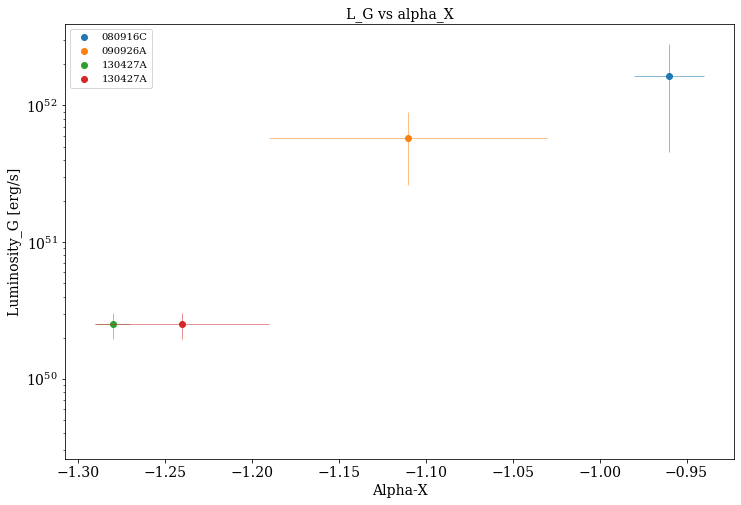

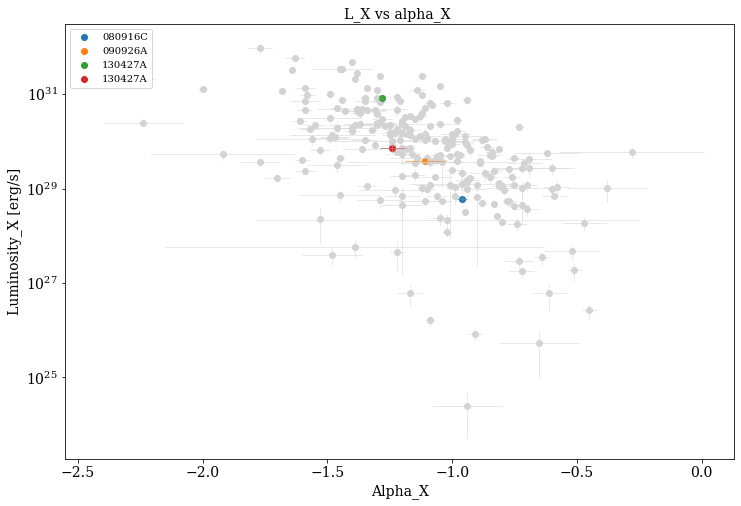

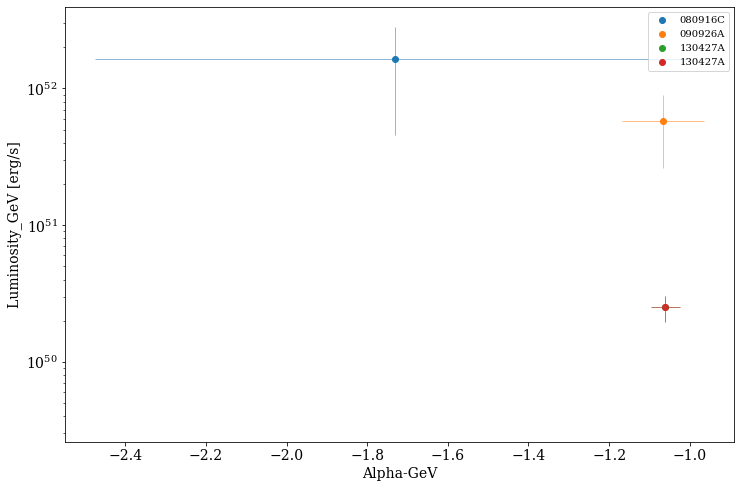


L_x with alpha_x (sample of 238) rank = SpearmanrResult(correlation=-0.5947789947338248, pvalue=4.564742071084471e-24)

L_x with alpha_x (sample of 4) rank = SpearmanrResult(correlation=-1.0, pvalue=0.0)

L_g with alpha_g rank = SpearmanrResult(correlation=-1.0, pvalue=0.0)

L_g with alpha_x rank = SpearmanrResult(correlation=0.9486832980505139, pvalue=0.051316701949486114)



In [30]:
'''Plotting Lum at Ts vs Alpha from Racusin et al'''

#x_alpha = [-0.96, -1.59, -1.11, -1.21, -1.28]
x_alpha = []
luminosity_x = []
#lum_x = [6.02e28,2.39e29,3.89e29,7.10e30,8.16e30]

g_alpha = []

ras_error_per, gev_error_per = [], []



data = []
n=0

x=0       


'''Matching the data bases by splitting the names into individual letters,
combing the letters into an erray for each grbs, removing letters and matching
Positive mactehs puts needed information in an array and then plotting L_Gev vs Alpha_X and various combinations'''
for i in grb_name:
    for p in ras_data:

        
        k1 = []
        k2 = []
        
        #n = len(i)-1
        n = len(i)-1
        if i[0] == '9':
            k1.append('0')
        for j in i:
            k1.append(j)
            
        m = []
        
        if len(p[0]) == 7:
            #q = len(p[0])-1
            q = len(p[0])-1
        else:
            q = len(p[0])
        
        for r in p[0]:
            #print(r)
            k2.append(r)

        #print(k1[:n])
        #print(k2[:q])
        #print()
        #print()
        
        if k1[:n] == k2[:q]: 
            #print(f'match for {i}')
            data.append([i, peak_params[x][1], peak_params[x][2] , 
                                 peak_params[x][3], peak_params[x][4],p[3],p[4], p[5], p[6]])
            
            ras_error_per.append([p[0], p[6]/p[5] * 100])
            gev_error_per.append([peak_params[x][0], abs(peak_params[x][4][0]/peak_params[x][3]) * 100])
            
    x=x+1
        

#peak_params=[name, alpha_g, [+error, -error], lum_ts, [+error, -error], all_lum_values, all_T_values]

    
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,16), sharex=False)


    
plt.figure(figsize = (12,8 ))
luminosity_g, g_alpha = [], []

a_x = [] #all x-ray alphas
L_x = [] #all x-ray luminosities
matches = []

x_err, g_err = [], []



#data=[name, alpha_g, alpha_g[+error, -error], lum_g, lum_g[+error, -error], alpha_x, alpha_x_err  lum_x, lum_x_err]


# for l in data[:4]:
for l in data:
    plt.scatter(-l[5], l[3], label = l[0])
    
    plt.errorbar(-l[5], l[3], yerr=l[4][0], xerr=l[6], linestyle='',elinewidth=0.5)
    g_alpha.append(l[1])
    luminosity_g.append(l[3])
    luminosity_x.append(l[7])
    x_alpha.append(-l[5])
    matches.append(l[0])
    x_err.append(l[8])
    g_err.append(l[4][0])

    

plt.title('L_G vs alpha_X', fontsize = 14)
plt.xlabel('Alpha-X',fontsize = 14) 
plt.ylabel('Luminosity_G [erg/s]',fontsize = 14)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend()
plt.show()




plt.figure(figsize = (12,8 ))


for i in ras_data:
    if -i[3]>-3:        #excluding possibly anomalous point from ras data
        if i[2] >=2:          #selecting long grbs only
            plt.scatter(-i[3],i[5], color='lightgray')
            a_x.append(-i[3])
            L_x.append(i[5])
            #if i[4]>2:
            #    print(i[0])
            plt.errorbar(-i[3], i[5], xerr=i[4], yerr=i[6], linestyle='',elinewidth=0.5, color='lightgray')
            
                
            
        else:
            pass
    
    
    
# for l in data[:4]:
for l in data:
    plt.scatter(-l[5], l[7], label = l[0])
    plt.errorbar(-l[5], l[7], xerr=l[6] , yerr=l[8], linestyle='',elinewidth=0.5)

plt.title('L_X vs alpha_X ' ,fontsize = 14)
plt.ylabel('Luminosity_X [erg/s]',fontsize = 14) 
plt.xlabel('Alpha_X',fontsize = 14) 
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc=2)
plt.show()






plt.figure(figsize = (12,8 ))

# for h in data[:4]:
for h in data:
    plt.scatter(h[1], h[3], label = h[0])
    plt.errorbar(h[1], h[3], xerr=h[2][0] , yerr=h[4][0], linestyle='',elinewidth=0.5)
    
 


plt.xlabel('Alpha-GeV',fontsize = 14) 
plt.ylabel('Luminosity_GeV [erg/s]',fontsize = 14) 
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=14)


plt.legend()
plt.show()

x_rank = 0
#x_rank = stats.spearmanr(x_alpha, np.log10(lum_x))
x_rank = stats.spearmanr(a_x, (L_x))

g_rank = stats.spearmanr(g_alpha, np.log10(luminosity_g))
gx_rank = stats.spearmanr(x_alpha, np.log10(luminosity_g))

xx_rank = stats.spearmanr(x_alpha, np.log10(luminosity_x))

print()



print(f'L_x with alpha_x (sample of 238) rank = {x_rank}')
print()
print(f'L_x with alpha_x (sample of {len(x_alpha)}) rank = {xx_rank}')
print()
print(f'L_g with alpha_g rank = {g_rank}')
print()
print(f'L_g with alpha_x rank = {gx_rank}')
print()




In [32]:
print(ras_error_per)
print(gev_error_per)

[['080916A', 16.611295681063122], ['090926B', 16.709511568123396], ['130427A', 15.073529411764705], ['130427B', 19.64769647696477]]
[['080916C', 72.13902398065552], ['090926A', 54.40330936591028], ['130427A', 21.741004526282072], ['130427A', 21.741004526282072]]


In [33]:
print(grb_name)

['080916C', '90323.0', '90328.0', '090902B', '090926A', '91003.0', '100414A', '120624B', '130427A', '130518A', '131108A', '131231A', '141028A', '150314A', '160509A', '170214A', '170405A', '180720B']


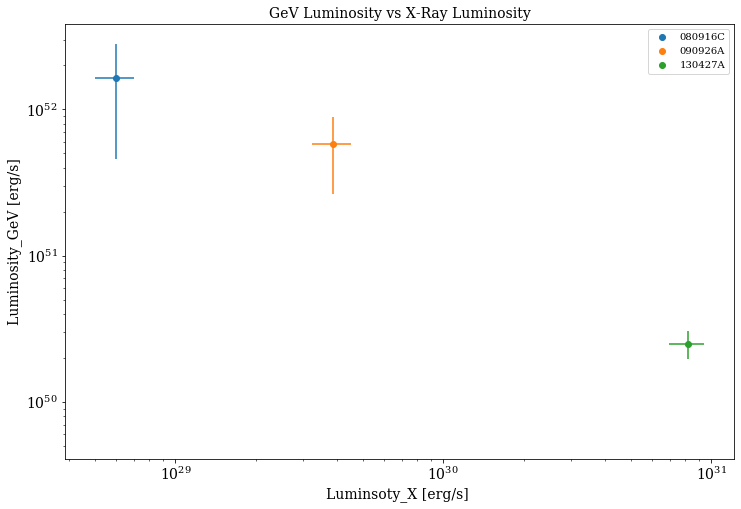

In [66]:
'''Plotting L_GeV vs L_X'''

plt.figure(figsize = (12,8 ))

plt.title('GeV Luminosity vs X-Ray Luminosity', fontsize = 14)
for i in range(len(matches)):

    plt.scatter(luminosity_x[i], luminosity_g[i], label=matches[i] )
    plt.errorbar(luminosity_x[i], luminosity_g[i], xerr=x_err[i], yerr=g_err[i])
    
plt.xlabel('Luminsoty_X [erg/s] ',fontsize = 14) 
plt.ylabel('Luminosity_GeV [erg/s]',fontsize = 14) 
plt.yscale('log')
plt.xscale('log')
plt.tick_params(axis='both', which='major', labelsize=14)


plt.legend()
plt.show()


In [62]:
'''Plotting Eiso Distributions for X-Ray and LAT data'''
data_x_match, all_data_x, data_g_match, fit_match, data_fit_match = [], [], [], [], []

for g in table_x:
    all_data_x.append(g['EISO'])
    
    
    for i in range(len(table)):
        if table['GBMT90'][i]>2:

            k1 = []
            k2 = []


            for p in g['GRB']:
                k2.append(p)

            if len(g) == 7:
                q = len(p)-1
            else:
                q = len(p)


            n = len(table['GCNNAME'][i])-1

            if table['GCNNAME'][i][0] == '9':
                k1.append('0')

            for j in table['GCNNAME'][i]:
                k1.append(j)

            #print(k1[:n])

            if len(k2[3:]) <=6:
                k2 = k2[3:]
            if len(k2[3:]) == 7: 

                k2 = k2[3:]
                k2 = k2[:6]
            #print(k2)

            if k1[:n] == k2 :
                data_g_match.append([table['LIKE_BEST_EISO52_RF'][i], table['LIKE_BEST_EISO52_RF_ERR'][i],
                                     table['LIKE_LAT_EISO52_RF'][i], table['LIKE_LAT_EISO52_RF_ERR'][i],
                                     table['LIKE_GBM_EISO52_RF'][i], table['LIKE_GBM_EISO52_RF_ERR'][i],
                                     table['LIKE_EXT_EISO52_RF'][i], table['LIKE_EXT_EISO52_RF_ERR'][i],
                                     table['GCNNAME'][i]])

                data_x_match.append(g['EISO'])
                
            








In [63]:
data_fit_match=[]
for g in table_x:
    for i in grb_name:

        k1 = []
        k2 = []
        for p in g['GRB']:
            k2.append(p)

        if len(g) == 7:
            q = len(p)-1
        else:
            q = len(p)


        n = len(i)

        if i[0] == '9':
            k1.append('0')

        for j in i:
            k1.append(j)

        #print(k1[:n])

        if len(k2[3:]) <=6:
            k2 = k2[3:]
        if len(k2[3:]) == 7: 

            k2 = k2[3:]
            k2 = k2[:7]
        #print(k2)

        if k1[:n] == k2:
            #print(g['GRB'])
            #print(f'k1 is {k1}')
            for x in range(len(table['GCNNAME'])):
                if i == table['GCNNAME'][x]:
                    #print(f'match for {i}')
                    data_fit_match.append([table['LIKE_BEST_EISO52_RF'][x], table['LIKE_BEST_EISO52_RF_ERR'][x],
                                 table['LIKE_LAT_EISO52_RF'][x], table['LIKE_LAT_EISO52_RF_ERR'][x],
                                 table['LIKE_GBM_EISO52_RF'][x], table['LIKE_GBM_EISO52_RF_ERR'][x],
                                 table['LIKE_EXT_EISO52_RF'][x], table['LIKE_EXT_EISO52_RF_ERR'][x]])

#grbs = ['080916C','090926A', '110731A', '130427A']

In [64]:
print(len(data_fit_match))

8


In [ ]:
'''Colour Split'''

#def luminosity(table):


v=0
n=0
redshift = []
m=0

Ts = 20
lower_bound = 5
upper_bound = 40

all_a_whole, all_lum_whole = [], []
j = 0
diff_mean = []
diff_std = []

plt.figure(figsize = (12,8 ))

lum_ts = []
lum_ts_err = []
#grb_name = []

for i in table:
    if i['LUMINOSITY_DISTANCE'] >0:
        z = i['REDSHIFT']
        name = i['GCNNAME']
        dl = i['LUMINOSITY_DISTANCE']
        diff = []
        
        n=n+1
        #print(n)


        for k in i['LC_ENE_FLUX_ERR']:
            mask = np.where(i['LC_ENE_FLUX_ERR']!=0) #finding indexs of values where flux error is 0 and masking
            t_end = i['LC_END'][mask] 
            ene_flux = i['LC_ENE_FLUX'][mask] 
            ene_flux_err = i['LC_ENE_FLUX_ERR'][mask] 
            fluence = i['LC_FLUENCE'][mask] 
            flux = i['LC_FLUX'][mask] 
            flux_err = i['LC_FLUX_ERR'][mask] 
            indec = i['LC_INDEX'][mask]   # this is photon index, not spectral index;     
            #photon index = beta+1 e.g photon index 2 = beta +1, where beta = 1
            index_err = i['LC_INDEX_ERR'][mask] 
            median = i['LC_MEDIAN'][mask] 
            t_start = i['LC_START'][mask] 
            ts = i['LC_TS'][mask] 

        
        g = 1.6e-6               #extra factor missing in the LC_ENE_FLUX values in the .fits
        B = -1*indec               #calculating spectral index from measured photon indicies
        B_err = index_err
        
        #calculating weighted mean of spectral index and error
        B_sum = []
        B_err_sum = []

        if len(B)==1:
            mean_B = B
            #mean_B_err = abs(B_err)
        else:
            mean_B = np.average(B, weights=abs(1/B_err))
            #mean_B_err = np.mean(abs(B_err))
           
                
            
        #calculating k correction
        k_correction = (1+z)**((mean_B-1)-1)

        #calculating corrected luminosities and their errors in normal and log space
        lum = g*ene_flux*4*(np.pi)*(dl**2)*(k_correction)
        lum_err = g*ene_flux_err*4*(np.pi)*(dl**2)*(k_correction)
        
        #calculating the asymmetric errors in log space
        lum_err_plus = np.log10(lum + lum_err) - np.log10(lum)        
        lum_err_minus= np.log10(lum) - np.log10(lum - lum_err)
        

        T_err = ((t_end-t_start)/2)
        T = (t_start+T_err)/(1+z)
        T_err =  T_err/(1+z)
        
        T_err_plus = np.log10(T + T_err) - np.log10(T)
        T_err_minus = np.log10(T) - np.log10(T - T_err)

    
        #calculating the index of T either side of Ts
        diff = abs(T-Ts)
        idx1 = np.argmin(diff)

        if idx1+1 == len(T):
            if T[idx1]<Ts:
                idx2 = idx1 
                idx1 = idx1 - 1
            if T[idx1]>Ts:
                idx2 = idx1 - 1

        else:
            if T[idx1]<Ts:
                idx2 = idx1+1
            if T[idx1]>Ts:
                idx2 = idx1 -1


        if len(ene_flux)<=2:
            pass
        else:
            weight_lum = 1/lum_err

            if T[idx1]>Ts:                 #makign sure the weights are the correct way round
                T_new = T[idx2:]
                lum_new = lum[idx2:]
                lum_err_p_new = lum_err_plus[idx2:]
                lum_err_m_new = lum_err_minus[idx2:]
                weight_ts = weight_lum[idx2:]
                weight_lum_new = 1/lum_err_p_new
            else:
                T_new = T[idx1:]
                lum_new = lum[idx1:]
                lum_err_p_new = lum_err_plus[idx1:]
                lum_err_m_new = lum_err_minus[idx1:]
                weight_ts = weight_lum[idx1:]
                weight_lum_new = 1/lum_err_p_new


            #fitting from ±U
#             diff_minus1 = abs(T-lower_bound)                   #lower T threshold
#             diff_plus1 = abs(upper_bound-T)                #upper T threshold
#             idx_minus1 = np.argmin(diff_minus1)+1          #finding lower threshold index
#             idx_plus1 = np.argmin(diff_plus1)       #finding upper threshold index
#             T_min_plus1 = T[idx_minus1:idx_plus1]         #making new T array
#             lum_min_plus1 = lum[idx_minus1:idx_plus1]     #making new L array
#             weight_mp1 = weight_lum[idx_minus1:idx_plus1]    #making new weights array
            

            #fitting from ±% Ts
            p = 0.3                 #percentage value
            d_minus2 = 10**((1-p)*np.log10(Ts)) 
            d_plus2 =  10**((1+p)*np.log10(Ts))
            diff_minus2 = abs(T-d_minus2)
            diff_plus2 = abs(T-d_plus2)
            idx_minus2 = np.argmin(diff_minus2)
            idx_plus2 = np.argmin(diff_plus2)+1
            T_min_plus2 = T[idx_minus2:idx_plus2]
            lum_min_plus2 = lum[idx_minus2:idx_plus2]
            weight_mp2 = weight_lum[idx_minus2:idx_plus2]
            
            #fitting from peak luminosity onwards
            peak_idx = np.argmax(lum)
            peak_lum = lum[peak_idx:]
            peak_T = T[peak_idx:]
            peak_weight = weight_lum[peak_idx:]

            
            #not going ahead with fits where the indexes are too small to fit
            if len(T_min_plus1)<=1 or len(T_min_plus2)<=1:
                pass
            else:

                v=v+1
                #print(name)
                print(v)
                
                
                #calculating luminosity at Ts
                if idx1 > idx2:
                    lum1 = lum[idx1]       #finding luminosity data points either side of Ts
                    lum2 = lum[idx2]
                    T1 = T[idx1]
                    T2 = T[idx2]
                    w1 = 1/lum_err[idx1]
                    w2 = 1/lum_err[idx2]
                else:
                    lum1 = lum[idx2]
                    lum2 = lum[idx1]
                    T1 = T[idx2]
                    T2 = T[idx1]
                    w1 = 1/lum_err[idx2]
                    w2 = 1/lum_err[idx1]


                log_T = np.log10(T)
                log_lum = np.log10(lum)
                log_Ts = np.log10(Ts)
                

                #calculating best fit parameters and covariances for the data lmfit
                #making powerlaw model for linear fits
                model1 = PowerLawModel(prefix='pow_')

                # make parameters with starting values:
                par3 = model1.make_params(pow_amplitude=1e6, pow_exponent=-1.0)


                np.nan_to_num(weight_lum_new,copy=False)
                
                #running whole fits & params
#                 resultn1 = model1.fit(lum/1e50, par3, x=T, weights=weight_lum) 
#                 norma1, normN1 = resultn1.best_values['pow_exponent'],resultn1.best_values['pow_amplitude'] #norm whole params
#                 normci1 = lmfit.conf_interval(resultn1, resultn1, sigmas=[0.68])
                
                
                #running ts onwards fits & params
#                 resultn2 = model1.fit(lum_new/1e50, par3, x=T_new, weights=weight_ts) #linear ts with weight
#                 norma2, normN2 = resultn2.best_values['pow_exponent'],resultn2.best_values['pow_amplitude'] #norm two-point params
#                 normci2 = lmfit.conf_interval(resultn2, resultn2, sigmas=[0.68])


                
                #running ± U Ts fits & params
#                 resultn3 = model1.fit(lum_min_plus1/1e50, par3, x=T_min_plus1, weights=weight_mp1) #±U Ts luminosity 
#                 norma3, normN3 = resultn3.best_values['pow_exponent'],resultn3.best_values['pow_amplitude'] #±U Ts luminosity params
#                 normci3 = lmfit.conf_interval(resultn3, resultn3, sigmas=[0.68])
                
                
                #running ± 30 percent fits & parameters
                resultn4 = model1.fit(lum_min_plus2/1e50, par3, x=T_min_plus2, weights=weight_mp2) #±30 percent lum 
                norma4, normN4 = resultn4.best_values['pow_exponent'],resultn4.best_values['pow_amplitude'] #±30 percent lum params
                normci4 = lmfit.conf_interval(resultn4, resultn4, sigmas=[0.68])
                                

                #running two-point fits & params
                #resultn5 = model1.fit([lum1/1e50,lum2/1e50], par3, x=[T1,T2], weights=[w1,w1]) #norm two-point
                #norma5, normN5 = resultn5.best_values['pow_exponent'],resultn5.best_values['pow_amplitude'] #norm two-point params
                #normci5 = lmfit.conf_interval(resultn5, resultn5, sigmas=[0.68])
                
                
                #running peak fits & params
                resultn6 = model1.fit(peak_lum/1e50, par3, x=peak_T, weights=peak_weight)
                norma6, normN6 = resultn6.best_values['pow_exponent'],resultn6.best_values['pow_amplitude']
                normci6 = lmfit.conf_interval(resultn6, resultn6, sigmas=[0.68])


                #lum_fitn1 = power_law1(T,normN1, norma1) *1e50
                #lum_fitn2 = power_law1(T,normN2, norma2) *1e50
                #lum_fitn5 = power_law1(T,normN5, norma5) *1e50
                #lum_fitn3 = power_law1(T,normN3, norma3) *1e50
                lum_fitn4 = power_law1(T,normN4, norma4) *1e50
                lum_fitn6 = power_law1(T,normN6, norma6) *1e50
                
                #all_a_whole.append(norma1)
                #all_lum_whole.append(power_law1(Ts, normN1, norma1)*1e50)
                
                if norma6 < -1.1:         #3 for ±U, 4 for ±30%, 5 for tp, 6 for peak

                    plt.plot(T, lum_fitn6, linestyle='--', linewidth=2,color='red')
                else:
                    plt.plot(T, lum_fitn6, linestyle='--', linewidth=2,color='blue')
                    
                if norma6 > 0:
                    plt.plot(T,lum_fitn6, linestyle='--', linewidth=2, color='g', 
                             label=f'{name} - alpha={np.round(norma6,3)}' )

                plt.yscale('log')
                plt.xscale('log')
                plt.scatter(T, lum, color='lightgray')
                #plt.ylim(1e39,1e60)
                plt.xlabel(xlabel='T-T0/(1+z) [s]',fontsize = 14) 
                plt.ylabel(ylabel='L [erg/s]',fontsize = 14) 
                #plt.title(f'All GRBs from {lower_bound}-{upper_bound}s Fit Luminosity Fit',fontsize = 14) 
                #plt.title(f'All GRBs from Ts={Ts}s ±30% Luminosity Fit',fontsize = 14)
                plt.title(f'All GRBs from Ts={Ts}s Peak Onward Luminosity Fit',fontsize = 14)
                #plt.title(f'All GRBs from Ts={Ts}s Two-Point Luminosity Fit',fontsize = 14)
                plt.tick_params(axis='both', which='major', labelsize=14)

                #plt.legend()
                plt.axvline(Ts, color = 'red', linewidth=0.5)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


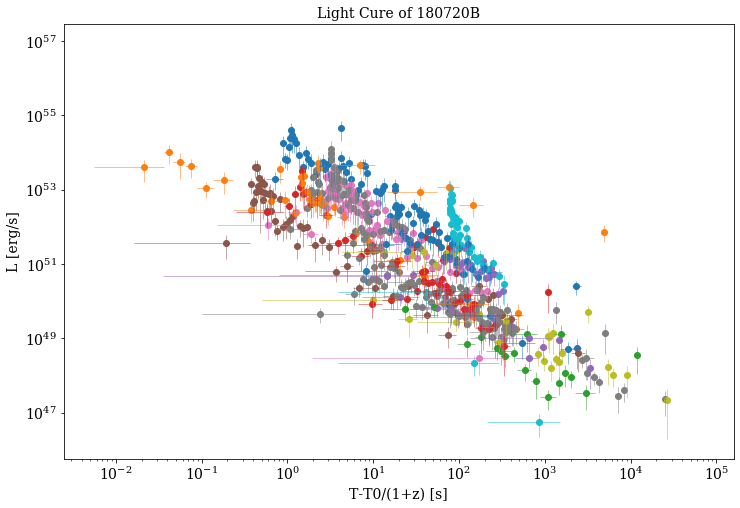

In [8]:


v=0
n=0
redshift = []
m=0

Ts = 20
lower_bound = 5
upper_bound = 40

all_a_whole, all_lum_whole = [], []
j = 0
diff_mean = []
diff_std = []

plt.figure(figsize = (12,8 ))

lum_ts = []
lum_ts_err = []
#grb_name = []

for i in table:
    if i['LUMINOSITY_DISTANCE'] >0:
        z = i['REDSHIFT']
        name = i['GCNNAME']
        dl = i['LUMINOSITY_DISTANCE']
        diff = []
        
        n=n+1
        print(n)


        for k in i['LC_ENE_FLUX_ERR']:
            mask = np.where(i['LC_ENE_FLUX_ERR']!=0) #finding indexs of values where flux error is 0 and masking
            t_end = i['LC_END'][mask] 
            ene_flux = i['LC_ENE_FLUX'][mask] 
            ene_flux_err = i['LC_ENE_FLUX_ERR'][mask] 
            fluence = i['LC_FLUENCE'][mask] 
            flux = i['LC_FLUX'][mask] 
            flux_err = i['LC_FLUX_ERR'][mask] 
            indec = i['LC_INDEX'][mask]   # this is photon index, not spectral index;     
            #photon index = beta+1 e.g photon index 2 = beta +1, where beta = 1
            index_err = i['LC_INDEX_ERR'][mask] 
            median = i['LC_MEDIAN'][mask] 
            t_start = i['LC_START'][mask] 
            ts = i['LC_TS'][mask] 

        
        g = 1.6e-6               #extra factor missing in the LC_ENE_FLUX values in the .fits
        B = -1*indec               #calculating spectral index from measured photon indicies
        B_err = index_err
        
        #calculating weighted mean of spectral index and error
        B_sum = []
        B_err_sum = []

        if len(B)==1:
            mean_B = B
            #mean_B_err = abs(B_err)
        else:
            mean_B = np.average(B, weights=abs(1/B_err))
            #mean_B_err = np.mean(abs(B_err))
           
                
            
        #calculating k correction
        k_correction = (1+z)**((mean_B-1)-1)

        #calculating corrected luminosities and their errors in normal and log space
        lum = g*ene_flux*4*(np.pi)*(dl**2)*(k_correction)
        lum_err = g*ene_flux_err*4*(np.pi)*(dl**2)*(k_correction)
        
        #calculating the asymmetric errors in log space
        lum_err_plus = np.log10(lum + lum_err) - np.log10(lum)        
        lum_err_minus= np.log10(lum) - np.log10(lum - lum_err)
        

        T_err = ((t_end-t_start)/2)
        T = (t_start+T_err)/(1+z)
        T_err =  T_err/(1+z)
        
        
        plt.yscale('log')
        plt.xscale('log')
        plt.scatter(T, lum)
        #plt.ylim(1e39,1e60)
        plt.xlabel(xlabel='T-T0/(1+z) [s]',fontsize = 14) 
        plt.ylabel(ylabel='L [erg/s]',fontsize = 14) 
        #plt.title(f'All GRBs from {lower_bound}-{upper_bound}s Fit Luminosity Fit',fontsize = 14) 
        #plt.title(f'All GRBs from Ts={Ts}s ±30% Luminosity Fit',fontsize = 14)
        plt.title(f'Light Cure of {name}',fontsize = 14)
        #plt.title(f'All GRBs from Ts={Ts}s Two-Point Luminosity Fit',fontsize = 14)
        plt.tick_params(axis='both', which='major', labelsize=14)
        plt.errorbar(T, lum, yerr=lum_err, xerr=T_err, linestyle='',elinewidth=0.5)
        

        
        